In [1]:
import pandas as pd
import numpy as np
import os, glob
from pprint import pprint
import pickle as pkl
import matplotlib.pyplot as plt

# data_dir = "data/convote_v1.1/data_stage_one/training_set"
data_dir = "C:/Users/vicvi/big-datasets/hein-daily"

/tmp/ipykernel_123677/2153180222.py:52: RuntimeWarning: divide by zero encountered in log
  ts = np.log(ts)
/tmp/ipykernel_123677/2153180222.py:53: RuntimeWarning: divide by zero encountered in log
  rmss = np.log(rmss)
/tmp/ipykernel_123677/2153180222.py:54: RuntimeWarning: divide by zero encountered in log
  mavs = np.log(mavs)
/tmp/ipykernel_123677/2153180222.py:55: RuntimeWarning: divide by zero encountered in log
  mtvs = np.log(mtvs)
/tmp/ipykernel_123677/2153180222.py:56: RuntimeWarning: divide by zero encountered in log
  sqrts = np.log(sqrts)
/tmp/ipykernel_123677/2153180222.py:57: RuntimeWarning: divide by zero encountered in log
  mpds = np.log(mpds)
/tmp/ipykernel_123677/2153180222.py:63: RuntimeWarning: invalid value encountered in subtract
  plt.plot(ts, np.array(mpds) - np.array(mavs))
/tmp/ipykernel_123677/2153180222.py:64: RuntimeWarning: invalid value encountered in subtract
  plt.plot(ts, np.array(mpds) - np.array(mtvs))


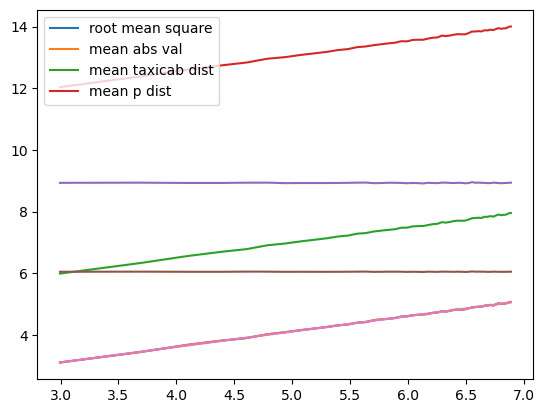

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# pick a random unit vector and take a step in that direction. 
# in one dimension the distance from the origin should be proportional to sqrt(t) -- actually this is the rms distance
def simulate_random_walk(s, n, t, r, p):
    
    squared_dists = []
    abs_dists = []
    tax_dists = []
    p_dists = []
    
    for i in range(r):
        loc = np.zeros((n,))
        for j in range(t):
            vec = np.random.normal(0, 1, (n,))
            uvec = vec / np.sqrt(np.sum(vec**2)) * s
            loc += uvec
            
        squared_dist = np.sum(loc**2)
        tax_dist = np.sum(np.abs(loc))
        p_dist = np.sum(np.abs(loc)**p)
        
        tax_dists.append(tax_dist)
        squared_dists.append(squared_dist)
        abs_dists.append(np.sqrt(squared_dist))
        p_dists.append(p_dist**(1/p))
    
    rms = np.sqrt(sum(squared_dists) / len(squared_dists))
    mav = sum(abs_dists) / len(abs_dists)
    mtv = sum(tax_dists) / len(tax_dists)
    mpd = sum(p_dists) / len(p_dists)
    
    return rms, mav, mtv, mpd

def simulate_random_walks(s, n, ts, r, loglog=True):
    rmss = []
    mavs = []
    mtvs = []
    mpds = []
    for t in ts:
        rms, mav, mtv, mpd = simulate_random_walk(s, n, t, r, 1/2)
        rmss.append(rms)
        mavs.append(mav)
        mtvs.append(mtv)
        mpds.append(mpd)
        
    
    sqrts = [s * np.sqrt(t) for t in ts]
    
    if loglog:
        ts = np.log(ts)
        rmss = np.log(rmss)
        mavs = np.log(mavs)
        mtvs = np.log(mtvs)
        sqrts = np.log(sqrts)
        mpds = np.log(mpds)
    
    plt.plot(ts, rmss, label="root mean square")
    plt.plot(ts, mavs, label="mean abs val")
    plt.plot(ts, mtvs, label="mean taxicab dist")
    plt.plot(ts, mpds, label="mean p dist")
    plt.plot(ts, np.array(mpds) - np.array(mavs))
    plt.plot(ts, np.array(mpds) - np.array(mtvs))
    plt.plot(ts, sqrts)
    plt.legend()

ts = [i * 20 for i in range(50)]

# conclusion: no matter the dimension, a random walk where you take a unit step in a particular direction 
simulate_random_walks(5, 500, ts, 10)

In [30]:
def simulate_return_biased_random_walk_1d(rounds, steps, p_whence):
    dists = []

    last_step = np.random.choice([-1, 1], size=(rounds,))
    loc = np.zeros((rounds,))
        
    for j in range(steps):
        multiplier = np.random.choice([-1, 1], size=(rounds,), p=[p_whence, 1 - p_whence])
        next_step = last_step * multiplier
        loc += next_step
        last_step = next_step
        
    # print(dists)
    mean_abs_dist = np.sum(np.abs(loc)) / loc.shape[0]
    mean_sqr_dist = np.sum(loc**2) / loc.shape[0]

    return mean_abs_dist, mean_sqr_dist

def simulate_random_walks_diff_lengths(rounds, t_samples, p_whence):
    mads = []
    msds = []
    
    for steps in t_samples:
        print(steps, end="\r")
        mad, msd = simulate_return_biased_random_walk_1d(rounds, steps, p_whence)
        mads.append(mad)
        msds.append(msd)
    
    return mads, msds

t_samples = list(range(0, 10000, 100))
mads, msds = simulate_random_walks_diff_lengths(1000, t_samples, 0.85)
print(mads)

[0.0, 3.332, 4.758, 5.676, 6.818, 7.482, 8.614, 9.28, 9.496, 10.1, 10.67, 11.024, 12.118, 12.594, 12.206, 13.25, 13.112, 13.582, 14.098, 14.42, 14.886, 15.34, 15.902, 16.2, 16.242, 16.81, 17.448, 17.532, 17.326, 17.754, 19.1, 18.846, 18.87, 19.172, 18.754, 19.372, 20.664, 20.392, 20.43, 20.69, 20.574, 21.838, 22.886, 22.158, 22.108, 22.562, 22.252, 22.798, 22.9, 23.544, 23.714, 22.626, 24.31, 24.574, 24.086, 24.832, 23.998, 25.074, 26.256, 26.29, 25.774, 25.296, 27.744, 27.432, 26.934, 28.036, 27.574, 27.558, 27.598, 27.568, 27.238, 28.068, 28.448, 27.596, 28.052, 27.79, 29.894, 30.36, 30.344, 28.498, 29.67, 30.122, 28.816, 30.812, 31.316, 29.93, 29.978, 31.662, 31.846, 30.52, 32.818, 32.208, 32.324, 32.768, 31.866, 33.02, 32.972, 33.032, 33.164, 33.256]


/tmp/ipykernel_3304356/3089872192.py:8: RuntimeWarning: divide by zero encountered in log
  ax1.plot(np.log(t_samples), np.log(mads), label="mad distance")
/tmp/ipykernel_3304356/3089872192.py:9: RuntimeWarning: divide by zero encountered in log
  ax1.plot(np.log(t_samples), np.log(np.sqrt(msds)), label="rms distance")
/tmp/ipykernel_3304356/3089872192.py:10: RuntimeWarning: divide by zero encountered in log
  ax1.plot(np.log(t_samples), np.log(np.sqrt(t_samples)), label="sqrt")
/tmp/ipykernel_3304356/3089872192.py:11: RuntimeWarning: divide by zero encountered in log
  ax1.plot(np.log(t_samples), np.log(np.cbrt(t_samples)), label="cbrt")
/tmp/ipykernel_3304356/3089872192.py:12: RuntimeWarning: divide by zero encountered in log
  ax1.plot(np.log(t_samples), np.log(mads) - np.log(np.sqrt(t_samples)), label="diff")
/tmp/ipykernel_3304356/3089872192.py:12: RuntimeWarning: invalid value encountered in subtract
  ax1.plot(np.log(t_samples), np.log(mads) - np.log(np.sqrt(t_samples)), label="

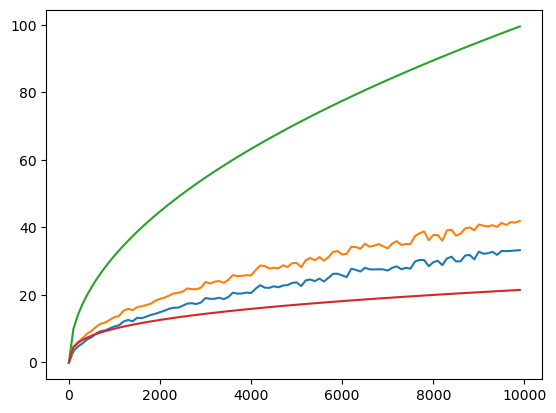

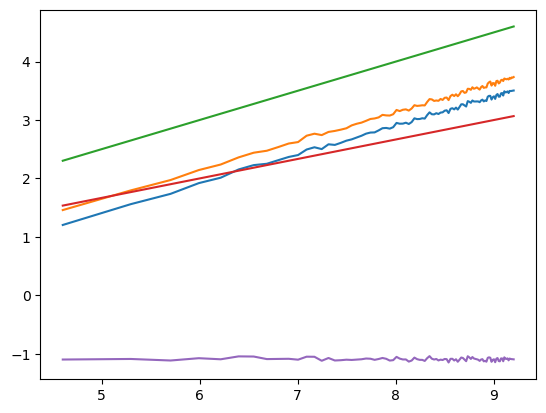

In [31]:
fig0, ax0 = plt.subplots()
ax0.plot(t_samples, mads, label="mad distance")
ax0.plot(t_samples, np.sqrt(msds), label="rms distance")
ax0.plot(t_samples, np.sqrt(t_samples), label="sqrt")
ax0.plot(t_samples, np.cbrt(t_samples), label="cbrt")

fig1, ax1 = plt.subplots()
ax1.plot(np.log(t_samples), np.log(mads), label="mad distance")
ax1.plot(np.log(t_samples), np.log(np.sqrt(msds)), label="rms distance")
ax1.plot(np.log(t_samples), np.log(np.sqrt(t_samples)), label="sqrt")
ax1.plot(np.log(t_samples), np.log(np.cbrt(t_samples)), label="cbrt")
ax1.plot(np.log(t_samples), np.log(mads) - np.log(np.sqrt(t_samples)), label="diff")

In [29]:
def simulate_probability_walk(dims, steps, step_scale, step_func, freeze_dims=0):
    alpha = np.ones((dims,))
    initial_distrib = np.random.dirichlet(alpha) # samples a distribution uniformly with a dirichlet distrib with param alpha
    distrib = initial_distrib
    
    squared_dist = []
    taxi_dist = []
    
    for i in range(steps):
        step = np.random.normal(0, 1, (dims,))
        distrib = step_func(distrib, step_scale, freeze_dims)
        
        taxi_dist.append(np.abs(distrib - initial_distrib).sum())
        squared_dist.append(np.square(distrib - initial_distrib).sum())
    
    return squared_dist, taxi_dist

def simulate_many_probability_walks(dims, steps, step_scale, rounds, step_func, freeze_dims=0):
    squared_dist_arrs = []
    taxi_dist_arrs = []
    
    for i in range(rounds):
        print(i)
        squared_dist, taxi_dist = simulate_probability_walk(dims, steps, step_scale, step_func, freeze_dims)
        squared_dist_arrs.append(squared_dist)
        taxi_dist_arrs.append(taxi_dist)
    
    rms_dists = np.sqrt(np.array(squared_dist_arrs).sum(axis=0) / rounds)
    mean_taxi_dists = np.sqrt(np.array(taxi_dist_arrs)).sum(axis=0) / rounds
    
    return rms_dists, mean_taxi_dists

In [43]:
steps = 10000
rms_dists, mean_taxi_dists = simulate_many_probability_walks(1000, steps, 0.1, 100, calc_new_distrib_dirichlet, freeze_dims=500)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/tmp/ipykernel_3648397/1284130955.py:9: RuntimeWarning: divide by zero encountered in log
  ax1.plot(np.log(range(steps)), np.log(rms_dists))
/tmp/ipykernel_3648397/1284130955.py:10: RuntimeWarning: divide by zero encountered in log
  ax1.plot(np.log(range(steps)), np.log(mean_taxi_dists))
/tmp/ipykernel_3648397/1284130955.py:11: RuntimeWarning: divide by zero encountered in log
  ax1.plot(np.log(range(steps)), np.log(np.sqrt(range(steps))))
/tmp/ipykernel_3648397/1284130955.py:13: RuntimeWarning: divide by zero encountered in log
  ax1.plot(np.log(range(steps)), np.log(rms_dists) - np.log(np.cbrt(range(steps))))


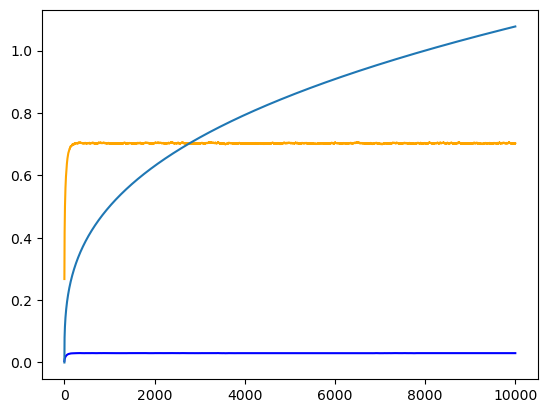

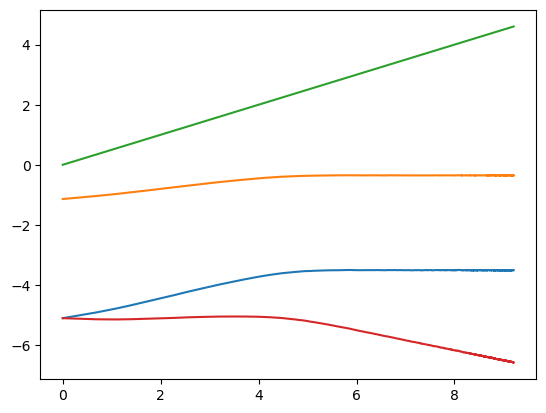

In [44]:
fig0, ax0 = plt.subplots()

ax0.plot(range(steps), rms_dists, color="blue")
ax0.plot(range(steps), mean_taxi_dists, color="orange")
# ax0.plot(range(steps), 0.05*np.sqrt(range(steps)))
ax0.plot(range(steps), 0.05*np.cbrt(range(steps)))

fig1, ax1 = plt.subplots()
ax1.plot(np.log(range(steps)), np.log(rms_dists))
ax1.plot(np.log(range(steps)), np.log(mean_taxi_dists))
ax1.plot(np.log(range(steps)), np.log(np.sqrt(range(steps))))
# ax1.plot(np.log(range(steps)), np.log(np.cbrt(range(steps))))
ax1.plot(np.log(range(steps)), np.log(rms_dists) - np.log(np.cbrt(range(steps))))

In [55]:
calc_new_distrib_renorm(np.array([0.2, 0.3, 0.05, 0.1, 0.2, 0.1]), 0.1)

array([0.12637183, 0.32797025, 0.05160549, 0.2646095 , 0.01293403,
       0.2165089 ])

In [33]:
# not sure how to find "closest point"
def calc_new_distrib_proj(distrib, scale):
    noise = np.random.normal(0, 1, distrib.shape)
    diff = np.ones(distrib.shape) * noise.sum() # noise.sum is hte magnitude of projection onto [1, 1, ...].
    projection = noise - diff
    new_distrib = distrib + projection

def calc_new_distrib_renorm(distrib, scale, freeze_dims=0):
    noise = np.random.normal(0, 1, distrib.shape) * scale
    noise[0:freeze_dims] = 0
    unnorm = np.minimum(np.maximum(distrib + noise, 0), 1) # set limits at 0 and 1
    renorm = renormalize_with_freeze(unnorm, freeze_dims)
    
    return renorm

def calc_new_distrib_dirichlet(distrib, scale, freeze_dims=0):
    dims = distrib.shape[0]
    one_vec = np.ones((dims - freeze_dims,))
    noise = (np.random.dirichlet(one_vec) - one_vec / (dims - freeze_dims)) * scale # this is a uniformly sampled vector that sums to 0
    noise = np.concatenate((np.zeros((freeze_dims,)), noise))
    
    unnorm = np.minimum(np.maximum(distrib + noise, 0), 1) # set limits at 0 and 1
    renorm = renormalize_with_freeze(unnorm, freeze_dims)
    
    return renorm

def renormalize_with_freeze(unnorm, freeze_dims=0):
    leftover = 1 - unnorm[:freeze_dims].sum()
    unnorm[freeze_dims:] = unnorm[freeze_dims:] * (leftover / unnorm[freeze_dims:].sum())
    
    return unnorm

In [27]:
calc_new_distrib_dirichlet(np.array([0.5, 0.5, 0.0]), 0.1, 1)

[ 0.         -0.02811172  0.02811172]
1.0408340855860843e-17


array([0.5       , 0.47188828, 0.02811172])

In [13]:
arr[0:1] = 0
arr

array([0, 2, 3, 4, 5])

In [7]:
with open("objects/speeches_sample.pkl", "rb") as f:
    speeches = pkl.load(f)
    
with open("objects/speech_list_sample.pkl", "rb") as f:
    speech_list = pkl.load(f)

In [8]:
speeches

speech    speakerid  \
speech_id                                                                    
630264555   I withdraw the amendment. and will offer it at...   63083881.0   
770166139   Mr. Speaker. I desire to call the attention of...   77098800.0   
1040200826  Mr. President. first before we go to the closi...  104109311.0   
920033122   Mr. Speaker. last week we saw Washington invad...          NaN   
1050118784  Mr. Speaker. I thank the ranking member. and I...  105116800.0   
...                                                       ...          ...   
850135476   Mr. President. Texas and the Nation lost a fin...          NaN   
610065987   The Chair understands it is the custom of the ...          NaN   
920196364   Mr. President. our able colleague from Kentuck...          NaN   
440053349   pro tempere. In common fairness. as gentlemen ...          NaN   
620318328   Well. Mr. President. that brings out one point...   62078831.0   

           chamber      date                     speaker first_name  \
speech_id                                                             
630264555        S  19140620                 Mr. ASHURST    Unknown   
770166139        H  19420318       Mr. VINSON of Georgia    Unknown   
1040200826       S  19960423              Mrs. KASSEBAUM    Unknown   
920033122        E  19710430               Mr. LANDGREBE    Unknown   
1050118784       H  19980324  Mr. FRANK of Massachusetts    Unknown   
...            ...       ...                         ...        ...   
850135476        E  19570823              Mr. YARBOROUGH    Unknown   
610065987        S  19090706          The VICE-PRESIDENT    Unknown   
920196364        E  19720321                Mr. RANDOLPH    Unknown   
440053349        H  18760623                 The SPEAKER    Unknown   
620318328        S  19130221                   Mr. JONES    Unknown   

             last_name          state   gender  word_count  year  counter  \
speech_id                                                                   
630264555      ASHURST        Unknown        M          24  1914        1   
770166139       VINSON        Georgia        M          96  1942        1   
1040200826   KASSEBAUM        Unknown        F          30  1996        1   
920033122    LANDGREBE        Unknown        M         457  1971        1   
1050118784       FRANK  Massachusetts        M         129  1998        1   
...                ...            ...      ...         ...   ...      ...   
850135476   YARBOROUGH        Unknown        M         187  1957        1   
610065987      Unknown        Unknown  Special          44  1909        1   
920196364     RANDOLPH        Unknown        M         281  1972        1   
440053349      Unknown        Unknown  Special          45  1876        1   
620318328        JONES        Unknown        M          38  1913        1   

            wind      ind  
speech_id                  
630264555    191  1681028  
770166139    193  3621343  
1040200826   199  7658808  
920033122    196  5812743  
1050118784   199  7854389  
...          ...      ...  
850135476    195  4595731  
610065987    190  1409436  
920196364    196  5804643  
440053349    187   105859  
620318328    190  1531019  

[432663 rows x 14 columns]

In [4]:
with open("objects/speeches_full.pkl", "rb") as f:
    speeches = pkl.load(f)
    
with open("objects/speech_list_full.pkl", "rb") as f:
    speech_list = pkl.load(f)

In [5]:
len(speech_list)

2116282

In [3]:
speeches = read_hein_text_files_to_df(data_dir, min_word_count=20)
speeches.head()
print(len(speeches))


C:/Users/vicvi/big-datasets/hein-daily\speeches_097.txt


b'Skipping line 4272: expected 2 fields, saw 3\nSkipping line 20062: expected 2 fields, saw 3\nSkipping line 42382: expected 2 fields, saw 3\nSkipping line 128329: expected 2 fields, saw 3\nSkipping line 184070: expected 2 fields, saw 3\nSkipping line 198827: expected 2 fields, saw 3\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_098.txt


b'Skipping line 38596: expected 2 fields, saw 3\nSkipping line 121592: expected 2 fields, saw 44\nSkipping line 149974: expected 2 fields, saw 3\nSkipping line 208363: expected 2 fields, saw 3\nSkipping line 230149: expected 2 fields, saw 3\nSkipping line 230768: expected 2 fields, saw 3\nSkipping line 231255: expected 2 fields, saw 3\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_099.txt


b'Skipping line 130795: expected 2 fields, saw 3\nSkipping line 133509: expected 2 fields, saw 3\nSkipping line 254132: expected 2 fields, saw 3\nSkipping line 259464: expected 2 fields, saw 3\n'
b'Skipping line 274054: expected 2 fields, saw 15\nSkipping line 278397: expected 2 fields, saw 3\nSkipping line 280572: expected 2 fields, saw 3\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_100.txt


b'Skipping line 8624: expected 2 fields, saw 6\nSkipping line 50366: expected 2 fields, saw 3\nSkipping line 85161: expected 2 fields, saw 4\nSkipping line 91791: expected 2 fields, saw 3\nSkipping line 99450: expected 2 fields, saw 4\nSkipping line 119926: expected 2 fields, saw 3\nSkipping line 120538: expected 2 fields, saw 4\nSkipping line 130750: expected 2 fields, saw 3\nSkipping line 148833: expected 2 fields, saw 3\nSkipping line 156841: expected 2 fields, saw 3\nSkipping line 172943: expected 2 fields, saw 3\nSkipping line 176849: expected 2 fields, saw 3\nSkipping line 178805: expected 2 fields, saw 5\nSkipping line 179193: expected 2 fields, saw 3\nSkipping line 200091: expected 2 fields, saw 3\nSkipping line 200975: expected 2 fields, saw 4\nSkipping line 208928: expected 2 fields, saw 3\nSkipping line 209994: expected 2 fields, saw 4\nSkipping line 211064: expected 2 fields, saw 3\nSkipping line 213324: expected 2 fields, saw 3\nSkipping line 214647: expected 2 fields, saw

C:/Users/vicvi/big-datasets/hein-daily\speeches_101.txt


b'Skipping line 649: expected 2 fields, saw 3\nSkipping line 1229: expected 2 fields, saw 3\nSkipping line 2658: expected 2 fields, saw 3\nSkipping line 2830: expected 2 fields, saw 3\nSkipping line 3177: expected 2 fields, saw 3\nSkipping line 3181: expected 2 fields, saw 3\nSkipping line 3226: expected 2 fields, saw 3\nSkipping line 3327: expected 2 fields, saw 3\nSkipping line 3351: expected 2 fields, saw 4\nSkipping line 3364: expected 2 fields, saw 4\nSkipping line 3467: expected 2 fields, saw 3\nSkipping line 3495: expected 2 fields, saw 3\nSkipping line 3827: expected 2 fields, saw 3\nSkipping line 4067: expected 2 fields, saw 3\nSkipping line 4510: expected 2 fields, saw 3\nSkipping line 4904: expected 2 fields, saw 3\nSkipping line 5002: expected 2 fields, saw 3\nSkipping line 5615: expected 2 fields, saw 3\nSkipping line 7563: expected 2 fields, saw 3\nSkipping line 9105: expected 2 fields, saw 3\nSkipping line 11854: expected 2 fields, saw 3\nSkipping line 14190: expected 2 

C:/Users/vicvi/big-datasets/hein-daily\speeches_102.txt


b'Skipping line 221: expected 2 fields, saw 4\nSkipping line 8904: expected 2 fields, saw 3\nSkipping line 12003: expected 2 fields, saw 3\nSkipping line 14028: expected 2 fields, saw 4\nSkipping line 40828: expected 2 fields, saw 3\nSkipping line 40887: expected 2 fields, saw 3\nSkipping line 65443: expected 2 fields, saw 3\nSkipping line 71810: expected 2 fields, saw 3\nSkipping line 75866: expected 2 fields, saw 3\nSkipping line 76473: expected 2 fields, saw 4\nSkipping line 80818: expected 2 fields, saw 3\nSkipping line 84726: expected 2 fields, saw 3\nSkipping line 87427: expected 2 fields, saw 3\nSkipping line 109684: expected 2 fields, saw 3\nSkipping line 117136: expected 2 fields, saw 3\nSkipping line 135133: expected 2 fields, saw 3\nSkipping line 148035: expected 2 fields, saw 3\nSkipping line 148735: expected 2 fields, saw 3\nSkipping line 166646: expected 2 fields, saw 3\nSkipping line 189820: expected 2 fields, saw 3\nSkipping line 211735: expected 2 fields, saw 3\nSkippi

C:/Users/vicvi/big-datasets/hein-daily\speeches_103.txt


b'Skipping line 2854: expected 2 fields, saw 3\nSkipping line 46746: expected 2 fields, saw 3\nSkipping line 58213: expected 2 fields, saw 3\nSkipping line 75204: expected 2 fields, saw 3\nSkipping line 96034: expected 2 fields, saw 3\nSkipping line 111764: expected 2 fields, saw 3\nSkipping line 112367: expected 2 fields, saw 4\nSkipping line 112368: expected 2 fields, saw 3\nSkipping line 125584: expected 2 fields, saw 3\nSkipping line 126790: expected 2 fields, saw 3\nSkipping line 162826: expected 2 fields, saw 3\nSkipping line 162920: expected 2 fields, saw 4\nSkipping line 162921: expected 2 fields, saw 3\nSkipping line 201114: expected 2 fields, saw 3\nSkipping line 215658: expected 2 fields, saw 4\nSkipping line 215659: expected 2 fields, saw 3\nSkipping line 227074: expected 2 fields, saw 3\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_104.txt


b'Skipping line 38020: expected 2 fields, saw 3\nSkipping line 60814: expected 2 fields, saw 4\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_105.txt
C:/Users/vicvi/big-datasets/hein-daily\speeches_106.txt


b'Skipping line 643: expected 2 fields, saw 3\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_107.txt


b'Skipping line 46425: expected 2 fields, saw 3\nSkipping line 47528: expected 2 fields, saw 3\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_108.txt


b'Skipping line 315: expected 2 fields, saw 3\nSkipping line 1175: expected 2 fields, saw 4\nSkipping line 1178: expected 2 fields, saw 3\nSkipping line 1600: expected 2 fields, saw 3\nSkipping line 1704: expected 2 fields, saw 3\nSkipping line 3795: expected 2 fields, saw 3\nSkipping line 4080: expected 2 fields, saw 4\nSkipping line 5534: expected 2 fields, saw 3\nSkipping line 23325: expected 2 fields, saw 3\nSkipping line 39911: expected 2 fields, saw 3\nSkipping line 41088: expected 2 fields, saw 3\nSkipping line 56571: expected 2 fields, saw 3\nSkipping line 64396: expected 2 fields, saw 3\nSkipping line 67914: expected 2 fields, saw 3\nSkipping line 72392: expected 2 fields, saw 3\nSkipping line 74654: expected 2 fields, saw 3\nSkipping line 82751: expected 2 fields, saw 3\nSkipping line 86629: expected 2 fields, saw 3\nSkipping line 93967: expected 2 fields, saw 3\nSkipping line 97668: expected 2 fields, saw 3\nSkipping line 98837: expected 2 fields, saw 3\nSkipping line 102146

C:/Users/vicvi/big-datasets/hein-daily\speeches_109.txt


b'Skipping line 7151: expected 2 fields, saw 3\nSkipping line 26137: expected 2 fields, saw 3\nSkipping line 32834: expected 2 fields, saw 3\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_110.txt


b'Skipping line 5787: expected 2 fields, saw 3\nSkipping line 29380: expected 2 fields, saw 3\nSkipping line 69958: expected 2 fields, saw 3\nSkipping line 193887: expected 2 fields, saw 4\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_111.txt


b'Skipping line 42290: expected 2 fields, saw 3\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_112.txt
C:/Users/vicvi/big-datasets/hein-daily\speeches_113.txt


b'Skipping line 90057: expected 2 fields, saw 3\n'


C:/Users/vicvi/big-datasets/hein-daily\speeches_114.txt


b'Skipping line 81799: expected 2 fields, saw 3\n'


2142554


In [4]:
# speeches = speeches.iloc[0:500000:15,:]

In [6]:
# for reading the convote files
# speeches = read_text_files_to_df(data_dir, 1500)
# speeches["speech"] = speeches["speech"].replace(np.nan, '', regex=True)
# speeches

In [7]:
import re
from wordcloud import WordCloud
import itertools
from collections import Counter
import gensim.corpora as corpora

import gensim
from gensim.parsing.porter import PorterStemmer






[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vicvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
speeches["speech_processed"] = make_processed_speech_column(speeches)
speeches["year"] = make_year_column(speeches)
speeches["grouping"] = make_n_year_groupings(speeches, n=5, offset=1)
speeches.head()

100%|██████████████████████████████████████████████████████████████████████| 2142554/2142554 [06:53<00:00, 5183.28it/s]


speech   speakerid  \
speech_id                                                                  
970000001  The Senate vill please come to order. The Chap...         NaN   
970000002  The Chair lays before the Senate letters of re...         NaN   
970000003  PR SDENT. i.he Chair lays before the Senate th...         NaN   
970000004  If the 34 Senatorselect will now present thems...         NaN   
970000005  respectively. advanced to the desk of the Vive...  97105301.0   

          chamber      date             speaker first_name last_name    state  \
speech_id                                                                       
970000001       S  19810105  The VICE PRESIDENT    Unknown   Unknown  Unknown   
970000002       S  19810105  The VICE PRESIDENT    Unknown   Unknown  Unknown   
970000003       S  19810105            The VICE    Unknown   Unknown  Unknown   
970000004       S  19810105  The VICE PRESIDENT    Unknown   Unknown  Unknown   
970000005       S  19810105           Mr. PERCY    Unknown     PERCY  Unknown   

            gender  word_count  \
speech_id                        
970000001  Special         283   
970000002  Special          55   
970000003  Special          82   
970000004  Special          37   
970000005        M          34   

                                            speech_processed  year  grouping  
speech_id                                                                     
970000001  the senate vill please come to order the chapl...  1981       396  
970000002  the chair lays before the senate letters of re...  1981       396  
970000003  pr sdent ihe chair lays before the senate the ...  1981       396  
970000004  if the 34 senatorselect will now present thems...  1981       396  
970000005  respectively advanced to the desk of the vive ...  1981       396

In [11]:
list_of_speech_lists = make_list_of_speech_lists(speeches)

  0%|                                                                            | 79/2142554 [00:00<45:13, 789.43it/s]

doing it


100%|█████████████████████████████████████████████████████████████████████| 2142554/2142554 [3:46:13<00:00, 157.85it/s]


In [12]:
word_dict_pruned, indices, counter = make_truncated_word_dict(list_of_speech_lists, top_m=30000)

100%|████████████████████████████████████████████████████████████████████████| 102027/102027 [00:26<00:00, 3887.22it/s]


In [13]:
wordcount_speech_arr, wordcount_window_arr, word_dict = get_wordcount_arr(list_of_speech_lists, speeches["grouping"], word_dict=word_dict_pruned, speech_counter=False)

2142554it [07:53, 4526.01it/s]


In [14]:
# wordpresence_spch = get_wordpresence_pct(wordcount_speech_arr)
wordcounts = wordcount_window_arr.sum(axis=0)
wordpresence_wind = get_wordpresence_pct(wordcount_window_arr)
print_word_quantity_vector(word_dict, wordcounts)
sorted_wordcount, sorted_word_dict = sortWordCountArr(wordcount_window_arr, word_dict)

28935, ferragina: 14
29171, zock: 14
29497, dimillos: 14
29101, lawell: 14
29499, leetun: 14
28889, szenes: 15
28291, danceblue: 15
29590, miatco: 16
29414, saechao: 16
29696, precisa: 16
29605, mchie: 16
29647, lecompton: 16
28161, rrat: 17
28079, cavalli: 17
29911, rockettes: 18
28047, vinner: 18
26240, casmey: 18
26937, warfighterarmy: 19
26651, craigg: 19
25534, mattivi: 19
29980, heideman: 19
27501, bopcrs: 19
29766, oberto: 19
28633, lotas: 19
26094, nedry: 19
26705, mcmenamin: 20
27375, dudkiewicz: 20
26587, multis: 20
29677, noyer: 20
24984, hanus: 20
29730, mccaingramm: 21
28159, bopcr: 22
28069, ostreichers: 22
23379, houghtalen: 22
24794, nonendorsement: 22
23739, gianetto: 22
28087, gervais: 23
29723, ethyol: 23
27237, caylor: 23
26369, samho: 23
25727, elementarymrs: 24
24856, kleist: 24
25937, verlie: 24
29084, ostreicher: 25
22196, cammisano: 26
29234, casalegno: 26
23414, delora: 26
26474, jellybeans: 26
26759, interpretivist: 26
26111, yllescas: 26
29586, luthuli: 26
2

27607, garth: 249
26144, sablan: 249
27509, inviolate: 249
28057, sixfold: 249
27093, subdued: 249
28531, rauf: 249
18464, ephedrine: 249
29125, congressi: 249
28008, moreand: 249
27394, wouldlike: 249
23947, drgs: 249
29007, reuther: 249
29158, amendmente: 249
29304, stoploss: 249
26104, spendout: 249
29386, refocused: 250
29015, maestro: 250
26633, anticancer: 250
27492, competencies: 250
28775, housekeeper: 250
25863, comanager: 250
26721, selfinsurance: 250
28826, ethos: 250
23628, daryl: 250
22867, honorarium: 250
24810, buds: 250
26960, doubting: 250
28548, ombudsmen: 250
18615, gladstone: 250
24777, holdharmless: 250
25925, warrelated: 250
18734, hooper: 250
29493, recurs: 250
23462, ating: 250
27408, patting: 250
22868, exemplar: 250
22662, budgeteers: 250
28586, aleuts: 250
26241, winwinwin: 250
25971, itas: 250
26133, isit: 251
23078, americanflag: 251
28813, mislabeled: 251
25235, optimists: 251
26966, redford: 251
28653, plundered: 251
28532, waterford: 251
26336, bemardino

24549, jenco: 317
27908, encroaching: 317
26687, larly: 317
27955, richfield: 317
29387, atb: 317
27535, upsurge: 318
28566, sweeteners: 318
29621, nize: 318
29003, paraded: 318
22328, scotty: 318
29287, evacuations: 318
26974, imploring: 318
25741, affixed: 318
27934, inciting: 318
27045, tance: 318
29086, vicente: 318
19840, oligarchy: 318
27950, irrigate: 318
28001, programsand: 318
26498, unleaded: 318
24015, nonfinancial: 318
25143, ros: 318
22070, microcredit: 318
25533, ocala: 318
27107, anchors: 318
28948, spartanburg: 318
22257, boca: 318
26412, cordray: 318
26603, postconflict: 319
26351, ducking: 319
29090, wellprepared: 319
27808, download: 319
27334, viduals: 319
27872, countdown: 319
27711, summiteers: 319
29725, mcfarlane: 319
29327, robes: 319
29698, quartercentury: 319
29454, accrues: 319
27514, dunlap: 319
27727, calamities: 319
28768, raining: 319
26521, appraisers: 319
28218, beall: 319
25543, patrolled: 319
27479, sanger: 319
25686, postpones: 319
23339, newsprint:

24214, boiled: 386
23138, ruptured: 386
22782, slew: 386
22701, drags: 386
26590, aversion: 386
25691, morphine: 386
29978, pefia: 386
19983, cvn: 386
27470, cornelius: 386
25005, nononsense: 386
26541, nonpayment: 386
27830, braved: 386
23703, asthe: 386
19062, fertilized: 386
21564, momentary: 387
27047, yearbook: 387
21290, tones: 387
23400, instantaneously: 387
23986, menominee: 387
24665, huffy: 387
25824, improprieties: 387
20571, messing: 387
27378, mcallen: 387
25817, chartering: 387
29061, bens: 387
26250, henchmen: 387
23300, arbitrage: 387
23066, educa: 387
23957, mod: 387
26427, nonvoting: 387
27013, ssgt: 387
23112, demobilization: 388
28540, wasand: 388
25572, profitably: 388
22619, americansand: 388
27196, wheaton: 388
27915, circumvents: 388
24879, creases: 388
24421, durbins: 388
27732, abated: 388
25767, outgunned: 388
21729, eariy: 388
25259, infect: 388
26808, sherrod: 388
23308, ets: 388
24633, obstetric: 388
25095, rewrote: 388
28606, salad: 388
27546, skew: 388
2

23851, cochairmen: 456
21111, mai: 456
22514, notifies: 456
28335, recalcitrant: 457
24488, filtering: 457
22979, potable: 457
22309, vate: 457
22590, mails: 457
19574, pollock: 457
21735, condominiums: 457
21558, trumped: 457
25621, rethe: 457
22524, leam: 457
22651, newsday: 457
22305, clare: 457
23701, siberian: 457
22347, informant: 457
23370, orton: 457
24780, calves: 457
25399, butch: 458
23073, veracity: 458
22307, consecrated: 458
27562, marxists: 458
27954, durum: 458
24070, tlat: 458
29161, futuree: 458
26410, isd: 458
21052, identifier: 458
25115, probusiness: 458
24003, summa: 458
22159, snuff: 458
23108, startled: 458
22919, strand: 458
27816, fir: 458
19763, inman: 458
20867, janitor: 458
24305, quieter: 458
25454, amputations: 458
24178, inconclusive: 458
24538, demeans: 458
22897, littleknown: 458
25506, decisionmaker: 458
18523, erickson: 459
25052, oddly: 459
19377, sprint: 459
21363, scalise: 459
21780, landmine: 459
18192, starkly: 459
24646, extradited: 459
19590, 

20187, vitamins: 559
24587, disperse: 559
22664, bondholders: 559
28235, appraised: 559
24789, hodgepodge: 560
22180, hideous: 560
22735, alison: 560
22744, offi: 560
24962, construe: 560
20434, pots: 560
21284, unincorporated: 560
18223, birch: 560
9200, emp: 560
22421, localized: 560
21104, vides: 560
19399, lightweight: 560
19922, pops: 560
18925, wvould: 560
19782, norwich: 560
23207, pretends: 560
18784, supercommittee: 560
20921, rub: 560
24564, walgren: 560
22063, feedstocks: 560
20657, nascent: 561
21081, westerners: 561
23753, shouted: 561
22654, graphs: 561
20369, underwood: 561
22339, hutto: 561
23130, actionable: 561
24510, feeble: 561
18961, oj: 561
20249, stormed: 561
17982, intervals: 561
21493, homebuilding: 561
23786, calculus: 561
21680, branchs: 561
19258, peddling: 561
19752, impart: 561
21947, punctuation: 561
22547, triumphant: 561
22671, affinity: 561
21980, leaming: 562
22620, recorders: 562
18813, taos: 562
23283, impotent: 562
22430, exterior: 562
19849, depic

19284, diagnoses: 655
20658, internships: 655
20685, dishonor: 655
19888, departures: 655
21070, recounts: 655
25059, mcleod: 655
17061, zambia: 655
17191, hardening: 655
22968, tacit: 655
22951, emblem: 656
22819, kilograms: 656
20232, meritbased: 656
18790, celebrities: 656
19307, floodgates: 656
21484, fawell: 656
15894, kristen: 656
16556, und: 656
20628, strangle: 656
17814, pamphlet: 656
16567, jared: 656
20282, trek: 656
18842, adheres: 656
23791, kofi: 656
19047, cory: 656
17840, addabbo: 657
20706, stabbed: 657
19499, hovering: 657
20264, aphis: 657
16781, elemental: 657
18968, recognizable: 657
21325, driveby: 657
15984, flynn: 657
25581, ariz: 657
20224, fourstar: 657
22059, contradictions: 657
17530, memorialized: 657
19809, homebased: 657
18195, woodward: 658
19363, characterizing: 658
19140, legislationthe: 658
18284, hamstring: 658
17960, saratoga: 658
18513, belligerent: 658
17825, lev: 658
12556, healy: 658
17679, nowak: 658
21463, sakes: 658
24991, bleed: 658
18468, c

19044, nobid: 813
17572, archaeological: 813
17367, spurring: 813
16430, smiles: 813
16890, hungarians: 813
22211, defeats: 813
15670, allay: 813
18217, thisis: 813
19801, striker: 814
17900, solidly: 814
16154, ofa: 814
17070, shirk: 814
19456, credence: 814
17112, masks: 814
21209, angelo: 814
17545, counteract: 815
17436, cautioned: 815
19775, flora: 815
17212, skaggs: 815
17080, narrower: 815
19525, emboldened: 815
17893, michele: 815
16717, clouded: 815
19023, tauke: 815
18465, pennsylvanians: 815
19912, criminalize: 815
18850, carte: 816
25489, terrorized: 816
20399, signifies: 816
20055, codification: 816
17650, trojan: 816
19654, farc: 816
19736, seton: 816
15976, rested: 816
14527, asean: 816
20694, adrian: 816
20011, evacuees: 816
12755, trinidad: 816
21584, volcanic: 816
24144, tra: 816
17494, terrified: 816
18574, cheered: 817
16123, defenserelated: 817
20228, abortionist: 817
17987, slept: 817
18489, pulmonary: 817
19860, neat: 817
17058, reshape: 817
18174, hides: 817
171

13635, oncology: 1047
15908, complements: 1047
16720, transatlantic: 1048
15893, devoid: 1048
16284, sailed: 1048
17563, payday: 1048
16279, peo: 1048
18886, richness: 1048
18386, italianamerican: 1048
14661, finality: 1049
16303, beautifully: 1049
17617, teammates: 1049
14502, juneteenth: 1049
15372, approximate: 1049
13896, warranty: 1049
17916, unworthy: 1049
16804, leisure: 1050
17869, yearand: 1050
14115, skillfully: 1050
14057, rewriting: 1050
15380, boiler: 1050
16910, zablocki: 1050
15390, specificity: 1050
17582, furloughs: 1050
18604, bays: 1050
14913, boondoggle: 1050
17827, pulpit: 1050
14935, technicalities: 1051
15281, scarcely: 1051
14093, subtract: 1051
16683, derek: 1051
15996, nickname: 1051
15296, harriman: 1051
15995, derives: 1051
19751, daddy: 1051
13375, statesponsored: 1051
16638, butte: 1051
17913, fullfledged: 1052
15319, mchenry: 1052
15838, forthwith: 1052
16056, prolific: 1052
13077, woodson: 1052
14964, winding: 1052
14520, ehlers: 1052
18630, berger: 1052

14364, tht: 1377
14312, multifaceted: 1377
13111, foe: 1377
14593, disadvantages: 1377
21475, debit: 1377
12800, spells: 1377
12658, chi: 1377
16095, subversion: 1378
13644, intransigence: 1378
13734, productions: 1378
13653, farr: 1378
13840, exaggeration: 1378
12299, modernday: 1379
14202, felonies: 1379
14730, trenton: 1379
13110, alumnus: 1380
13386, bentley: 1380
12030, exponentially: 1380
15481, augusta: 1380
13086, inconvenient: 1380
15102, priscilla: 1380
14420, npt: 1380
13137, mischief: 1381
13169, scorekeeping: 1381
11750, sticks: 1381
12274, camping: 1381
13339, fazio: 1382
10946, terminally: 1382
16408, atp: 1382
10878, textbook: 1382
15684, actuary: 1382
14034, untested: 1382
15772, spreads: 1382
14355, cushion: 1382
13229, forgetting: 1382
12319, boone: 1383
12587, backlogs: 1383
13292, seymour: 1384
16043, energyefficient: 1384
13155, galveston: 1384
13865, lessening: 1384
16197, narrowed: 1384
13180, contagious: 1384
13207, mcclellan: 1384
16136, cabinetlevel: 1384
136

12079, reprocessing: 1854
10346, snake: 1854
11210, reactions: 1854
12739, appraisal: 1854
11221, lowey: 1854
10267, mario: 1855
10948, reinforces: 1855
10604, wrongly: 1855
11202, intimidated: 1855
10468, pedro: 1855
12673, establishments: 1855
12670, venue: 1855
10980, accustomed: 1855
12096, hospitality: 1855
10713, kildee: 1856
13442, troy: 1856
12352, minnesotans: 1857
11232, drift: 1857
12984, presumed: 1858
12384, kyle: 1858
9902, ferguson: 1858
10799, buddy: 1858
10288, platforms: 1859
12633, piracy: 1860
10417, gabriel: 1860
12012, sidelines: 1860
11600, substitutions: 1860
10555, ratios: 1861
11358, hoosier: 1861
11499, asserting: 1861
12506, participates: 1861
11076, garage: 1862
10651, commends: 1862
12309, evasion: 1862
10211, encryption: 1863
10648, smiths: 1863
10552, cats: 1863
12324, summarized: 1863
12221, patiently: 1863
11026, obliged: 1864
12431, enriching: 1864
10589, stripes: 1865
11507, detainee: 1866
12140, wildfire: 1866
11235, inheritance: 1866
11289, imperfe

9547, xl: 2465
9233, siblings: 2465
9183, bubble: 2465
10433, firstdegree: 2467
10182, anyones: 2467
9565, drugrelated: 2468
9130, tiger: 2469
9242, ingredient: 2469
9596, deductibles: 2470
9970, implied: 2471
10512, idle: 2471
9433, challengers: 2472
10861, taxfree: 2472
10036, utter: 2472
9599, dreamed: 2472
9936, alcoholism: 2472
9661, thugs: 2473
9908, neediest: 2473
9857, knights: 2476
10385, situated: 2476
10434, intrusive: 2476
10404, steering: 2477
8165, grains: 2477
10085, hourly: 2478
10156, eximbank: 2478
9045, anonymous: 2479
10383, glen: 2479
9850, consultations: 2480
10811, bureaucrat: 2481
10055, tuskegee: 2482
10139, kasich: 2482
9164, inexpensive: 2482
8711, dellums: 2482
10469, harassed: 2482
9311, replied: 2482
9731, fulfillment: 2482
11754, confess: 2482
10789, proactive: 2483
11763, reconnaissance: 2483
9774, applauded: 2486
10642, joaquin: 2486
8901, justin: 2486
10516, brunt: 2487
10188, informing: 2487
11550, militia: 2487
9665, indias: 2487
10210, bust: 2487
96

9347, chartered: 3382
8260, erode: 3383
8443, alex: 3384
10045, widows: 3385
8469, uruguay: 3385
8653, periodic: 3387
8320, bryant: 3387
8286, oberstar: 3388
10161, miguel: 3389
7747, chavez: 3389
7798, abundance: 3390
8811, probability: 3390
8880, debtors: 3390
7577, incarcerated: 3391
8356, tension: 3391
8605, crippling: 3391
7796, oconnor: 3392
8571, inaugural: 3392
8057, temptation: 3392
8387, brutally: 3393
9032, nashville: 3393
9534, marys: 3393
7854, swimming: 3394
7924, tripled: 3394
9011, designates: 3396
8431, calculations: 3398
7986, draws: 3398
8108, closes: 3400
8579, remembers: 3400
8535, overturned: 3400
8650, tunnel: 3401
7037, soybean: 3402
8411, warriors: 3403
8590, feared: 3404
8138, inthe: 3404
8043, restructure: 3404
8412, starvation: 3405
8040, vacuum: 3406
8600, pervasive: 3407
7935, forecast: 3407
9393, layer: 3407
8632, breakthroughs: 3408
8388, everglades: 3408
8157, claude: 3409
8107, drag: 3409
8554, forcefully: 3411
8760, forfeiture: 3411
8692, bobby: 3412


6592, exempted: 5488
6505, doubling: 5489
6129, xviii: 5493
6567, pac: 5497
6667, specialists: 5498
6001, underscore: 5499
7269, secrecy: 5500
6272, plo: 5502
7088, merger: 5502
6176, casey: 5505
6707, gods: 5505
6385, lesser: 5505
6302, engrossment: 5506
6496, execution: 5507
6710, wholesale: 5507
6517, expects: 5510
6332, struggled: 5511
6292, spur: 5511
6664, prevailing: 5513
6294, cope: 5515
6462, reside: 5520
6402, stretch: 5523
6157, purple: 5524
6085, illustrate: 5524
6734, preceded: 5526
6371, poison: 5527
6842, anger: 5527
5774, intimidation: 5528
6669, peer: 5529
6378, strange: 5530
6056, tn: 5530
6270, sufficiently: 5530
6615, definitely: 5531
6132, schip: 5531
6312, bidding: 5533
6858, psychological: 5535
6456, creativity: 5537
6582, technically: 5539
6155, platform: 5541
6531, corporal: 5541
5963, concessions: 5541
5576, cdc: 5542
5991, keystone: 5546
6448, lithuanian: 5546
6285, instrument: 5547
6280, median: 5551
6179, incidence: 5554
6864, sierra: 5554
6121, fun: 5555
6

4563, deciding: 9111
3977, impeachment: 9111
4815, bankrupt: 9121
4511, preserved: 9126
4625, meanwhile: 9131
4478, obstacles: 9138
4759, locations: 9140
4554, boost: 9151
4762, lobbyists: 9156
4776, eighth: 9164
4578, sometime: 9166
4474, bid: 9169
4780, adversely: 9174
4488, solving: 9175
4066, vessel: 9180
4453, russell: 9181
4022, jerry: 9182
4540, realities: 9194
4498, strengthened: 9196
4413, britain: 9207
4873, online: 9212
4752, lists: 9213
4758, exchanges: 9215
4622, insured: 9219
4463, andrew: 9221
4251, athletes: 9221
4487, treating: 9223
5008, trials: 9226
4682, valued: 9227
4521, mess: 9228
4914, discovery: 9228
4693, prevents: 9230
4907, unborn: 9248
4709, spiritual: 9250
4523, environmentally: 9261
4549, advancement: 9261
4530, models: 9266
4832, failures: 9272
4619, corner: 9278
4373, privileges: 9283
4499, mountains: 9284
4526, borrowers: 9287
4546, columbus: 9288
4538, convince: 9288
4543, regularly: 9289
4381, punish: 9289
4481, joy: 9290
4787, stopping: 9290
4635, i

3161, sacrifices: 16518
2979, stress: 16532
2944, returning: 16532
3220, disagreement: 16536
3050, storage: 16539
3004, earning: 16540
3158, constructive: 16543
3283, auto: 16556
3024, friendship: 16568
3110, brother: 16574
3061, resident: 16603
3173, ignored: 16605
2965, sentence: 16623
3011, excessive: 16629
3027, minor: 16631
3180, disadvantaged: 16647
3252, scouts: 16664
3108, impressive: 16683
3166, overwhelmingly: 16688
2894, assigned: 16695
3075, northwest: 16710
2972, shift: 16710
3130, seat: 16715
3303, reverend: 16730
2879, poland: 16735
3010, inspiration: 16739
2720, milk: 16744
3012, notion: 16746
3147, subsequent: 16760
3202, thousand: 16761
2888, davis: 16762
3089, resume: 16763
3099, remembered: 16765
3280, hud: 16766
3203, educate: 16768
3122, convicted: 16772
3079, print: 16775
3261, prohibited: 16777
3045, equality: 16784
3154, associate: 16791
2948, petroleum: 16805
3081, outcome: 16807
3310, impacts: 16811
3290, lebanon: 16833
3226, turning: 16842
2955, thle: 16843


1136, cooperation: 58369
1171, priority: 58397
1099, spirit: 58481
1090, persons: 58486
1146, task: 58699
1122, follow: 58802
1164, allows: 58803
1102, intent: 58828
1103, started: 58916
1097, ahead: 58931
1082, res: 58936
1085, added: 58950
1121, numerous: 58971
1159, historic: 59042
1149, eliminate: 59099
1118, degree: 59114
1132, supply: 59120
1128, represents: 59132
1135, technical: 59218
1093, greatest: 59263
1091, december: 59296
1116, outside: 59438
1075, immediate: 59556
1117, tried: 59563
1125, congratulate: 59646
1086, approximately: 59709
1115, island: 59889
1071, conservation: 59985
1141, ground: 59994
1120, saw: 60001
1060, didnt: 60001
1084, joined: 60003
1095, san: 60032
1131, asking: 60076
1147, february: 60253
1123, november: 60258
1108, europe: 60396
1110, fine: 60466
1106, gives: 60477
1061, respond: 60494
1092, produce: 60585
1072, demand: 60850
1087, practice: 60877
1191, mrs: 60939
1047, ones: 61013
1070, accept: 61033
1080, quickly: 61049
1113, woman: 61056
1114,

In [15]:
words_of_interest = ["freedom", "equality", "rights", "responsibility", 
                     "integrity", "duty", "compassion", "respect", "justice",
                     "decency", "liberty", "order", "fault", "dignity", "fair",
                     "honest", "decent", "loyal", "degrade", "sacrifice", "aid",
                     "deserve"]


short_word_dict = {word: i for i, word in enumerate(short_words_of_interest)}

In [1]:
sorted_word_dict["fault"]

NameError: name 'sorted_word_dict' is not defined

In [ ]:
word_window_contexts = genWordWindowContextDistribs(short_word_dict, 
                                                     list_of_speech_lists, 
                                                     speeches["grouping"], 
                                                     sorted_word_dict, 
                                                     frame=10, 
                                                     top_m=30000)

In [30]:
word_window_contexts_distrib = word_window_contexts / word_window_contexts.sum(axis=1, keepdims=True)

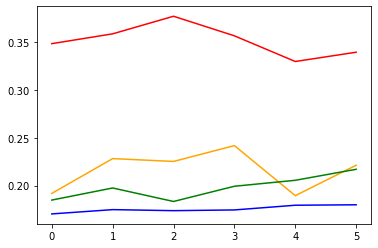

In [21]:
word_window_contexts.sum(axis=1)

array([ 416811.,  525072.,  352084.,  384518.,  471870.,  336754.,
        268788.,   28714.,   54142.,   42328.,   32958.,   30175.,
         43636.,   49358.,   50475.,    7520.,  920183., 1023787.,
        944100.,  893126.,  810977.,  655919.,  547875.,   72365.,
        411319.,  364504.,  441396.,  397851.,  371837.,  316428.,
        216392.,   29384.])

In [114]:
# def genContextDistribsByWord(list_of_speech_lists, window_col, sorted_word_dict, frame=10, top_n=5000)
word_context_arr = genContextDistribsByWord(list_of_speech_lists, speeches["grouping"], sorted_word_dict)
word_context_arr.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [116]:
word_frequencies = sorted_wordcount.sum(axis=0, keepdims=True)
word_distrib = word_frequencies / word_frequencies.sum(axis=1)
word_distrib = word_distrib[:,:30000]

In [125]:
taxicab_distances, _ = calc_taxicab(word_context_arr, word_distrib)
indices = np.argsort(-taxicab_distances)
indices = indices[indices < 1000][:100]

In [126]:
word_dict_pruned, indices = count_words_and_sample(list_of_speech_lists)

array([975, 848, 411, 291, 367, 453, 891, 998, 856, 509, 901, 160, 151,
       819, 899, 877, 972, 599, 825, 880, 855, 704, 832, 963, 818, 879,
       937, 682, 719, 996, 919, 875, 866, 531, 839, 779, 303, 641, 551,
       652, 874, 590, 935, 580, 508, 981, 870, 675, 923, 789, 760, 669,
       562, 881, 989, 623, 907, 762, 489, 741, 909, 842, 778, 613, 926,
       717, 795, 966, 576, 574, 869, 683, 495, 407, 745, 871, 847, 887,
       964, 701, 772, 646, 346, 830, 868, 892, 628, 999, 799, 642, 603,
       973, 282, 481, 927, 769, 545, 854, 730, 228], dtype=int64)

In [132]:
sorted_word_dict[282]

'weapons'

In [ ]:
for speaker, chamber, date, context in getNextContextOfWord(speeches, "freedom"):
    print(date, speaker, chamber)
    print(context)

In [97]:
window_distrib = wordcount_window_arr / wordcount_window_arr.sum(axis=1, keepdims=True)

context_array, window_dict = genContextArrByWindow("freedom", list_of_speech_lists, speeches["grouping"], word_dict)
context_array_rep = calcOverUnder(context_array, window_distrib, cutoff=0.0001)
printWordWeightArrayTopN(context_array_rep, word_dict, window_dict, n=10)

[1673 5868 9577 5851 3431 1577 4508 3250 3550 3407]
0 ['freedom', 'emigrate', 'lithuania', 'embassy', 'republic', 'struggle', 'religious', 'independence', 'seek', 'liberty']
[ 1673 22235  1577    24 16026  6844  4508   632  2616  9253]
1 ['freedom', 'fighters', 'struggle', 'generation', 'fighter', 'jews', 'religious', 'challenge', 'abroad', 'represented']
[ 1673  4020  2344  3551 12448  4970  4507 16908  3318  2497]
2 ['freedom', 'secure', 'press', 'expand', 'traffic', 'captive', 'cultural', 'peanut', 'denied', 'pressure']
[ 1673  8880  5929   705  1362  1808  2736  1577  5450 13048]
3 ['freedom', 'reporters', 'religion', 'information', 'practice', 'mental', 'minute', 'struggle', 'claim', 'harm']
[1673 9382 9577 9581 2272 4508 4824 2538 4957 1010]
4 ['freedom', 'lithuanian', 'lithuania', 'estonia', 'enjoy', 'religious', 'poland', 'regime', 'polish', 'rights']
[1673 1577 4794 4508 4957   24 4157 4824 1709 2693]
5 ['freedom', 'struggle', 'courage', 'religious', 'polish', 'generation', 'c

In [92]:
context_array_rep.shape

(34, 135179)

In [46]:
import matplotlib.pyplot as plt

[22235   285  3250  1615  9577  1673  1565   284  9660    24]
0 ['fighters', 'people', 'independence', 'peace', 'lithuania', 'freedom', 'justice', 'american', 'afghan', 'generation']
[22235  1830   284  1615  1565  9660  1516  2344    25  1525]
1 ['fighters', 'nations', 'american', 'peace', 'justice', 'afghan', 'international', 'press', 'new', 'world']
[ 313  705 2686 1830   82   25  505 1918   42   16]
2 ['act', 'information', 'soviet', 'nations', 'government', 'new', 'policy', 'union', 'may', 'made']
[ 705  313 2686 1673  372 1010   82  285 9382   42]
3 ['information', 'act', 'soviet', 'freedom', 'states', 'rights', 'government', 'people', 'lithuanian', 'may']
[ 1010  2686   284  1673  4794    68  1235 14392  9382    60]
4 ['rights', 'soviet', 'american', 'freedom', 'courage', 'work', 'every', 'abundance', 'lithuanian', 'speech']
[ 1525   828   285  1673   284    18  5929  1577  4957 14392]
5 ['world', 'right', 'people', 'freedom', 'american', 'us', 'religion', 'struggle', 'polish', 

array([[1.        , 0.82381822, 0.93035103, 0.95182697],
       [0.82381822, 1.        , 0.8931272 , 0.82108214],
       [0.93035103, 0.8931272 , 1.        , 0.97810606],
       [0.95182697, 0.82108214, 0.97810606, 1.        ]])

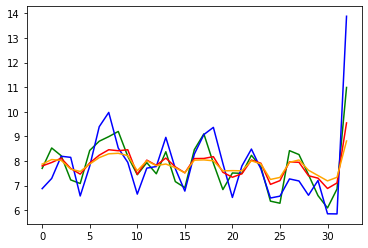

In [78]:
dkls, dkl_summands = calc_dkl(context_array) #, comp_func=make_past_present_arrs)
euclideans, euclidean_summands = calc_euclidean(context_array) #, comp_func=make_past_present_arrs)
taxicabs, taxicab_summands = calc_taxicab(context_array) #, comp_func=make_past_present_arrs)
hellingers, hellinger_summands = calc_hellinger(context_array) #, comp_func=make_past_present_arrs)

euclideans_scaled = euclideans * (dkls.sum() / euclideans.sum())
taxicabs_scaled = taxicabs * (dkls.sum() / taxicabs.sum())
hellingers_scaled = hellingers * (dkls.sum() / hellingers.sum())

fig, ax = plt.subplots(1)

ax.plot(range(33), dkls, label="dkl", color="green")
ax.plot(range(33), euclideans_scaled, label="euclidean", color="blue")
ax.plot(range(33), taxicabs_scaled, label="taxicab", color="red")
ax.plot(range(33), hellingers_scaled, label="hellinger", color="orange")

printWordWeightArrayTopN(euclidean_summands, word_dict)

np.corrcoef(np.array([dkls, euclideans_scaled, taxicabs_scaled, hellingers_scaled]))

In [45]:
3/1000 * (np.log2(3/1000) - np.log2(0.0000001))

0.04461802464081181

In [ ]:
# what are the least frequent words that still show up in over 30% of the groupings?
get_less_frequent_more_consistent_words(wordpresence_spch, wordpresence_dbt, word_dict, 0.3)

In [35]:
print_word_quantity_vector(word_dict, get_less_frequent_more_consistent_words_score(wordpresence_spch, wordpresence_dbt))

seger: 0.002993293470656671
levitt: 0.002993293470656671
clems: 0.0029934730889209704
wrightperkins: 0.0029934730889209704
longobey: 0.0029934730889209704
zablockis: 0.0029934730889209704
extraditable: 0.0029934730889209704
kemparmey: 0.0029934730889209704
panettamorrison: 0.0029934730889209704
dolewarner: 0.0029934730889209704
byrdnunn: 0.0029934730889209704
gills: 0.0029934730889209704
weatherized: 0.0029934730889209704
bribri: 0.002993652712574275
ezechial: 0.002993652712574275
plasticine: 0.002993652712574275
pickles: 0.002993652712574275
blackjacks: 0.002993652712574275
sentember: 0.002993652712574275
goodys: 0.002993652712574275
manlon: 0.002993652712574275
tobaccogrowing: 0.002993652712574275
sooial: 0.002993652712574275
klu: 0.002993652712574275
mentholatum: 0.002993652712574275
combe: 0.002993652712574275
actiqn: 0.002993652712574275
schmid: 0.002993652712574275
nsif: 0.002993652712574275
chattem: 0.002993652712574275
bumpersproxmire: 0.002993652712574275
nunnstevens: 0.002993

raza: 0.0029938323416165867
yzaguirre: 0.0029938323416165867
surrqgates: 0.0029938323416165867
amnericas: 0.0029938323416165867
amenl: 0.0029938323416165867
commo: 0.0029938323416165867
postembargo: 0.0029938323416165867
preembargo: 0.0029938323416165867
estihated: 0.0029938323416165867
petruso: 0.0029938323416165867
unlearn: 0.0029938323416165867
actionembargo: 0.0029938323416165867
firmand: 0.0029938323416165867
throughk: 0.0029938323416165867
statcments: 0.0029938323416165867
lichensteins: 0.0029938323416165867
illuminiating: 0.0029938323416165867
aivaca: 0.0029938323416165867
initilly: 0.0029938323416165867
ducuments: 0.0029938323416165867
prim: 0.0029938323416165867
embargothen: 0.0029938323416165867
professionai: 0.0029938323416165867
vip: 0.0029938323416165867
bringto: 0.0029938323416165867
publicised: 0.0029938323416165867
spareparts: 0.0029938323416165867
smc: 0.0029938323416165867
survivial: 0.0029938323416165867
toresist: 0.0029938323416165867
theprecise: 0.00299383234161658

deteriined: 0.0029938323416165867
gattr: 0.0029938323416165867
candadians: 0.0029938323416165867
thfvre: 0.0029938323416165867
mnechanism: 0.0029938323416165867
ujnited: 0.0029938323416165867
hippo: 0.0029938323416165867
ricannicaraguan: 0.0029938323416165867
minibus: 0.0029938323416165867
labeied: 0.0029938323416165867
owvners: 0.0029938323416165867
prattle: 0.0029938323416165867
fancied: 0.0029938323416165867
nonmarxistsmrs: 0.0029938323416165867
salvadoren: 0.0029938323416165867
zanmora: 0.0029938323416165867
slobbered: 0.0029938323416165867
tzetung: 0.0029938323416165867
dalvador: 0.0029938323416165867
carpio: 0.0029938323416165867
fullterm: 0.0029938323416165867
mvaricopa: 0.0029938323416165867
progressivewere: 0.0029938323416165867
rummage: 0.0029938323416165867
enforcemient: 0.0029938323416165867
politicaily: 0.0029938323416165867
meicher: 0.0029938323416165867
weickerchafee: 0.0029938323416165867
encrypt: 0.0029938323416165867
incrypt: 0.0029938323416165867
agrteement: 0.002993

stbcommlttee: 0.0029938323416165867
authorsof: 0.0029938323416165867
emhinent: 0.0029938323416165867
amfaidment: 0.0029938323416165867
doingand: 0.0029938323416165867
iirisked: 0.0029938323416165867
wholike: 0.0029938323416165867
correspondcts: 0.0029938323416165867
expreaing: 0.0029938323416165867
nacqa: 0.0029938323416165867
abotut: 0.0029938323416165867
memnbership: 0.0029938323416165867
ernlie: 0.0029938323416165867
anners: 0.0029938323416165867
hreshold: 0.0029938323416165867
misyment: 0.0029938323416165867
repershing: 0.0029938323416165867
nvinced: 0.0029938323416165867
miscuba: 0.0029938323416165867
sugthis: 0.0029938323416165867
prirances: 0.0029938323416165867
nuclehat: 0.0029938323416165867
tene: 0.0029938323416165867
solikely: 0.0029938323416165867
deprovocative: 0.0029938323416165867
nutes: 0.0029938323416165867
itory: 0.0029938323416165867
lonate: 0.0029938323416165867
constitut: 0.0029938323416165867
dewould: 0.0029938323416165867
deis: 0.0029938323416165867
poyment: 0.00

cultiurai: 0.0029938323416165867
unionthis: 0.0029938323416165867
pasippany: 0.0029938323416165867
hcalth: 0.0029938323416165867
callforwarding: 0.0029938323416165867
schoolse: 0.0029938323416165867
immunologist: 0.0029938323416165867
sitoution: 0.0029938323416165867
refusenikswho: 0.0029938323416165867
spokeand: 0.0029938323416165867
salkin: 0.0029938323416165867
persveuting: 0.0029938323416165867
emigrat: 0.0029938323416165867
tarnopoisky: 0.0029938323416165867
stntence: 0.0029938323416165867
tlite: 0.0029938323416165867
analoly: 0.0029938323416165867
oleske: 0.0029938323416165867
yesh: 0.0029938323416165867
howarthwho: 0.0029938323416165867
yeshs: 0.0029938323416165867
arrangeeents: 0.0029938323416165867
verificalton: 0.0029938323416165867
mutuadly: 0.0029938323416165867
regotiate: 0.0029938323416165867
tg: 0.0029938323416165867
seizedor: 0.0029938323416165867
communicalon: 0.0029938323416165867
tsonoass: 0.0029938323416165867
antitherein: 0.0029938323416165867
flickering: 0.0029938

erehe: 0.0029938323416165867
lter: 0.0029938323416165867
ltint: 0.0029938323416165867
etm: 0.0029938323416165867
fatling: 0.0029938323416165867
proitself: 0.0029938323416165867
unemsecond: 0.0029938323416165867
hoak: 0.0029938323416165867
daerit: 0.0029938323416165867
effed: 0.0029938323416165867
pelere: 0.0029938323416165867
inqitandtr: 0.0029938323416165867
reakbtyorc: 0.0029938323416165867
hisate: 0.0029938323416165867
dsrittended: 0.0029938323416165867
efinal: 0.0029938323416165867
pernlious: 0.0029938323416165867
discrialone: 0.0029938323416165867
graceperiod: 0.0029938323416165867
yld: 0.0029938323416165867
regularinsured: 0.0029938323416165867
olect: 0.0029938323416165867
bonas: 0.0029938323416165867
whichserves: 0.0029938323416165867
maneuverings: 0.0029938323416165867
unemployedthe: 0.0029938323416165867
uational: 0.0029938323416165867
comcent: 0.0029938323416165867
devasrate: 0.0029938323416165867
competiage: 0.0029938323416165867
inseperately: 0.0029938323416165867
unnumber:

biltic: 0.0029938323416165867
sorel: 0.0029938323416165867
subtotat: 0.0029938323416165867
yugostavia: 0.0029938323416165867
taypayers: 0.0029938323416165867
czechoskla: 0.0029938323416165867
emering: 0.0029938323416165867
disarmthen: 0.0029938323416165867
disarmand: 0.0029938323416165867
selfdisarmament: 0.0029938323416165867
destablilize: 0.0029938323416165867
policyno: 0.0029938323416165867
violance: 0.0029938323416165867
fonesca: 0.0029938323416165867
ploya: 0.0029938323416165867
administralions: 0.0029938323416165867
euwbe: 0.0029938323416165867
cubaand: 0.0029938323416165867
failedto: 0.0029938323416165867
guillotined: 0.0029938323416165867
separatelyi: 0.0029938323416165867
estimationi: 0.0029938323416165867
obvisouly: 0.0029938323416165867
tejeraparis: 0.0029938323416165867
caracas: 0.0029938323416165867
problemthey: 0.0029938323416165867
crate: 0.0029938323416165867
honduaras: 0.0029938323416165867
tcchnically: 0.0029938323416165867
whihh: 0.0029938323416165867
awaye: 0.002993

xport: 0.0029938323416165867
ouvastate: 0.0029938323416165867
purclise: 0.0029938323416165867
droned: 0.0029938323416165867
upshurwhich: 0.0029938323416165867
monongalia: 0.0029938323416165867
countiesbarbour: 0.0029938323416165867
kups: 0.0029938323416165867
norriswirtz: 0.0029938323416165867
departmentsbut: 0.0029938323416165867
leasin: 0.0029938323416165867
suggcsted: 0.0029938323416165867
remainled: 0.0029938323416165867
bigge: 0.0029938323416165867
ohioi: 0.0029938323416165867
industriesmany: 0.0029938323416165867
sentially: 0.0029938323416165867
renewe: 0.0029938323416165867
strugg: 0.0029938323416165867
odlmi: 0.0029938323416165867
specificaly: 0.0029938323416165867
pposed: 0.0029938323416165867
storageup: 0.0029938323416165867
forceswill: 0.0029938323416165867
subsidiesup: 0.0029938323416165867
expqrters: 0.0029938323416165867
iimove: 0.0029938323416165867
loanswhich: 0.0029938323416165867
loanswe: 0.0029938323416165867
categoryforeign: 0.0029938323416165867
ailowed: 0.00299383

doese: 0.0029938323416165867
whevr: 0.0029938323416165867
droughtinduced: 0.0029938323416165867
afrloan: 0.0029938323416165867
conistently: 0.0029938323416165867
espect: 0.0029938323416165867
transporatation: 0.0029938323416165867
proprlations: 0.0029938323416165867
bothlarge: 0.0029938323416165867
ronzones: 0.0029938323416165867
plishment: 0.0029938323416165867
accomample: 0.0029938323416165867
attortous: 0.0029938323416165867
sonn: 0.0029938323416165867
rehelen: 0.0029938323416165867
educabears: 0.0029938323416165867
busihaving: 0.0029938323416165867
hotelrestaurant: 0.0029938323416165867
estabsetting: 0.0029938323416165867
herding: 0.0029938323416165867
poperson: 0.0029938323416165867
minique: 0.0029938323416165867
donellie: 0.0029938323416165867
alpetche: 0.0029938323416165867
icles: 0.0029938323416165867
chron: 0.0029938323416165867
practurally: 0.0029938323416165867
rageousnwoen: 0.0029938323416165867
eurekaborn: 0.0029938323416165867
rageous: 0.0029938323416165867
yearwsne: 0.00

vither: 0.0029938323416165867
rctaltation: 0.0029938323416165867
agreeient: 0.0029938323416165867
argrinent: 0.0029938323416165867
crimefree: 0.0029938323416165867
cashegohuge: 0.0029938323416165867
cardsbut: 0.0029938323416165867
saleme: 0.0029938323416165867
jer: 0.0029938323416165867
eihnssy: 0.0029938323416165867
arnorit: 0.0029938323416165867
icil: 0.0029938323416165867
aneriacn: 0.0029938323416165867
jerutalim: 0.0029938323416165867
smverignty: 0.0029938323416165867
niranl: 0.0029938323416165867
sadil: 0.0029938323416165867
aiabs: 0.0029938323416165867
modeirate: 0.0029938323416165867
jerusaliinm: 0.0029938323416165867
embasy: 0.0029938323416165867
isra: 0.0029938323416165867
midled: 0.0029938323416165867
iorimir: 0.0029938323416165867
israiil: 0.0029938323416165867
jrursalem: 0.0029938323416165867
liagan: 0.0029938323416165867
presidnft: 0.0029938323416165867
quartile: 0.0029938323416165867
taridents: 0.0029938323416165867
drawers: 0.0029938323416165867
tvery: 0.0029938323416165

coimpared: 0.0029938323416165867
somiwhiat: 0.0029938323416165867
riecuid: 0.0029938323416165867
iniourage: 0.0029938323416165867
sieins: 0.0029938323416165867
guing: 0.0029938323416165867
iprobleis: 0.0029938323416165867
ameiina: 0.0029938323416165867
ciintral: 0.0029938323416165867
lufitits: 0.0029938323416165867
problinis: 0.0029938323416165867
oblein: 0.0029938323416165867
consumeis: 0.0029938323416165867
onilty: 0.0029938323416165867
biihway: 0.0029938323416165867
soniithing: 0.0029938323416165867
subcomrittees: 0.0029938323416165867
soltl: 0.0029938323416165867
greial: 0.0029938323416165867
sind: 0.0029938323416165867
invesilgat: 0.0029938323416165867
hubcommittee: 0.0029938323416165867
permaawat: 0.0029938323416165867
johnsron: 0.0029938323416165867
nonenergy: 0.0029938323416165867
cotunt: 0.0029938323416165867
asggestions: 0.0029938323416165867
thlese: 0.0029938323416165867
enirgency: 0.0029938323416165867
tinligamir: 0.0029938323416165867
thtil: 0.0029938323416165867
ethasirms

slatistics: 0.0029938323416165867
busa: 0.0029938323416165867
deoember: 0.0029938323416165867
overaction: 0.0029938323416165867
averse: 0.0029938323416165867
problematigue: 0.0029938323416165867
doxiades: 0.0029938323416165867
seecking: 0.0029938323416165867
piwe: 0.0029938323416165867
liise: 0.0029938323416165867
adiln: 0.0029938323416165867
weinhergers: 0.0029938323416165867
tclnology: 0.0029938323416165867
ornviziltin: 0.0029938323416165867
iaders: 0.0029938323416165867
mnulsoned: 0.0029938323416165867
weinherger: 0.0029938323416165867
tceretary: 0.0029938323416165867
lense: 0.0029938323416165867
alran: 0.0029938323416165867
pilting: 0.0029938323416165867
illin: 0.0029938323416165867
sarfaced: 0.0029938323416165867
hau: 0.0029938323416165867
acledul: 0.0029938323416165867
developini: 0.0029938323416165867
iaus: 0.0029938323416165867
whicuh: 0.0029938323416165867
foter: 0.0029938323416165867
improimeints: 0.0029938323416165867
technliogy: 0.0029938323416165867
criw: 0.002993832341616

timeconstiing: 0.0029938323416165867
alonein: 0.0029938323416165867
lecting: 0.0029938323416165867
pricethese: 0.0029938323416165867
committece: 0.0029938323416165867
ownersand: 0.0029938323416165867
municipalsite: 0.0029938323416165867
cense: 0.0029938323416165867
diormant: 0.0029938323416165867
denyingitems: 0.0029938323416165867
reviewingand: 0.0029938323416165867
prdgram: 0.0029938323416165867
mionthis: 0.0029938323416165867
ovenissuance: 0.0029938323416165867
docile: 0.0029938323416165867
jailthey: 0.0029938323416165867
indetermined: 0.0029938323416165867
abott: 0.0029938323416165867
cotunty: 0.0029938323416165867
practic: 0.0029938323416165867
formsthis: 0.0029938323416165867
refusied: 0.0029938323416165867
uvalde: 0.0029938323416165867
repubiic: 0.0029938323416165867
reappearing: 0.0029938323416165867
forbears: 0.0029938323416165867
citizenrya: 0.0029938323416165867
thian: 0.0029938323416165867
zabkwki: 0.0029938323416165867
rrie: 0.0029938323416165867
reoi: 0.002993832341616586

unfurled: 0.0029938323416165867
cornmnitted: 0.0029938323416165867
kindess: 0.0029938323416165867
reiiburse: 0.0029938323416165867
marielitoshave: 0.0029938323416165867
arrivalsthe: 0.0029938323416165867
mentalitythat: 0.0029938323416165867
refugeeswho: 0.0029938323416165867
acaeleic: 0.0029938323416165867
arrivaleven: 0.0029938323416165867
froiji: 0.0029938323416165867
prurient: 0.0029938323416165867
firstoffense: 0.0029938323416165867
distributiork: 0.0029938323416165867
haif: 0.0029938323416165867
hiaif: 0.0029938323416165867
kaw: 0.0029938323416165867
conigress: 0.0029938323416165867
amierica: 0.0029938323416165867
managrilent: 0.0029938323416165867
creats: 0.0029938323416165867
asdstant: 0.0029938323416165867
nightwhat: 0.0029938323416165867
competely: 0.0029938323416165867
specialuorder: 0.0029938323416165867
opprrtuzilty: 0.0029938323416165867
pcrspective: 0.0029938323416165867
tiruth: 0.0029938323416165867
qoebbels: 0.0029938323416165867
demolions: 0.0029938323416165867
wlest: 

legislathon: 0.0029938323416165867
tamo: 0.0029938323416165867
hilr: 0.0029938323416165867
cqlleagues: 0.0029938323416165867
dissensions: 0.0029938323416165867
natiwns: 0.0029938323416165867
monolith: 0.0029938323416165867
historry: 0.0029938323416165867
stasys: 0.0029938323416165867
bredes: 0.0029938323416165867
aleksis: 0.0029938323416165867
scries: 0.0029938323416165867
sportsbut: 0.0029938323416165867
goverlo: 0.0029938323416165867
hotie: 0.0029938323416165867
insistenet: 0.0029938323416165867
inirest: 0.0029938323416165867
hirh: 0.0029938323416165867
majsor: 0.0029938323416165867
conservat: 0.0029938323416165867
hodox: 0.0029938323416165867
lth: 0.0029938323416165867
outburst: 0.0029938323416165867
procreds: 0.0029938323416165867
assuimption: 0.0029938323416165867
defieit: 0.0029938323416165867
itmal: 0.0029938323416165867
econontics: 0.0029938323416165867
extravagantie: 0.0029938323416165867
tintional: 0.0029938323416165867
viiality: 0.0029938323416165867
examle: 0.00299383234161

resourcesothers: 0.0029938323416165867
violenceit: 0.0029938323416165867
oerced: 0.0029938323416165867
itleman: 0.0029938323416165867
murphyerlenborn: 0.0029938323416165867
coleges: 0.0029938323416165867
clearup: 0.0029938323416165867
instrunlental: 0.0029938323416165867
civiifged: 0.0029938323416165867
mrtatchford: 0.0029938323416165867
groupsthen: 0.0029938323416165867
minlites: 0.0029938323416165867
andnonnarcotic: 0.0029938323416165867
senanot: 0.0029938323416165867
stipporting: 0.0029938323416165867
governinents: 0.0029938323416165867
trhat: 0.0029938323416165867
ropolitan: 0.0029938323416165867
dislnsied: 0.0029938323416165867
regionalism: 0.0029938323416165867
olersight: 0.0029938323416165867
regionalismn: 0.0029938323416165867
congrmss: 0.0029938323416165867
aiiath: 0.0029938323416165867
armsrong: 0.0029938323416165867
nonday: 0.0029938323416165867
subsidizedis: 0.0029938323416165867
activitieseven: 0.0029938323416165867
belic: 0.0029938323416165867
aynd: 0.0029938323416165867


succintly: 0.0029938323416165867
indentity: 0.0029938323416165867
loanswithout: 0.0029938323416165867
msfbas: 0.0029938323416165867
perserveraxice: 0.0029938323416165867
ingebrand: 0.0029938323416165867
systemfrom: 0.0029938323416165867
prindipai: 0.0029938323416165867
perspectivea: 0.0029938323416165867
significient: 0.0029938323416165867
colleglally: 0.0029938323416165867
deficien: 0.0029938323416165867
arevoiced: 0.0029938323416165867
realignmient: 0.0029938323416165867
stalte: 0.0029938323416165867
bouing: 0.0029938323416165867
donehowever: 0.0029938323416165867
issqe: 0.0029938323416165867
ivailable: 0.0029938323416165867
ommission: 0.0029938323416165867
ellminating: 0.0029938323416165867
realth: 0.0029938323416165867
enme: 0.0029938323416165867
fitz: 0.0029938323416165867
objectivee: 0.0029938323416165867
msbpa: 0.0029938323416165867
loansgiving: 0.0029938323416165867
condult: 0.0029938323416165867
onanother: 0.0029938323416165867
intenti: 0.0029938323416165867
cancome: 0.0029938

remediless: 0.0029938323416165867
unsurpations: 0.0029938323416165867
tionable: 0.0029938323416165867
imitiated: 0.0029938323416165867
pubtius: 0.0029938323416165867
iart: 0.0029938323416165867
kuzmenko: 0.0029938323416165867
sepdrate: 0.0029938323416165867
impeachments: 0.0029938323416165867
observablein: 0.0029938323416165867
establishi: 0.0029938323416165867
applicationof: 0.0029938323416165867
werecarried: 0.0029938323416165867
iffe: 0.0029938323416165867
hoarders: 0.0029938323416165867
workingplace: 0.0029938323416165867
balovlenkovs: 0.0029938323416165867
katya: 0.0029938323416165867
intermixture: 0.0029938323416165867
familyeveryone: 0.0029938323416165867
baptised: 0.0029938323416165867
baptistry: 0.0029938323416165867
mediaall: 0.0029938323416165867
lindburgh: 0.0029938323416165867
publiclyi: 0.0029938323416165867
lbse: 0.0029938323416165867
champva: 0.0029938323416165867
feebasis: 0.0029938323416165867
cleaver: 0.0029938323416165867
larras: 0.0029938323416165867
sourtasting: 0

rizaldy: 0.0029938323416165867
jona: 0.0029938323416165867
metha: 0.0029938323416165867
philomene: 0.0029938323416165867
leraisle: 0.0029938323416165867
mehu: 0.0029938323416165867
italfan: 0.0029938323416165867
petrignani: 0.0029938323416165867
affain: 0.0029938323416165867
communitization: 0.0029938323416165867
recordholder: 0.0029938323416165867
communized: 0.0029938323416165867
questkn: 0.0029938323416165867
gecretary: 0.0029938323416165867
cunduct: 0.0029938323416165867
certificatebut: 0.0029938323416165867
malivitlsis: 0.0029938323416165867
exporterno: 0.0029938323416165867
duero: 0.0029938323416165867
pelagia: 0.0029938323416165867
jamolague: 0.0029938323416165867
eucarlo: 0.0029938323416165867
sabas: 0.0029938323416165867
montiel: 0.0029938323416165867
mompoint: 0.0029938323416165867
immacula: 0.0029938323416165867
hwa: 0.0029938323416165867
libia: 0.0029938323416165867
multihazard: 0.0029938323416165867
takis: 0.0029938323416165867
malaban: 0.0029938323416165867
sevando: 0.002

batp: 0.0029938323416165867
mortgagor: 0.0029938323416165867
congressignal: 0.0029938323416165867
cajes: 0.0029938323416165867
kendalland: 0.0029938323416165867
lefty: 0.0029938323416165867
kastan: 0.0029938323416165867
motts: 0.0029938323416165867
axles: 0.0029938323416165867
utica: 0.0029938323416165867
westonmott: 0.0029938323416165867
wnrk: 0.0029938323416165867
cauldror: 0.0029938323416165867
mobutus: 0.0029938323416165867
believ: 0.0029938323416165867
arrangementswe: 0.0029938323416165867
judgcs: 0.0029938323416165867
evalation: 0.0029938323416165867
nonlegislative: 0.0029938323416165867
desultory: 0.0029938323416165867
fourthfifths: 0.0029938323416165867
bengalis: 0.0029938323416165867
assyrian: 0.0029938323416165867
gypsies: 0.0029938323416165867
wasmhingon: 0.0029938323416165867
atrn: 0.0029938323416165867
fnts: 0.0029938323416165867
increaseswhich: 0.0029938323416165867
raixir: 0.0029938323416165867
shoull: 0.0029938323416165867
ttoonrad: 0.0029938323416165867
servein: 0.0029

cospinsor: 0.0029938323416165867
jobholding: 0.0029938323416165867
aboutr: 0.0029938323416165867
toolshed: 0.0029938323416165867
repented: 0.0029938323416165867
blindfolders: 0.0029938323416165867
bhjiding: 0.0029938323416165867
annunciation: 0.0029938323416165867
presstige: 0.0029938323416165867
secretaryds: 0.0029938323416165867
arreed: 0.0029938323416165867
exainined: 0.0029938323416165867
calendarso: 0.0029938323416165867
yesterdaylet: 0.0029938323416165867
saddend: 0.0029938323416165867
cerpts: 0.0029938323416165867
mshas: 0.0029938323416165867
kiln: 0.0029938323416165867
pelletizing: 0.0029938323416165867
plautis: 0.0029938323416165867
kity: 0.0029938323416165867
adoptiun: 0.0029938323416165867
januarydecember: 0.0029938323416165867
ascopies: 0.0029938323416165867
amax: 0.0029938323416165867
imposedthe: 0.0029938323416165867
mashia: 0.0029938323416165867
osia: 0.0029938323416165867
reprcsent: 0.0029938323416165867
trafhspired: 0.0029938323416165867
minesites: 0.002993832341616586

foreclosurethen: 0.0029938323416165867
stacle: 0.0029938323416165867
chapges: 0.0029938323416165867
stunds: 0.0029938323416165867
rightsmake: 0.0029938323416165867
abusestorture: 0.0029938323416165867
informatfon: 0.0029938323416165867
lineseach: 0.0029938323416165867
rellthe: 0.0029938323416165867
haigluns: 0.0029938323416165867
unionwere: 0.0029938323416165867
mailgrams: 0.0029938323416165867
senatorsit: 0.0029938323416165867
honorina: 0.0029938323416165867
acroms: 0.0029938323416165867
thefiscal: 0.0029938323416165867
chmesto: 0.0029938323416165867
responsiblilty: 0.0029938323416165867
tonothing: 0.0029938323416165867
valhalla: 0.0029938323416165867
judgmcnt: 0.0029938323416165867
twothirdstoday: 0.0029938323416165867
quiredin: 0.0029938323416165867
tariffbut: 0.0029938323416165867
peisons: 0.0029938323416165867
mississippii: 0.0029938323416165867
reductionsthat: 0.0029938323416165867
sunbulletin: 0.0029938323416165867
hamton: 0.0029938323416165867
accreting: 0.0029938323416165867
s

unpreparedness: 0.0029938323416165867
livesof: 0.0029938323416165867
directhire: 0.0029938323416165867
welfarethe: 0.0029938323416165867
diversonary: 0.0029938323416165867
civl: 0.0029938323416165867
rankse: 0.0029938323416165867
republication: 0.0029938323416165867
budgettax: 0.0029938323416165867
rou: 0.0029938323416165867
fiscaly: 0.0029938323416165867
capfiscal: 0.0029938323416165867
ccanmunications: 0.0029938323416165867
endin: 0.0029938323416165867
cannotsacrifice: 0.0029938323416165867
reconcili: 0.0029938323416165867
structurewhich: 0.0029938323416165867
refueled: 0.0029938323416165867
matusevych: 0.0029938323416165867
lvov: 0.0029938323416165867
lavuts: 0.0029938323416165867
dilemination: 0.0029938323416165867
alltoofamiliar: 0.0029938323416165867
velikanova: 0.0029938323416165867
khabarovsky: 0.0029938323416165867
lavut: 0.0029938323416165867
lowpriority: 0.0029938323416165867
domnici: 0.0029938323416165867
rewinged: 0.0029938323416165867
itfollowing: 0.0029938323416165867
pr

touripm: 0.0029938323416165867
localover: 0.0029938323416165867
tourismis: 0.0029938323416165867
nonconcessional: 0.0029938323416165867
herskovits: 0.0029938323416165867
nigerias: 0.0029938323416165867
nigeriawhose: 0.0029938323416165867
unintendedof: 0.0029938323416165867
justcompleted: 0.0029938323416165867
resultintended: 0.0029938323416165867
hisnot: 0.0029938323416165867
riesel: 0.0029938323416165867
barkan: 0.0029938323416165867
steelabors: 0.0029938323416165867
politizal: 0.0029938323416165867
aderal: 0.0029938323416165867
raffle: 0.0029938323416165867
opposealthough: 0.0029938323416165867
poseldons: 0.0029938323416165867
atta: 0.0029938323416165867
leaderschoice: 0.0029938323416165867
expectthe: 0.0029938323416165867
benefitsunder: 0.0029938323416165867
taxhaven: 0.0029938323416165867
rvithout: 0.0029938323416165867
responh: 0.0029938323416165867
concernsand: 0.0029938323416165867
delegationhave: 0.0029938323416165867
scoping: 0.0029938323416165867
valuemissiles: 0.002993832341

avallablq: 0.0029938323416165867
conciliating: 0.0029938323416165867
scissors: 0.0029938323416165867
effortthat: 0.0029938323416165867
goodmedicaid: 0.0029938323416165867
deerhunting: 0.0029938323416165867
forevermore: 0.0029938323416165867
agdin: 0.0029938323416165867
defirits: 0.0029938323416165867
amendhcfa: 0.0029938323416165867
teachersoften: 0.0029938323416165867
cafeteriatype: 0.0029938323416165867
januaty: 0.0029938323416165867
adimstration: 0.0029938323416165867
earthmore: 0.0029938323416165867
blockbusting: 0.0029938323416165867
homeseekers: 0.0029938323416165867
preseits: 0.0029938323416165867
moynmhan: 0.0029938323416165867
emergencles: 0.0029938323416165867
tretment: 0.0029938323416165867
availablity: 0.0029938323416165867
fotees: 0.0029938323416165867
originthe: 0.0029938323416165867
actrace: 0.0029938323416165867
testers: 0.0029938323416165867
recommendationr: 0.0029938323416165867
hudfunded: 0.0029938323416165867
speialized: 0.0029938323416165867
marketone: 0.0029938323

vmy: 0.0029938323416165867
orce: 0.0029938323416165867
armyvs: 0.0029938323416165867
myo: 0.0029938323416165867
orme: 0.0029938323416165867
colktu: 0.0029938323416165867
galgh: 0.0029938323416165867
bglekat: 0.0029938323416165867
osep: 0.0029938323416165867
thomasrl: 0.0029938323416165867
mctdwqad: 0.0029938323416165867
jtar: 0.0029938323416165867
lanil: 0.0029938323416165867
loedi: 0.0029938323416165867
slan: 0.0029938323416165867
kwi: 0.0029938323416165867
mna: 0.0029938323416165867
crarsts: 0.0029938323416165867
theodor: 0.0029938323416165867
rks: 0.0029938323416165867
hsuort: 0.0029938323416165867
piner: 0.0029938323416165867
dterruss: 0.0029938323416165867
mlera: 0.0029938323416165867
dayie: 0.0029938323416165867
eieymo: 0.0029938323416165867
f_: 0.0029938323416165867
balsa: 0.0029938323416165867
pter: 0.0029938323416165867
hesied: 0.0029938323416165867
mudos: 0.0029938323416165867
ocey: 0.0029938323416165867
icder: 0.0029938323416165867
habarre: 0.0029938323416165867
mjf: 0.00299

permenent: 0.0029938323416165867
pontiacs: 0.0029938323416165867
supplemtal: 0.0029938323416165867
amitecomite: 0.0029938323416165867
plahs: 0.0029938323416165867
expenditi: 0.0029938323416165867
campalgn: 0.0029938323416165867
stuation: 0.0029938323416165867
delphia: 0.0029938323416165867
preemnentand: 0.0029938323416165867
phila: 0.0029938323416165867
repredentative: 0.0029938323416165867
crannies: 0.0029938323416165867
nooks: 0.0029938323416165867
violatedwhich: 0.0029938323416165867
noblemen: 0.0029938323416165867
chuckled: 0.0029938323416165867
lesie: 0.0029938323416165867
preeminentcame: 0.0029938323416165867
limitan: 0.0029938323416165867
reachforthemoon: 0.0029938323416165867
weaknessavoid: 0.0029938323416165867
doesand: 0.0029938323416165867
underkay: 0.0029938323416165867
honeysmooth: 0.0029938323416165867
writereditor: 0.0029938323416165867
travise: 0.0029938323416165867
activein: 0.0029938323416165867
vacaville: 0.0029938323416165867
centersthe: 0.0029938323416165867
statep

allamericans: 0.0029938323416165867
hardcash: 0.0029938323416165867
philanthropists: 0.0029938323416165867
slonally: 0.0029938323416165867
casional: 0.0029938323416165867
adnministra: 0.0029938323416165867
deeplye: 0.0029938323416165867
vodaath: 0.0029938323416165867
greenbaums: 0.0029938323416165867
yehudis: 0.0029938323416165867
kirner: 0.0029938323416165867
schragi: 0.0029938323416165867
shlomo: 0.0029938323416165867
coummunity: 0.0029938323416165867
talmudic: 0.0029938323416165867
alumnae: 0.0029938323416165867
greenbum: 0.0029938323416165867
lifeling: 0.0029938323416165867
mendlowitz: 0.0029938323416165867
shain: 0.0029938323416165867
llision: 0.0029938323416165867
kobdriven: 0.0029938323416165867
muffle: 0.0029938323416165867
feetenough: 0.0029938323416165867
attenti: 0.0029938323416165867
roths: 0.0029938323416165867
clearheaded: 0.0029938323416165867
synopsizing: 0.0029938323416165867
antihypocrisy: 0.0029938323416165867
antiprotection: 0.0029938323416165867
propoinding: 0.0029

vitually: 0.0029938323416165867
minable: 0.0029938323416165867
sandhill: 0.0029938323416165867
forceo: 0.0029938323416165867
defeatedwe: 0.0029938323416165867
otherwisefrom: 0.0029938323416165867
checkssocial: 0.0029938323416165867
haltand: 0.0029938323416165867
billnot: 0.0029938323416165867
cutthe: 0.0029938323416165867
cahans: 0.0029938323416165867
getinto: 0.0029938323416165867
njlrt: 0.0029938323416165867
disth: 0.0029938323416165867
unawares: 0.0029938323416165867
indic: 0.0029938323416165867
raisede: 0.0029938323416165867
muchmalinged: 0.0029938323416165867
identigal: 0.0029938323416165867
languagesection: 0.0029938323416165867
congreses: 0.0029938323416165867
improre: 0.0029938323416165867
seciurily: 0.0029938323416165867
exabtly: 0.0029938323416165867
theduplicity: 0.0029938323416165867
washingtonis: 0.0029938323416165867
recessionsuch: 0.0029938323416165867
loulsia: 0.0029938323416165867
curcumstances: 0.0029938323416165867
fbx: 0.0029938323416165867
indigo: 0.002993832341616

follower: 0.0029938323416165867
nidals: 0.0029938323416165867
theseinnocent: 0.0029938323416165867
themommunity: 0.0029938323416165867
referted: 0.0029938323416165867
ourmarch: 0.0029938323416165867
adverses: 0.0029938323416165867
inperasincd: 0.0029938323416165867
therebeen: 0.0029938323416165867
hopeation: 0.0029938323416165867
leaderprincipal: 0.0029938323416165867
restora: 0.0029938323416165867
distintegration: 0.0029938323416165867
ploand: 0.0029938323416165867
geographicai: 0.0029938323416165867
faldrawal: 0.0029938323416165867
withevident: 0.0029938323416165867
wthresort: 0.0029938323416165867
refirt: 0.0029938323416165867
popoals: 0.0029938323416165867
eddes: 0.0029938323416165867
gdes: 0.0029938323416165867
disarmd: 0.0029938323416165867
effecals: 0.0029938323416165867
gests: 0.0029938323416165867
edde: 0.0029938323416165867
economiz: 0.0029938323416165867
comunihuman: 0.0029938323416165867
ferocious: 0.0029938323416165867
furto: 0.0029938323416165867
ubjetedpressive: 0.002993

comeabout: 0.0029938323416165867
banon: 0.0029938323416165867
irregularly: 0.0029938323416165867
nonracist: 0.0029938323416165867
underhouse: 0.0029938323416165867
laand: 0.0029938323416165867
dicussion: 0.0029938323416165867
defiled: 0.0029938323416165867
criticalso: 0.0029938323416165867
nowwhen: 0.0029938323416165867
levelthrough: 0.0029938323416165867
aliveat: 0.0029938323416165867
countieswhich: 0.0029938323416165867
borderwhich: 0.0029938323416165867
jalisco: 0.0029938323416165867
lilesville: 0.0029938323416165867
rhymes: 0.0029938323416165867
stereotyping: 0.0029938323416165867
totaldisregard: 0.0029938323416165867
greaterif: 0.0029938323416165867
includedin: 0.0029938323416165867
rutkowski: 0.0029938323416165867
statestaiwan: 0.0029938323416165867
xiannin: 0.0029938323416165867
xu: 0.0029938323416165867
sorter: 0.0029938323416165867
sorters: 0.0029938323416165867
souders: 0.0029938323416165867
oelling: 0.0029938323416165867
bova: 0.0029938323416165867
marshallese: 0.00299383234

allowe: 0.0029938323416165867
onlyr: 0.0029938323416165867
rightminded: 0.0029938323416165867
stromsdorfer: 0.0029938323416165867
decigions: 0.0029938323416165867
substiute: 0.0029938323416165867
rediculous: 0.0029938323416165867
solemake: 0.0029938323416165867
sergicemen: 0.0029938323416165867
takein: 0.0029938323416165867
backpack: 0.0029938323416165867
dellumsj: 0.0029938323416165867
cfmpromise: 0.0029938323416165867
objeci: 0.0029938323416165867
denigration: 0.0029938323416165867
illinoishe: 0.0029938323416165867
bxer: 0.0029938323416165867
bouiter: 0.0029938323416165867
borsk: 0.0029938323416165867
behlert: 0.0029938323416165867
annrews: 0.0029938323416165867
postsputnik: 0.0029938323416165867
franciscomany: 0.0029938323416165867
winking: 0.0029938323416165867
safd: 0.0029938323416165867
millsbyrnes: 0.0029938323416165867
mosteloquent: 0.0029938323416165867
answere: 0.0029938323416165867
ppnitive: 0.0029938323416165867
theseinclude: 0.0029938323416165867
istates: 0.002993832341616

keney: 0.0029938323416165867
leihy: 0.0029938323416165867
isasgreat: 0.0029938323416165867
qoverninent: 0.0029938323416165867
riott: 0.0029938323416165867
afarpital: 0.0029938323416165867
octoher: 0.0029938323416165867
yrk: 0.0029938323416165867
busion: 0.0029938323416165867
suehealth: 0.0029938323416165867
complited: 0.0029938323416165867
allowi: 0.0029938323416165867
cletirly: 0.0029938323416165867
unfortunaely: 0.0029938323416165867
reducingthe: 0.0029938323416165867
panamani: 0.0029938323416165867
hauptmans: 0.0029938323416165867
resolutioh: 0.0029938323416165867
losea: 0.0029938323416165867
mrpa: 0.0029938323416165867
wego: 0.0029938323416165867
specte: 0.0029938323416165867
recoverybe: 0.0029938323416165867
allwish: 0.0029938323416165867
ntoting: 0.0029938323416165867
levif: 0.0029938323416165867
longdeserved: 0.0029938323416165867
shelbycounty: 0.0029938323416165867
unionon: 0.0029938323416165867
pointsthose: 0.0029938323416165867
defebse: 0.0029938323416165867
recognizethe: 0.0

wouldapply: 0.0029938323416165867
partnerspursue: 0.0029938323416165867
industriesbut: 0.0029938323416165867
governmentsnot: 0.0029938323416165867
readin: 0.0029938323416165867
newjobs: 0.0029938323416165867
partnershave: 0.0029938323416165867
nationsour: 0.0029938323416165867
sectorsthe: 0.0029938323416165867
annoucement: 0.0029938323416165867
pehnsylvania: 0.0029938323416165867
pqrcent: 0.0029938323416165867
thedollar: 0.0029938323416165867
capacityto: 0.0029938323416165867
olden: 0.0029938323416165867
probleni: 0.0029938323416165867
snite: 0.0029938323416165867
recokb: 0.0029938323416165867
shanghal: 0.0029938323416165867
shipload: 0.0029938323416165867
ilgwu: 0.0029938323416165867
increaseholding: 0.0029938323416165867
intexas: 0.0029938323416165867
pre_: 0.0029938323416165867
depressionyear: 0.0029938323416165867
sophisticasup: 0.0029938323416165867
icul: 0.0029938323416165867
insouth: 0.0029938323416165867
newcompeting: 0.0029938323416165867
developndi: 0.0029938323416165867
etal

iiibwhile: 0.0029938323416165867
iiibor: 0.0029938323416165867
nongraduate: 0.0029938323416165867
afqt: 0.0029938323416165867
sinoamerican: 0.0029938323416165867
recoveryseed: 0.0029938323416165867
surebring: 0.0029938323416165867
navigators: 0.0029938323416165867
livinga: 0.0029938323416165867
genocidewas: 0.0029938323416165867
exterminationof: 0.0029938323416165867
jist: 0.0029938323416165867
rampup: 0.0029938323416165867
overbill: 0.0029938323416165867
monroney: 0.0029938323416165867
basesmilitary: 0.0029938323416165867
cathode: 0.0029938323416165867
andweapons: 0.0029938323416165867
thisbudget: 0.0029938323416165867
sevenandahalf: 0.0029938323416165867
foreheads: 0.0029938323416165867
figureheads: 0.0029938323416165867
inductees: 0.0029938323416165867
taxespropose: 0.0029938323416165867
leadershipat: 0.0029938323416165867
alre: 0.0029938323416165867
voteyou: 0.0029938323416165867
hyprocrisy: 0.0029938323416165867
renegades: 0.0029938323416165867
packageon: 0.0029938323416165867
dem

glendell: 0.0029938323416165867
savagethe: 0.0029938323416165867
tryaugusta: 0.0029938323416165867
sculptress: 0.0029938323416165867
bluford: 0.0029938323416165867
gulon: 0.0029938323416165867
onesabout: 0.0029938323416165867
publrcation: 0.0029938323416165867
okcorral: 0.0029938323416165867
waylucy: 0.0029938323416165867
zielinski: 0.0029938323416165867
gastonguays: 0.0029938323416165867
complicationa: 0.0029938323416165867
surfuce: 0.0029938323416165867
stroking: 0.0029938323416165867
tactile: 0.0029938323416165867
cephalocaudal: 0.0029938323416165867
reinis: 0.0029938323416165867
colleaguesan: 0.0029938323416165867
camino: 0.0029938323416165867
deterding: 0.0029938323416165867
geils: 0.0029938323416165867
negotiata: 0.0029938323416165867
revclutionary: 0.0029938323416165867
scmoza: 0.0029938323416165867
fdnis: 0.0029938323416165867
termregime: 0.0029938323416165867
whoma: 0.0029938323416165867
marxistoriented: 0.0029938323416165867
irreverable: 0.0029938323416165867
doif: 0.00299383

releasedwith: 0.0029938323416165867
jabotinsky: 0.0029938323416165867
yakou: 0.0029938323416165867
kholmiansky: 0.0029938323416165867
lecturesand: 0.0029938323416165867
cookouts: 0.0029938323416165867
aelegated: 0.0029938323416165867
hasso: 0.0029938323416165867
addedthe: 0.0029938323416165867
carolia: 0.0029938323416165867
nepomniashchy: 0.0029938323416165867
stinginess: 0.0029938323416165867
distinguislied: 0.0029938323416165867
luncheonthat: 0.0029938323416165867
mondalebrademus: 0.0029938323416165867
yerwood: 0.0029938323416165867
shayla: 0.0029938323416165867
hudgens: 0.0029938323416165867
failureyou: 0.0029938323416165867
mothering: 0.0029938323416165867
stamfords: 0.0029938323416165867
ellishudgens: 0.0029938323416165867
larosiere: 0.0029938323416165867
thirdin: 0.0029938323416165867
shapira: 0.0029938323416165867
possessiondrugs: 0.0029938323416165867
delbcites: 0.0029938323416165867
whyis: 0.0029938323416165867
boslough: 0.0029938323416165867
currencyby: 0.0029938323416165867


completelysolve: 0.0029938323416165867
willfinally: 0.0029938323416165867
notsome: 0.0029938323416165867
interestseller: 0.0029938323416165867
mene: 0.0029938323416165867
colonialist: 0.0029938323416165867
olonialist: 0.0029938323416165867
statessovit: 0.0029938323416165867
polinas: 0.0029938323416165867
irkutsk: 0.0029938323416165867
kozlavskaya: 0.0029938323416165867
polina: 0.0029938323416165867
enjoyespecially: 0.0029938323416165867
boschwitzi: 0.0029938323416165867
rewardhe: 0.0029938323416165867
semyonova: 0.0029938323416165867
thier: 0.0029938323416165867
neocolonialist: 0.0029938323416165867
genration: 0.0029938323416165867
bleyls: 0.0029938323416165867
bleyl: 0.0029938323416165867
denegrate: 0.0029938323416165867
attentionon: 0.0029938323416165867
prated: 0.0029938323416165867
sough: 0.0029938323416165867
bloodstained: 0.0029938323416165867
mealymouthed: 0.0029938323416165867
mealymouthing: 0.0029938323416165867
boastings: 0.0029938323416165867
thim: 0.0029938323416165867
akes

individthe: 0.0029938323416165867
blockers: 0.0029938323416165867
hyperreactors: 0.0029938323416165867
galvanic: 0.0029938323416165867
tryand: 0.0029938323416165867
michithe: 0.0029938323416165867
cooperi: 0.0029938323416165867
sharedt: 0.0029938323416165867
tector: 0.0029938323416165867
gentleperson: 0.0029938323416165867
oppop: 0.0029938323416165867
rsavings: 0.0029938323416165867
cqnsidering: 0.0029938323416165867
pulbics: 0.0029938323416165867
aidthats: 0.0029938323416165867
empties: 0.0029938323416165867
erious: 0.0029938323416165867
merriment: 0.0029938323416165867
loused: 0.0029938323416165867
farmershome: 0.0029938323416165867
overfund: 0.0029938323416165867
mazoll: 0.0029938323416165867
oblinger: 0.0029938323416165867
irunning: 0.0029938323416165867
tessa: 0.0029938323416165867
differentideas: 0.0029938323416165867
manne: 0.0029938323416165867
resolv: 0.0029938323416165867
inspira: 0.0029938323416165867
rtcord: 0.0029938323416165867
yarit: 0.0029938323416165867
administratiors

mpensating: 0.0029938323416165867
ticipates: 0.0029938323416165867
formaie: 0.0029938323416165867
progressiveing: 0.0029938323416165867
acthat: 0.0029938323416165867
educaam: 0.0029938323416165867
ecoth: 0.0029938323416165867
eting: 0.0029938323416165867
shington: 0.0029938323416165867
employams: 0.0029938323416165867
uced: 0.0029938323416165867
lses: 0.0029938323416165867
eterans: 0.0029938323416165867
nutrias: 0.0029938323416165867
agriculod: 0.0029938323416165867
subsiirop: 0.0029938323416165867
municment: 0.0029938323416165867
milfederal: 0.0029938323416165867
dearment: 0.0029938323416165867
plurisciplinary: 0.0029938323416165867
regine: 0.0029938323416165867
councilmatic: 0.0029938323416165867
goode: 0.0029938323416165867
admitsssional: 0.0029938323416165867
fdotsteps: 0.0029938323416165867
jannie: 0.0029938323416165867
macouts: 0.0029938323416165867
tontons: 0.0029938323416165867
reflexive: 0.0029938323416165867
allowsis: 0.0029938323416165867
requiresand: 0.0029938323416165867
p

iarkin: 0.0029938323416165867
peaceall: 0.0029938323416165867
whmrrxti: 0.0029938323416165867
farmowners: 0.0029938323416165867
millionwhen: 0.0029938323416165867
fundswhich: 0.0029938323416165867
extractive: 0.0029938323416165867
congresmen: 0.0029938323416165867
extremeleft: 0.0029938323416165867
postaudit: 0.0029938323416165867
vassiliy: 0.0029938323416165867
commpitted: 0.0029938323416165867
flowthrough: 0.0029938323416165867
restructurings: 0.0029938323416165867
detrimentally: 0.0029938323416165867
inmatters: 0.0029938323416165867
corae: 0.0029938323416165867
committeeafter: 0.0029938323416165867
rogerswas: 0.0029938323416165867
officewas: 0.0029938323416165867
greatlength: 0.0029938323416165867
manyvirginia: 0.0029938323416165867
wromam: 0.0029938323416165867
wkcxfm: 0.0029938323416165867
simulcast: 0.0029938323416165867
africawas: 0.0029938323416165867
communitias: 0.0029938323416165867
monmouth: 0.0029938323416165867
ecially: 0.0029938323416165867
chump: 0.0029938323416165867
a

countial: 0.0029938323416165867
axethese: 0.0029938323416165867
ifwere: 0.0029938323416165867
defiremain: 0.0029938323416165867
oal: 0.0029938323416165867
yederal: 0.0029938323416165867
agriciltural: 0.0029938323416165867
processwould: 0.0029938323416165867
ighfalutin: 0.0029938323416165867
pseudoscienlism: 0.0029938323416165867
lprinted: 0.0029938323416165867
ttodebate: 0.0029938323416165867
tpresident: 0.0029938323416165867
isinvolved: 0.0029938323416165867
presiderrt: 0.0029938323416165867
mendable: 0.0029938323416165867
heavies: 0.0029938323416165867
unwarrented: 0.0029938323416165867
exemptand: 0.0029938323416165867
sounaing: 0.0029938323416165867
phasedarray: 0.0029938323416165867
holwill: 0.0029938323416165867
effrain: 0.0029938323416165867
savingsthey: 0.0029938323416165867
savingsweare: 0.0029938323416165867
intendto: 0.0029938323416165867
adoptit: 0.0029938323416165867
requiredto: 0.0029938323416165867
minethose: 0.0029938323416165867
budgetevery: 0.0029938323416165867
hehrin

gafsa: 0.0029938323416165867
roccan: 0.0029938323416165867
moamerica: 0.0029938323416165867
sario: 0.0029938323416165867
dhafl: 0.0029938323416165867
qathen: 0.0029938323416165867
tians: 0.0029938323416165867
egyp: 0.0029938323416165867
intercould: 0.0029938323416165867
involveamerica: 0.0029938323416165867
tarthe: 0.0029938323416165867
erosionprone: 0.0029938323416165867
responsiyear: 0.0029938323416165867
astres: 0.0029938323416165867
universityhis: 0.0029938323416165867
collegenow: 0.0029938323416165867
outlier: 0.0029938323416165867
dbes: 0.0029938323416165867
thirtysix: 0.0029938323416165867
baanced: 0.0029938323416165867
neutered: 0.0029938323416165867
sableone: 0.0029938323416165867
sable: 0.0029938323416165867
mink: 0.0029938323416165867
providjng: 0.0029938323416165867
sables: 0.0029938323416165867
outstaiiding: 0.0029938323416165867
namea: 0.0029938323416165867
septeniher: 0.0029938323416165867
cqpy: 0.0029938323416165867
arranagement: 0.0029938323416165867
postcoipact: 0.002

albinger: 0.0029938323416165867
rizzo: 0.0029938323416165867
somis: 0.0029938323416165867
tricounties: 0.0029938323416165867
thetitle: 0.0029938323416165867
nowclosed: 0.0029938323416165867
catherina: 0.0029938323416165867
emiliofigured: 0.0029938323416165867
brothersjohn: 0.0029938323416165867
lagomarsinos: 0.0029938323416165867
iagomarsino: 0.0029938323416165867
emilio: 0.0029938323416165867
starfree: 0.0029938323416165867
meetirig: 0.0029938323416165867
coptinuing: 0.0029938323416165867
managerof: 0.0029938323416165867
officialsthe: 0.0029938323416165867
delvina: 0.0029938323416165867
mayr: 0.0029938323416165867
heroismone: 0.0029938323416165867
jeshurun: 0.0029938323416165867
fillin: 0.0029938323416165867
hmocmp: 0.0029938323416165867
nonmedicare: 0.0029938323416165867
cwp: 0.0029938323416165867
tefrai: 0.0029938323416165867
multinations: 0.0029938323416165867
principlesoften: 0.0029938323416165867
prqsident: 0.0029938323416165867
senatorse: 0.0029938323416165867
minutesthere: 0.00

letterwriters: 0.0029938323416165867
anyoneand: 0.0029938323416165867
oncredit: 0.0029938323416165867
ceilingon: 0.0029938323416165867
cardholder: 0.0029938323416165867
aninequityan: 0.0029938323416165867
thetbill: 0.0029938323416165867
cbnsumer: 0.0029938323416165867
churchintends: 0.0029938323416165867
realestate: 0.0029938323416165867
thbsecretary: 0.0029938323416165867
sectoranyone: 0.0029938323416165867
joinedin: 0.0029938323416165867
governmentare: 0.0029938323416165867
usrepeatedly: 0.0029938323416165867
expenditues: 0.0029938323416165867
februarywith: 0.0029938323416165867
coconferees: 0.0029938323416165867
increaseoh: 0.0029938323416165867
ithave: 0.0029938323416165867
institutionsnot: 0.0029938323416165867
processbecause: 0.0029938323416165867
usat: 0.0029938323416165867
beforewill: 0.0029938323416165867
initiallyand: 0.0029938323416165867
arcanum: 0.0029938323416165867
lffay: 0.0029938323416165867
ohr: 0.0029938323416165867
terrif: 0.0029938323416165867
tifis: 0.002993832341

estriclion: 0.0029938323416165867
mainor: 0.0029938323416165867
binens: 0.0029938323416165867
gitenstein: 0.0029938323416165867
troland: 0.0029938323416165867
feilder: 0.0029938323416165867
iiacs: 0.0029938323416165867
markman: 0.0029938323416165867
raden: 0.0029938323416165867
broadman: 0.0029938323416165867
velde: 0.0029938323416165867
presidvnt: 0.0029938323416165867
dirisvid: 0.0029938323416165867
tut: 0.0029938323416165867
inioshi: 0.0029938323416165867
millars: 0.0029938323416165867
osiia: 0.0029938323416165867
endorsemerit: 0.0029938323416165867
anictid: 0.0029938323416165867
constituiion: 0.0029938323416165867
articlt: 0.0029938323416165867
umnder: 0.0029938323416165867
judgs: 0.0029938323416165867
appirtmrnit: 0.0029938323416165867
amednient: 0.0029938323416165867
disiagre: 0.0029938323416165867
rult: 0.0029938323416165867
judieary: 0.0029938323416165867
senrator: 0.0029938323416165867
speakur: 0.0029938323416165867
cressonlune: 0.0029938323416165867
clerl: 0.00299383234161658

ilyset: 0.0029938323416165867
atua: 0.0029938323416165867
variouis: 0.0029938323416165867
renire: 0.0029938323416165867
wovld: 0.0029938323416165867
oinplihed: 0.0029938323416165867
levisla: 0.0029938323416165867
eded: 0.0029938323416165867
moratorun: 0.0029938323416165867
ihmantal: 0.0029938323416165867
omnbinaitn: 0.0029938323416165867
finaoincial: 0.0029938323416165867
sori: 0.0029938323416165867
neiied: 0.0029938323416165867
avrer: 0.0029938323416165867
wkhich: 0.0029938323416165867
dkcussion: 0.0029938323416165867
ptwaliominary: 0.0029938323416165867
encouritaged: 0.0029938323416165867
criated: 0.0029938323416165867
ressionial: 0.0029938323416165867
colmiiliscln: 0.0029938323416165867
uciantly: 0.0029938323416165867
inlst: 0.0029938323416165867
omeiit: 0.0029938323416165867
unishsfon: 0.0029938323416165867
sicurity: 0.0029938323416165867
linevs: 0.0029938323416165867
instles: 0.0029938323416165867
colntrovrsini: 0.0029938323416165867
comitilex: 0.0029938323416165867
hjihly: 0.0029

talpel: 0.0029938323416165867
mlovenltin: 0.0029938323416165867
tittellf: 0.0029938323416165867
libecral: 0.0029938323416165867
wontainle: 0.0029938323416165867
mtutnereon: 0.0029938323416165867
oiranizations: 0.0029938323416165867
nncittimsst: 0.0029938323416165867
alteriralve: 0.0029938323416165867
diforatic: 0.0029938323416165867
intellectu: 0.0029938323416165867
letinglo: 0.0029938323416165867
meontteing: 0.0029938323416165867
vehiv: 0.0029938323416165867
vitw: 0.0029938323416165867
eiroe: 0.0029938323416165867
tilus: 0.0029938323416165867
poiti: 0.0029938323416165867
imilit: 0.0029938323416165867
srintg: 0.0029938323416165867
pho: 0.0029938323416165867
celal: 0.0029938323416165867
rpe: 0.0029938323416165867
woubt: 0.0029938323416165867
witliout: 0.0029938323416165867
itip: 0.0029938323416165867
tiht: 0.0029938323416165867
tuirviitle: 0.0029938323416165867
ilits: 0.0029938323416165867
intricts: 0.0029938323416165867
reivied: 0.0029938323416165867
ductiintams: 0.0029938323416165867


jenn: 0.0029938323416165867
marle: 0.0029938323416165867
shlaker: 0.0029938323416165867
nattallo: 0.0029938323416165867
sevilla: 0.0029938323416165867
hller: 0.0029938323416165867
anona: 0.0029938323416165867
kimhirly: 0.0029938323416165867
ihielitle: 0.0029938323416165867
nachwalter: 0.0029938323416165867
midheh: 0.0029938323416165867
mcartliy: 0.0029938323416165867
malvaso: 0.0029938323416165867
jennifir: 0.0029938323416165867
seryl: 0.0029938323416165867
ingham: 0.0029938323416165867
litiul: 0.0029938323416165867
indorf: 0.0029938323416165867
ininffmen: 0.0029938323416165867
perotti: 0.0029938323416165867
pitisead: 0.0029938323416165867
liniltation: 0.0029938323416165867
programsnot: 0.0029938323416165867
crabb: 0.0029938323416165867
swollow: 0.0029938323416165867
sammis: 0.0029938323416165867
fete: 0.0029938323416165867
medalist: 0.0029938323416165867
howanal: 0.0029938323416165867
gentleimin: 0.0029938323416165867
remine: 0.0029938323416165867
comilctely: 0.0029938323416165867
com

cip: 0.0029938323416165867
quil: 0.0029938323416165867
actsieve: 0.0029938323416165867
conflictas: 0.0029938323416165867
disingtegration: 0.0029938323416165867
fightingmany: 0.0029938323416165867
cominunism: 0.0029938323416165867
nurtrltion: 0.0029938323416165867
dayhas: 0.0029938323416165867
surviveranging: 0.0029938323416165867
fullinflation: 0.0029938323416165867
caee: 0.0029938323416165867
programsas: 0.0029938323416165867
capsone: 0.0029938323416165867
embroilment: 0.0029938323416165867
presigent: 0.0029938323416165867
siipport: 0.0029938323416165867
aidsupervised: 0.0029938323416165867
comingling: 0.0029938323416165867
nondei: 0.0029938323416165867
disburs: 0.0029938323416165867
eshragh: 0.0029938323416165867
becau: 0.0029938323416165867
genobid: 0.0029938323416165867
landscapee: 0.0029938323416165867
massproduced: 0.0029938323416165867
epad: 0.0029938323416165867
uqtil: 0.0029938323416165867
blotches: 0.0029938323416165867
rox: 0.0029938323416165867
incuml: 0.0029938323416165867

ibilbll: 0.0029938323416165867
alltr: 0.0029938323416165867
clirbibi: 0.0029938323416165867
alhod: 0.0029938323416165867
fii: 0.0029938323416165867
looirf: 0.0029938323416165867
tcol: 0.0029938323416165867
reptaint: 0.0029938323416165867
ralf: 0.0029938323416165867
zio: 0.0029938323416165867
xpenlditure: 0.0029938323416165867
hftore: 0.0029938323416165867
ituents: 0.0029938323416165867
gentliman: 0.0029938323416165867
dannfmeyelt: 0.0029938323416165867
conient: 0.0029938323416165867
jocular: 0.0029938323416165867
notfor: 0.0029938323416165867
nowno: 0.0029938323416165867
reveling: 0.0029938323416165867
vnwlst: 0.0029938323416165867
passt: 0.0029938323416165867
selfabnegating: 0.0029938323416165867
openrators: 0.0029938323416165867
woulld: 0.0029938323416165867
amendmrent: 0.0029938323416165867
pentleman: 0.0029938323416165867
inchided: 0.0029938323416165867
eoc: 0.0029938323416165867
sexism: 0.0029938323416165867
aeed: 0.0029938323416165867
puws: 0.0029938323416165867
eleva: 0.00299383

worldover: 0.0029938323416165867
flowalmost: 0.0029938323416165867
costmanagement: 0.0029938323416165867
instabihty: 0.0029938323416165867
zschan: 0.0029938323416165867
whiti: 0.0029938323416165867
ainruovich: 0.0029938323416165867
peoplemostly: 0.0029938323416165867
childrenliving: 0.0029938323416165867
millwood: 0.0029938323416165867
virtims: 0.0029938323416165867
uchida: 0.0029938323416165867
mallard: 0.0029938323416165867
phillipsavon: 0.0029938323416165867
lauri: 0.0029938323416165867
bloomsbury: 0.0029938323416165867
rapidograph: 0.0029938323416165867
kohinoor: 0.0029938323416165867
skillman: 0.0029938323416165867
hasbro: 0.0029938323416165867
gerber: 0.0029938323416165867
volkner: 0.0029938323416165867
fisherprice: 0.0029938323416165867
fragrance: 0.0029938323416165867
toiletry: 0.0029938323416165867
manicure: 0.0029938323416165867
coleco: 0.0029938323416165867
binney: 0.0029938323416165867
belcamp: 0.0029938323416165867
itata: 0.0029938323416165867
incorporited: 0.0029938323416

lynx: 0.0029938323416165867
firclad: 0.0029938323416165867
factthe: 0.0029938323416165867
dayone: 0.0029938323416165867
majcrity: 0.0029938323416165867
hospitaltom: 0.0029938323416165867
strfood: 0.0029938323416165867
assemblk: 0.0029938323416165867
indianq: 0.0029938323416165867
merdian: 0.0029938323416165867
arrendment: 0.0029938323416165867
questioner: 0.0029938323416165867
hesitatingly: 0.0029938323416165867
ebout: 0.0029938323416165867
oncemake: 0.0029938323416165867
useven: 0.0029938323416165867
lanwuage: 0.0029938323416165867
perspicacity: 0.0029938323416165867
insurging: 0.0029938323416165867
reenforced: 0.0029938323416165867
rcsolvcd: 0.0029938323416165867
disgreement: 0.0029938323416165867
situaton: 0.0029938323416165867
boer: 0.0029938323416165867
verdictin: 0.0029938323416165867
candlelit: 0.0029938323416165867
televialon: 0.0029938323416165867
fasvorable: 0.0029938323416165867
craddockterry: 0.0029938323416165867
diamie: 0.0029938323416165867
cneus: 0.0029938323416165867
r

humorthe: 0.0029938323416165867
filmworks: 0.0029938323416165867
cheerin: 0.0029938323416165867
remembere: 0.0029938323416165867
thefilming: 0.0029938323416165867
delulse: 0.0029938323416165867
blindn: 0.0029938323416165867
handicappe: 0.0029938323416165867
cify: 0.0029938323416165867
twd: 0.0029938323416165867
bilateralism: 0.0029938323416165867
gabe: 0.0029938323416165867
toextend: 0.0029938323416165867
lulac: 0.0029938323416165867
coivention: 0.0029938323416165867
impoving: 0.0029938323416165867
ofcorpus: 0.0029938323416165867
nueces: 0.0029938323416165867
niissed: 0.0029938323416165867
verance: 0.0029938323416165867
persere: 0.0029938323416165867
percentbecause: 0.0029938323416165867
civie: 0.0029938323416165867
congeniality: 0.0029938323416165867
lozanos: 0.0029938323416165867
lozano: 0.0029938323416165867
issupported: 0.0029938323416165867
thatsex: 0.0029938323416165867
colessional: 0.0029938323416165867
claimsone: 0.0029938323416165867
java: 0.0029938323416165867
glomar: 0.00299

jurax: 0.0029938323416165867
melodic: 0.0029938323416165867
februaryblack: 0.0029938323416165867
headstone: 0.0029938323416165867
amerfean: 0.0029938323416165867
virginny: 0.0029938323416165867
favorites: 0.0029938323416165867
feae: 0.0029938323416165867
assemblywoman: 0.0029938323416165867
interthal: 0.0029938323416165867
reforme: 0.0029938323416165867
olsens: 0.0029938323416165867
sthrough: 0.0029938323416165867
vocacy: 0.0029938323416165867
throughou: 0.0029938323416165867
securil: 0.0029938323416165867
dredgingan: 0.0029938323416165867
citize: 0.0029938323416165867
burse: 0.0029938323416165867
elderl: 0.0029938323416165867
ossofs: 0.0029938323416165867
qualit: 0.0029938323416165867
greatnesswe: 0.0029938323416165867
sofskys: 0.0029938323416165867
rwhat: 0.0029938323416165867
tribu: 0.0029938323416165867
furi: 0.0029938323416165867
anshas: 0.0029938323416165867
groupsamong: 0.0029938323416165867
geted: 0.0029938323416165867
misheard: 0.0029938323416165867
consoling: 0.00299383234161

havaii: 0.0029938323416165867
cornwall: 0.0029938323416165867
ynihan: 0.0029938323416165867
tesiding: 0.0029938323416165867
seenas: 0.0029938323416165867
administratin: 0.0029938323416165867
ofuddle: 0.0029938323416165867
scommunity: 0.0029938323416165867
nthe: 0.0029938323416165867
ourown: 0.0029938323416165867
agenc: 0.0029938323416165867
weknowthat: 0.0029938323416165867
theirway: 0.0029938323416165867
ioynihan: 0.0029938323416165867
inheritors: 0.0029938323416165867
atoraudd: 0.0029938323416165867
egard: 0.0029938323416165867
sthus: 0.0029938323416165867
selv: 0.0029938323416165867
nfor: 0.0029938323416165867
whilesucl: 0.0029938323416165867
doesremain: 0.0029938323416165867
ticularpoint: 0.0029938323416165867
lismotstated: 0.0029938323416165867
apolicy: 0.0029938323416165867
standar: 0.0029938323416165867
hqm: 0.0029938323416165867
rizo: 0.0029938323416165867
awi: 0.0029938323416165867
goldwa: 0.0029938323416165867
hik: 0.0029938323416165867
thoughtsiuto: 0.0029938323416165867
tco

nonproabortion: 0.0029938323416165867
effeclive: 0.0029938323416165867
pathfinder: 0.0029938323416165867
incrase: 0.0029938323416165867
deliverr: 0.0029938323416165867
shouli: 0.0029938323416165867
amendmehts: 0.0029938323416165867
grouphas: 0.0029938323416165867
craftiness: 0.0029938323416165867
smitlwille: 0.0029938323416165867
dude: 0.0029938323416165867
amendhient: 0.0029938323416165867
meagerly: 0.0029938323416165867
cureaulfor: 0.0029938323416165867
informirig: 0.0029938323416165867
thoke: 0.0029938323416165867
ponulation: 0.0029938323416165867
womlen: 0.0029938323416165867
forrnula: 0.0029938323416165867
probelms: 0.0029938323416165867
econoriy: 0.0029938323416165867
resoiution: 0.0029938323416165867
appiaud: 0.0029938323416165867
fuiture: 0.0029938323416165867
mrade: 0.0029938323416165867
overs: 0.0029938323416165867
mitrkets: 0.0029938323416165867
agiculturewhich: 0.0029938323416165867
defacto: 0.0029938323416165867
becauue: 0.0029938323416165867
xuppliers: 0.00299383234161658

inventons: 0.0029938323416165867
porion: 0.0029938323416165867
forane: 0.0029938323416165867
approvable: 0.0029938323416165867
antidiabetic: 0.0029938323416165867
procedureshave: 0.0029938323416165867
communitydid: 0.0029938323416165867
thenwith: 0.0029938323416165867
problcms: 0.0029938323416165867
sponored: 0.0029938323416165867
ignominious: 0.0029938323416165867
yearswent: 0.0029938323416165867
pmsed: 0.0029938323416165867
aspertame: 0.0029938323416165867
legitinate: 0.0029938323416165867
imated: 0.0029938323416165867
reiain: 0.0029938323416165867
realsons: 0.0029938323416165867
roquirements: 0.0029938323416165867
ilorimus: 0.0029938323416165867
compiete: 0.0029938323416165867
ntleman: 0.0029938323416165867
origiitally: 0.0029938323416165867
tuny: 0.0029938323416165867
iltnimious: 0.0029938323416165867
parentse: 0.0029938323416165867
wnop: 0.0029938323416165867
illzens: 0.0029938323416165867
bollinger: 0.0029938323416165867
maintainig: 0.0029938323416165867
conmittec: 0.002993832341

chnfee: 0.0029938323416165867
hyrd: 0.0029938323416165867
hurdick: 0.0029938323416165867
bowihwits: 0.0029938323416165867
hingaman: 0.0029938323416165867
presuler: 0.0029938323416165867
biiden: 0.0029938323416165867
hliontseqn: 0.0029938323416165867
deing: 0.0029938323416165867
alzheinrs: 0.0029938323416165867
harland: 0.0029938323416165867
currenit: 0.0029938323416165867
diseaseis: 0.0029938323416165867
increatse: 0.0029938323416165867
timieanii: 0.0029938323416165867
ytars: 0.0029938323416165867
hetween: 0.0029938323416165867
invstnents: 0.0029938323416165867
ltt: 0.0029938323416165867
prevntion: 0.0029938323416165867
ngencies: 0.0029938323416165867
kasse: 0.0029938323416165867
heald: 0.0029938323416165867
midvestern: 0.0029938323416165867
lealt: 0.0029938323416165867
orge: 0.0029938323416165867
wkake: 0.0029938323416165867
ndles: 0.0029938323416165867
amour: 0.0029938323416165867
relininused: 0.0029938323416165867
workd: 0.0029938323416165867
midwestcrn: 0.0029938323416165867
proble

deg: 0.0029938323416165867
stilt: 0.0029938323416165867
ofnd: 0.0029938323416165867
hps: 0.0029938323416165867
piracies: 0.0029938323416165867
inferiot: 0.0029938323416165867
pageand: 0.0029938323416165867
beforelet: 0.0029938323416165867
isection: 0.0029938323416165867
maternalization: 0.0029938323416165867
aliger: 0.0029938323416165867
belefs: 0.0029938323416165867
headwhile: 0.0029938323416165867
debitte: 0.0029938323416165867
gentleion: 0.0029938323416165867
notor: 0.0029938323416165867
hehir: 0.0029938323416165867
congresalonal: 0.0029938323416165867
augustines: 0.0029938323416165867
wlo: 0.0029938323416165867
servent: 0.0029938323416165867
betweenoctober: 0.0029938323416165867
aresimilarly: 0.0029938323416165867
expiessed: 0.0029938323416165867
femur: 0.0029938323416165867
iowalegislature: 0.0029938323416165867
richnesse: 0.0029938323416165867
samizdal: 0.0029938323416165867
consumerwill: 0.0029938323416165867
siljanders: 0.0029938323416165867
intermedlers: 0.0029938323416165867


hyperresponsive: 0.0029938323416165867
viltunion: 0.0029938323416165867
impartf: 0.0029938323416165867
delists: 0.0029938323416165867
soldiel: 0.0029938323416165867
becomeaood: 0.0029938323416165867
amanorwomanto: 0.0029938323416165867
sacrifses: 0.0029938323416165867
armay: 0.0029938323416165867
stockgrower: 0.0029938323416165867
axed: 0.0029938323416165867
unreallatic: 0.0029938323416165867
airms: 0.0029938323416165867
idefense: 0.0029938323416165867
urgedthe: 0.0029938323416165867
cowmans: 0.0029938323416165867
repealan: 0.0029938323416165867
beneats: 0.0029938323416165867
pilotprogram: 0.0029938323416165867
thetovernment: 0.0029938323416165867
obtainedby: 0.0029938323416165867
competis: 0.0029938323416165867
ontinuing: 0.0029938323416165867
maybafc: 0.0029938323416165867
mochathe: 0.0029938323416165867
lmiting: 0.0029938323416165867
nonproducers: 0.0029938323416165867
effortssalt: 0.0029938323416165867
expen: 0.0029938323416165867
constiof: 0.0029938323416165867
diffoulties: 0.0029

htlv: 0.0029938323416165867
montomery: 0.0029938323416165867
carsons: 0.0029938323416165867
othersnew: 0.0029938323416165867
trainlng: 0.0029938323416165867
carsona: 0.0029938323416165867
torespond: 0.0029938323416165867
stupidist: 0.0029938323416165867
enditems: 0.0029938323416165867
solalled: 0.0029938323416165867
gouge: 0.0029938323416165867
methodswhich: 0.0029938323416165867
onlf: 0.0029938323416165867
drivendown: 0.0029938323416165867
inefficlency: 0.0029938323416165867
ourselvesthey: 0.0029938323416165867
cannotpress: 0.0029938323416165867
criticlim: 0.0029938323416165867
fragik: 0.0029938323416165867
controlsoil: 0.0029938323416165867
brnonax: 0.0029938323416165867
relssta: 0.0029938323416165867
environmen: 0.0029938323416165867
posalbl: 0.0029938323416165867
grainnow: 0.0029938323416165867
eypdsed: 0.0029938323416165867
grainthe: 0.0029938323416165867
unionhave: 0.0029938323416165867
thanopec: 0.0029938323416165867
lindgren: 0.0029938323416165867
marylandall: 0.002993832341616

kae: 0.0029938323416165867
coinstock: 0.0029938323416165867
overindexation: 0.0029938323416165867
silve: 0.0029938323416165867
disagreem: 0.0029938323416165867
rzcon: 0.0029938323416165867
prlsident: 0.0029938323416165867
imnortant: 0.0029938323416165867
iinfortunate: 0.0029938323416165867
handleapoed: 0.0029938323416165867
ambacher: 0.0029938323416165867
aauw: 0.0029938323416165867
demorcatic: 0.0029938323416165867
goldquartz: 0.0029938323416165867
existences: 0.0029938323416165867
actioncannot: 0.0029938323416165867
consequencesor: 0.0029938323416165867
ideahe: 0.0029938323416165867
decreasesand: 0.0029938323416165867
placer: 0.0029938323416165867
otts: 0.0029938323416165867
rowfamous: 0.0029938323416165867
moynmans: 0.0029938323416165867
picku: 0.0029938323416165867
droblems: 0.0029938323416165867
decliiewe: 0.0029938323416165867
upholdl: 0.0029938323416165867
threeroom: 0.0029938323416165867
conceptsils: 0.0029938323416165867
ndoncede: 0.0029938323416165867
khowldage: 0.00299383234

fenlon: 0.0029938323416165867
picerne: 0.0029938323416165867
ferland: 0.0029938323416165867
oleary: 0.0029938323416165867
forboston: 0.0029938323416165867
andshortened: 0.0029938323416165867
rentssometimes: 0.0029938323416165867
buidling: 0.0029938323416165867
lifespans: 0.0029938323416165867
cantributethe: 0.0029938323416165867
monthmore: 0.0029938323416165867
whichhouse: 0.0029938323416165867
thanx: 0.0029938323416165867
mefa: 0.0029938323416165867
currntly: 0.0029938323416165867
theconditions: 0.0029938323416165867
iating: 0.0029938323416165867
nutricross: 0.0029938323416165867
tarly: 0.0029938323416165867
dno: 0.0029938323416165867
mhfa: 0.0029938323416165867
gotta: 0.0029938323416165867
pastoratethat: 0.0029938323416165867
pastoralduties: 0.0029938323416165867
olneyville: 0.0029938323416165867
godmother: 0.0029938323416165867
fenion: 0.0029938323416165867
miha: 0.0029938323416165867
curates: 0.0029938323416165867
lyndhurst: 0.0029938323416165867
inoprovidence: 0.002993832341616586

overfly: 0.0029938323416165867
lusting: 0.0029938323416165867
evluation: 0.0029938323416165867
coquille: 0.0029938323416165867
thateach: 0.0029938323416165867
tidelaiid: 0.0029938323416165867
etablishes: 0.0029938323416165867
higherpaying: 0.0029938323416165867
ifederal: 0.0029938323416165867
carryout: 0.0029938323416165867
addedthat: 0.0029938323416165867
postrequested: 0.0029938323416165867
reqiuired: 0.0029938323416165867
itemsthe: 0.0029938323416165867
revenueis: 0.0029938323416165867
bandon: 0.0029938323416165867
summerand: 0.0029938323416165867
fife: 0.0029938323416165867
liowever: 0.0029938323416165867
botlh: 0.0029938323416165867
elemenit: 0.0029938323416165867
guyhe: 0.0029938323416165867
kennedybedell: 0.0029938323416165867
uneconoinic: 0.0029938323416165867
mlaintain: 0.0029938323416165867
matterhe: 0.0029938323416165867
timeaffecting: 0.0029938323416165867
matintain: 0.0029938323416165867
adjacentto: 0.0029938323416165867
awarness: 0.0029938323416165867
exposion: 0.00299383

contermporary: 0.0029938323416165867
isprecious: 0.0029938323416165867
roeder: 0.0029938323416165867
manfred: 0.0029938323416165867
torural: 0.0029938323416165867
enforcedby: 0.0029938323416165867
facultystrictly: 0.0029938323416165867
vidalnaquet: 0.0029938323416165867
benleal: 0.0029938323416165867
memorah: 0.0029938323416165867
entelt: 0.0029938323416165867
arethis: 0.0029938323416165867
taxpayes: 0.0029938323416165867
bemoaning: 0.0029938323416165867
prospond: 0.0029938323416165867
boardfor: 0.0029938323416165867
voteacross: 0.0029938323416165867
indeedabsent: 0.0029938323416165867
abortionor: 0.0029938323416165867
gentlemvn: 0.0029938323416165867
particularhe: 0.0029938323416165867
rhae: 0.0029938323416165867
unanimos: 0.0029938323416165867
painus: 0.0029938323416165867
followif: 0.0029938323416165867
asbestosor: 0.0029938323416165867
assocfatiort: 0.0029938323416165867
radfation: 0.0029938323416165867
cureplease: 0.0029938323416165867
quess: 0.0029938323416165867
tionality: 0.002

citiito: 0.0029938323416165867
ceonvined: 0.0029938323416165867
bureauc: 0.0029938323416165867
lanett: 0.0029938323416165867
haleng: 0.0029938323416165867
eetthesovet: 0.0029938323416165867
nessto: 0.0029938323416165867
wllingno: 0.0029938323416165867
publitc: 0.0029938323416165867
reltin: 0.0029938323416165867
nlys: 0.0029938323416165867
wilnot: 0.0029938323416165867
decisionmak: 0.0029938323416165867
nafebruary: 0.0029938323416165867
quirementprovde: 0.0029938323416165867
siaiewide: 0.0029938323416165867
dotheyeoe: 0.0029938323416165867
maerkers: 0.0029938323416165867
noubalyinbonde: 0.0029938323416165867
oldo: 0.0029938323416165867
gaenerll: 0.0029938323416165867
puicbd: 0.0029938323416165867
rbgeralsod: 0.0029938323416165867
irged: 0.0029938323416165867
lendconcluded: 0.0029938323416165867
nomally: 0.0029938323416165867
typifinancing: 0.0029938323416165867
blle: 0.0029938323416165867
recontaining: 0.0029938323416165867
subcommnittees: 0.0029938323416165867
themone: 0.00299383234161

konyha: 0.0029938323416165867
mcuire: 0.0029938323416165867
sidell: 0.0029938323416165867
economaic: 0.0029938323416165867
piledrivers: 0.0029938323416165867
caulkers: 0.0029938323416165867
shipwrights: 0.0029938323416165867
minsourl: 0.0029938323416165867
floorworkers: 0.0029938323416165867
apreciated: 0.0029938323416165867
organizi: 0.0029938323416165867
ubcjfor: 0.0029938323416165867
ricathe: 0.0029938323416165867
higashi: 0.0029938323416165867
chikara: 0.0029938323416165867
thoked: 0.0029938323416165867
singlecast: 0.0029938323416165867
sesslon: 0.0029938323416165867
ubcj: 0.0029938323416165867
vamltono: 0.0029938323416165867
dxn: 0.0029938323416165867
scandalously: 0.0029938323416165867
rcagan: 0.0029938323416165867
revved: 0.0029938323416165867
canaan: 0.0029938323416165867
ratther: 0.0029938323416165867
highiy: 0.0029938323416165867
zbigniew: 0.0029938323416165867
prescott: 0.0029938323416165867
wcst: 0.0029938323416165867
stalf: 0.0029938323416165867
welare: 0.00299383234161658

defutise: 0.0029938323416165867
funnaanurk: 0.0029938323416165867
denartment: 0.0029938323416165867
punderburk: 0.0029938323416165867
suyed: 0.0029938323416165867
piques: 0.0029938323416165867
misteaching: 0.0029938323416165867
nomlination: 0.0029938323416165867
mycoolleagues: 0.0029938323416165867
didso: 0.0029938323416165867
offcially: 0.0029938323416165867
deeping: 0.0029938323416165867
deregulatewhich: 0.0029938323416165867
ecodays: 0.0029938323416165867
tvhey: 0.0029938323416165867
monetarismn: 0.0029938323416165867
detoday: 0.0029938323416165867
ecocombination: 0.0029938323416165867
ginningthe: 0.0029938323416165867
mll: 0.0029938323416165867
aciministra: 0.0029938323416165867
democrtic: 0.0029938323416165867
alling: 0.0029938323416165867
tsonoa: 0.0029938323416165867
ndi: 0.0029938323416165867
taoncss: 0.0029938323416165867
renorted: 0.0029938323416165867
goini: 0.0029938323416165867
wero: 0.0029938323416165867
spondents: 0.0029938323416165867
fundrinsauas: 0.0029938323416165867

sacilor: 0.0029938323416165867
actua: 0.0029938323416165867
excent: 0.0029938323416165867
suct: 0.0029938323416165867
yahooskin: 0.0029938323416165867
havingi: 0.0029938323416165867
flebtor: 0.0029938323416165867
fiing: 0.0029938323416165867
sze: 0.0029938323416165867
ifth: 0.0029938323416165867
iknowledge: 0.0029938323416165867
suet: 0.0029938323416165867
farir: 0.0029938323416165867
debtoi: 0.0029938323416165867
proluce: 0.0029938323416165867
thereoy: 0.0029938323416165867
bailment: 0.0029938323416165867
disricultural: 0.0029938323416165867
renumbering: 0.0029938323416165867
funietd: 0.0029938323416165867
bipartithe: 0.0029938323416165867
oceured: 0.0029938323416165867
reducexpoifts: 0.0029938323416165867
othel: 0.0029938323416165867
iqgal: 0.0029938323416165867
vroceeds: 0.0029938323416165867
plis: 0.0029938323416165867
dlayed: 0.0029938323416165867
roduce: 0.0029938323416165867
niecessary: 0.0029938323416165867
examinaticin: 0.0029938323416165867
firebrands: 0.0029938323416165867
f

colonades: 0.0029938323416165867
charliz: 0.0029938323416165867
assh: 0.0029938323416165867
onxious: 0.0029938323416165867
deliveriesi: 0.0029938323416165867
slavishly: 0.0029938323416165867
hastern: 0.0029938323416165867
colai: 0.0029938323416165867
zhortage: 0.0029938323416165867
bate: 0.0029938323416165867
recipents: 0.0029938323416165867
cmea: 0.0029938323416165867
appiear: 0.0029938323416165867
insertsecond: 0.0029938323416165867
protectton: 0.0029938323416165867
nyheter: 0.0029938323416165867
dagens: 0.0029938323416165867
evencloser: 0.0029938323416165867
padific: 0.0029938323416165867
thejobs: 0.0029938323416165867
phibilof: 0.0029938323416165867
deno: 0.0029938323416165867
attackse: 0.0029938323416165867
tearorism: 0.0029938323416165867
ipternatiunal: 0.0029938323416165867
pressurc: 0.0029938323416165867
cpsu: 0.0029938323416165867
gurirab: 0.0029938323416165867
maintafied: 0.0029938323416165867
gudriab: 0.0029938323416165867
geanakoplos: 0.0029938323416165867
theoben: 0.002993

spendlifi: 0.0029938323416165867
jailperiod: 0.0029938323416165867
balding: 0.0029938323416165867
buen: 0.0029938323416165867
acquit: 0.0029938323416165867
camlnoon: 0.0029938323416165867
gunusing: 0.0029938323416165867
patole: 0.0029938323416165867
grandstands: 0.0029938323416165867
imprisonedwhose: 0.0029938323416165867
rtegime: 0.0029938323416165867
yearstolife: 0.0029938323416165867
lubmans: 0.0029938323416165867
expenisive: 0.0029938323416165867
battlewagons: 0.0029938323416165867
shipsand: 0.0029938323416165867
crisisprone: 0.0029938323416165867
makingin: 0.0029938323416165867
growv: 0.0029938323416165867
clearan: 0.0029938323416165867
imnpose: 0.0029938323416165867
ratchet: 0.0029938323416165867
flurthermore: 0.0029938323416165867
reflned: 0.0029938323416165867
obediently: 0.0029938323416165867
ensign: 0.0029938323416165867
nowj: 0.0029938323416165867
furtherprice: 0.0029938323416165867
constrainlts: 0.0029938323416165867
costseven: 0.0029938323416165867
mtillion: 0.002993832341

sununarlze: 0.0029938323416165867
gps: 0.0029938323416165867
tryling: 0.0029938323416165867
deafeningsay: 0.0029938323416165867
proposalmind: 0.0029938323416165867
afghanistanout: 0.0029938323416165867
forcesyou: 0.0029938323416165867
overwhelmi: 0.0029938323416165867
rrd: 0.0029938323416165867
frighted: 0.0029938323416165867
seberilno: 0.0029938323416165867
linbegh: 0.0029938323416165867
juerst: 0.0029938323416165867
tumulthe: 0.0029938323416165867
sathe: 0.0029938323416165867
acciden: 0.0029938323416165867
capoility: 0.0029938323416165867
lutes: 0.0029938323416165867
afi: 0.0029938323416165867
harsanyls: 0.0029938323416165867
curements: 0.0029938323416165867
procurment: 0.0029938323416165867
twobladed: 0.0029938323416165867
jauntiness: 0.0029938323416165867
wasilla: 0.0029938323416165867
palmquist: 0.0029938323416165867
assistangola: 0.0029938323416165867
communlities: 0.0029938323416165867
aiforce: 0.0029938323416165867
joos: 0.0029938323416165867
campaignas: 0.0029938323416165867
w

caroliniars: 0.0029938323416165867
thiscompany: 0.0029938323416165867
bryandorn: 0.0029938323416165867
sbuth: 0.0029938323416165867
wallmof: 0.0029938323416165867
deign: 0.0029938323416165867
hisf: 0.0029938323416165867
mbnair: 0.0029938323416165867
ptice: 0.0029938323416165867
senders: 0.0029938323416165867
royalities: 0.0029938323416165867
lwcfas: 0.0029938323416165867
cursing: 0.0029938323416165867
sprawlin: 0.0029938323416165867
reeducating: 0.0029938323416165867
livesmust: 0.0029938323416165867
sunrisethese: 0.0029938323416165867
actif: 0.0029938323416165867
selfishness: 0.0029938323416165867
representajune: 0.0029938323416165867
liureau: 0.0029938323416165867
capc: 0.0029938323416165867
cafc: 0.0029938323416165867
ikenson: 0.0029938323416165867
devines: 0.0029938323416165867
layn: 0.0029938323416165867
eachvisit: 0.0029938323416165867
reportede: 0.0029938323416165867
dorn: 0.0029938323416165867
wasdedicated: 0.0029938323416165867
thecompany: 0.0029938323416165867
considerthat: 0.

sugporating: 0.0029938323416165867
ideasdenies: 0.0029938323416165867
theirhomes: 0.0029938323416165867
egads: 0.0029938323416165867
colpurchase: 0.0029938323416165867
lowinterestrate: 0.0029938323416165867
marketvalue: 0.0029938323416165867
profitson: 0.0029938323416165867
decisionwork: 0.0029938323416165867
limitsis: 0.0029938323416165867
entlemans: 0.0029938323416165867
definiton: 0.0029938323416165867
saliva: 0.0029938323416165867
onberliner: 0.0029938323416165867
herz: 0.0029938323416165867
schnauze: 0.0029938323416165867
healtheven: 0.0029938323416165867
kindtoo: 0.0029938323416165867
continentand: 0.0029938323416165867
threathundreds: 0.0029938323416165867
solutionnamely: 0.0029938323416165867
kudamm: 0.0029938323416165867
daysdays: 0.0029938323416165867
placea: 0.0029938323416165867
opennessto: 0.0029938323416165867
andsurely: 0.0029938323416165867
fourpower: 0.0029938323416165867
leasingeagain: 0.0029938323416165867
erato: 0.0029938323416165867
proposalone: 0.00299383234161658

kesterson: 0.0029938323416165867
waimd: 0.0029938323416165867
nonsuperfund: 0.0029938323416165867
spreadout: 0.0029938323416165867
storable: 0.0029938323416165867
holculea: 0.0029938323416165867
startedwith: 0.0029938323416165867
outwards: 0.0029938323416165867
purtose: 0.0029938323416165867
thisnationthe: 0.0029938323416165867
unfamiliary: 0.0029938323416165867
youcold: 0.0029938323416165867
zebulon: 0.0029938323416165867
evaluators: 0.0029938323416165867
enoch: 0.0029938323416165867
redoubtable: 0.0029938323416165867
tvant: 0.0029938323416165867
astoundedand: 0.0029938323416165867
orto: 0.0029938323416165867
natioynal: 0.0029938323416165867
leclerq: 0.0029938323416165867
styrofoam: 0.0029938323416165867
rostenkowskx: 0.0029938323416165867
rostxrxowsax: 0.0029938323416165867
bomband: 0.0029938323416165867
bombwhen: 0.0029938323416165867
webecause: 0.0029938323416165867
deficitshave: 0.0029938323416165867
interestonly: 0.0029938323416165867
russoturkish: 0.0029938323416165867
oftrading

misplanned: 0.0029938323416165867
debtspending: 0.0029938323416165867
nowchairman: 0.0029938323416165867
rhoney: 0.0029938323416165867
murkowskis: 0.0029938323416165867
craziest: 0.0029938323416165867
tiedeveloped: 0.0029938323416165867
bindingand: 0.0029938323416165867
chipmunks: 0.0029938323416165867
goaljust: 0.0029938323416165867
swindling: 0.0029938323416165867
futurity: 0.0029938323416165867
swindled: 0.0029938323416165867
rerunning: 0.0029938323416165867
levelsa: 0.0029938323416165867
gassleys: 0.0029938323416165867
taxlimitation: 0.0029938323416165867
civilizationto: 0.0029938323416165867
woodie: 0.0029938323416165867
outby: 0.0029938323416165867
rocs: 0.0029938323416165867
levaniel: 0.0029938323416165867
andmake: 0.0029938323416165867
onrunning: 0.0029938323416165867
basls: 0.0029938323416165867
wonsent: 0.0029938323416165867
textileshoe: 0.0029938323416165867
mtsure: 0.0029938323416165867
sramll: 0.0029938323416165867
harrieril: 0.0029938323416165867
rpv: 0.002993832341616586

deservea: 0.0029938323416165867
joblisten: 0.0029938323416165867
lawbut: 0.0029938323416165867
withme: 0.0029938323416165867
padc: 0.0029938323416165867
developmtent: 0.0029938323416165867
avenuebuying: 0.0029938323416165867
passedthat: 0.0029938323416165867
iecess: 0.0029938323416165867
neintermediate: 0.0029938323416165867
prudentlyand: 0.0029938323416165867
loselose: 0.0029938323416165867
intersting: 0.0029938323416165867
odde: 0.0029938323416165867
hingsight: 0.0029938323416165867
sechtqni: 0.0029938323416165867
silkworm: 0.0029938323416165867
multitrillion: 0.0029938323416165867
navyno: 0.0029938323416165867
statesflagged: 0.0029938323416165867
danfortir: 0.0029938323416165867
senatorh: 0.0029938323416165867
cosep: 0.0029938323416165867
plocause: 0.0029938323416165867
withlibya: 0.0029938323416165867
arces: 0.0029938323416165867
nottechnically: 0.0029938323416165867
presidentwhat: 0.0029938323416165867
theirstypical: 0.0029938323416165867
nicaraguaand: 0.0029938323416165867
pussyf

predicttable: 0.0029938323416165867
voicecongress: 0.0029938323416165867
executiveas: 0.0029938323416165867
mannoriegaruns: 0.0029938323416165867
valle: 0.0029938323416165867
calderone: 0.0029938323416165867
calli: 0.0029938323416165867
drone: 0.0029938323416165867
broadenedi: 0.0029938323416165867
inessa: 0.0029938323416165867
zhanna: 0.0029938323416165867
lopes: 0.0029938323416165867
crosshairs: 0.0029938323416165867
gunsight: 0.0029938323416165867
subfunctions: 0.0029938323416165867
are_: 0.0029938323416165867
belongto: 0.0029938323416165867
askedgiven: 0.0029938323416165867
determileased: 0.0029938323416165867
itures: 0.0029938323416165867
envigorate: 0.0029938323416165867
rothbard: 0.0029938323416165867
avprage: 0.0029938323416165867
reservationare: 0.0029938323416165867
gallonsof: 0.0029938323416165867
singleshell: 0.0029938323416165867
rerouting: 0.0029938323416165867
tremedial: 0.0029938323416165867
probof: 0.0029938323416165867
planwas: 0.0029938323416165867
faceon: 0.00299383

mideighties: 0.0029938323416165867
seriesi: 0.0029938323416165867
severaly: 0.0029938323416165867
preferentially: 0.0029938323416165867
quallfication: 0.0029938323416165867
whmm: 0.0029938323416165867
flage: 0.0029938323416165867
todaypeople: 0.0029938323416165867
krieger: 0.0029938323416165867
zito: 0.0029938323416165867
lagueux: 0.0029938323416165867
nilan: 0.0029938323416165867
dagosta: 0.0029938323416165867
thurston: 0.0029938323416165867
zebrowski: 0.0029938323416165867
reforn: 0.0029938323416165867
kapec: 0.0029938323416165867
keenan: 0.0029938323416165867
cucci: 0.0029938323416165867
ciparro: 0.0029938323416165867
walterwriston: 0.0029938323416165867
mcgillicuddy: 0.0029938323416165867
evercoalitions: 0.0029938323416165867
suicidesuicide: 0.0029938323416165867
nationrests: 0.0029938323416165867
arcorp: 0.0029938323416165867
eggers: 0.0029938323416165867
witkowski: 0.0029938323416165867
gangemi: 0.0029938323416165867
mccolough: 0.0029938323416165867
flages: 0.0029938323416165867


freezeexcept: 0.0029938323416165867
rentof: 0.0029938323416165867
increses: 0.0029938323416165867
allowedand: 0.0029938323416165867
percentwhile: 0.0029938323416165867
goblems: 0.0029938323416165867
increasealso: 0.0029938323416165867
myios: 0.0029938323416165867
tonsider: 0.0029938323416165867
suspendthe: 0.0029938323416165867
saturdaycan: 0.0029938323416165867
terhrans: 0.0029938323416165867
tankerthe: 0.0029938323416165867
anywayand: 0.0029938323416165867
worldfor: 0.0029938323416165867
controversyover: 0.0029938323416165867
policynot: 0.0029938323416165867
allconventional: 0.0029938323416165867
benelux: 0.0029938323416165867
bipartison: 0.0029938323416165867
ispending: 0.0029938323416165867
nuclearequipped: 0.0029938323416165867
competive: 0.0029938323416165867
solvable: 0.0029938323416165867
domenicisimon: 0.0029938323416165867
ractive: 0.0029938323416165867
selllng: 0.0029938323416165867
nationsmaybe: 0.0029938323416165867
saturdayand: 0.0029938323416165867
contnue: 0.00299383234

shoresevidence: 0.0029938323416165867
busywhether: 0.0029938323416165867
servicemake: 0.0029938323416165867
childrenafter: 0.0029938323416165867
pingpong: 0.0029938323416165867
schoolyard: 0.0029938323416165867
uhl: 0.0029938323416165867
crumpled: 0.0029938323416165867
profitand: 0.0029938323416165867
shiva: 0.0029938323416165867
businesswe: 0.0029938323416165867
andwill: 0.0029938323416165867
univeristy: 0.0029938323416165867
disput: 0.0029938323416165867
lillie: 0.0029938323416165867
enewetok: 0.0029938323416165867
hbomb: 0.0029938323416165867
eulogistic: 0.0029938323416165867
hoawallike: 0.0029938323416165867
americanjuanita: 0.0029938323416165867
inconceivably: 0.0029938323416165867
membersan: 0.0029938323416165867
barboza: 0.0029938323416165867
thenobel: 0.0029938323416165867
amplification: 0.0029938323416165867
scientiflo: 0.0029938323416165867
nmri: 0.0029938323416165867
proxmiregleen: 0.0029938323416165867
allerton: 0.0029938323416165867
architectual: 0.0029938323416165867
ugli

wowold: 0.0029938323416165867
fleary: 0.0029938323416165867
restdre: 0.0029938323416165867
tianspoftatldn: 0.0029938323416165867
reductionfor: 0.0029938323416165867
thework: 0.0029938323416165867
stinlsting: 0.0029938323416165867
inflationaryall: 0.0029938323416165867
bracketsand: 0.0029938323416165867
routesadds: 0.0029938323416165867
encig: 0.0029938323416165867
surthe: 0.0029938323416165867
detriadequate: 0.0029938323416165867
profortion: 0.0029938323416165867
diprete: 0.0029938323416165867
socialreforms: 0.0029938323416165867
elimioneill: 0.0029938323416165867
highprofile: 0.0029938323416165867
thousandswould: 0.0029938323416165867
concelebrated: 0.0029938323416165867
rinaldos: 0.0029938323416165867
harrold: 0.0029938323416165867
contratulate: 0.0029938323416165867
potosi: 0.0029938323416165867
complexityby: 0.0029938323416165867
directline: 0.0029938323416165867
marksman: 0.0029938323416165867
marksmanship: 0.0029938323416165867
laverna: 0.0029938323416165867
icross: 0.00299383234

alsb: 0.0029938323416165867
poppybased: 0.0029938323416165867
onells: 0.0029938323416165867
bagleton: 0.0029938323416165867
bradlzy: 0.0029938323416165867
revelaulon: 0.0029938323416165867
announedyeas: 0.0029938323416165867
understimated: 0.0029938323416165867
expressionthat: 0.0029938323416165867
vleld: 0.0029938323416165867
statesparochial: 0.0029938323416165867
madewas: 0.0029938323416165867
metenbaum: 0.0029938323416165867
servicesfor: 0.0029938323416165867
mateumaga: 0.0029938323416165867
chatee: 0.0029938323416165867
listenone: 0.0029938323416165867
gratuitious: 0.0029938323416165867
saidthe: 0.0029938323416165867
substancean: 0.0029938323416165867
drugwithin: 0.0029938323416165867
certlfled: 0.0029938323416165867
decisionsball: 0.0029938323416165867
crimerelated: 0.0029938323416165867
nonexotic: 0.0029938323416165867
abanor: 0.0029938323416165867
beforei: 0.0029938323416165867
entices: 0.0029938323416165867
areasbut: 0.0029938323416165867
amendmentjust: 0.0029938323416165867
wr

rightseven: 0.0029938323416165867
iminimum: 0.0029938323416165867
railroaders: 0.0029938323416165867
wagefor: 0.0029938323416165867
baidrige: 0.0029938323416165867
thesenonbank: 0.0029938323416165867
dragoljub: 0.0029938323416165867
corporatepaper: 0.0029938323416165867
highgloss: 0.0029938323416165867
regiona: 0.0029938323416165867
truckowners: 0.0029938323416165867
antilock: 0.0029938323416165867
asssure: 0.0029938323416165867
carmi: 0.0029938323416165867
accoraingly: 0.0029938323416165867
formers: 0.0029938323416165867
havetwo: 0.0029938323416165867
bondsnone: 0.0029938323416165867
sharethat: 0.0029938323416165867
snuggles: 0.0029938323416165867
hasthey: 0.0029938323416165867
speakingwe: 0.0029938323416165867
bondsnothing: 0.0029938323416165867
premonition: 0.0029938323416165867
pointat: 0.0029938323416165867
yesterdaydoes: 0.0029938323416165867
damper: 0.0029938323416165867
octoberhere: 0.0029938323416165867
clhicago: 0.0029938323416165867
ponrs: 0.0029938323416165867
nemirows: 0.0

outme: 0.0029938323416165867
warnr: 0.0029938323416165867
ofcanadian: 0.0029938323416165867
januairy: 0.0029938323416165867
internetted: 0.0029938323416165867
dscuss: 0.0029938323416165867
onon: 0.0029938323416165867
abmrelated: 0.0029938323416165867
enclosures: 0.0029938323416165867
framzwork: 0.0029938323416165867
needso: 0.0029938323416165867
careerand: 0.0029938323416165867
soyiet: 0.0029938323416165867
servicesthey: 0.0029938323416165867
iibrary: 0.0029938323416165867
tonvzr: 0.0029938323416165867
constrution: 0.0029938323416165867
komsomolets: 0.0029938323416165867
comber: 0.0029938323416165867
hzssia: 0.0029938323416165867
hereven: 0.0029938323416165867
societythey: 0.0029938323416165867
unrequited: 0.0029938323416165867
industrybased: 0.0029938323416165867
guo: 0.0029938323416165867
increage: 0.0029938323416165867
exceptionsthe: 0.0029938323416165867
hawkinshumphrey: 0.0029938323416165867
budgetpart: 0.0029938323416165867
phospi: 0.0029938323416165867
bruary: 0.0029938323416165

fein: 0.0029938323416165867
baltatsar: 0.0029938323416165867
kampf: 0.0029938323416165867
feins: 0.0029938323416165867
afdcup: 0.0029938323416165867
lynnell: 0.0029938323416165867
shepherds: 0.0029938323416165867
subsidiesproof: 0.0029938323416165867
funcational: 0.0029938323416165867
privi: 0.0029938323416165867
opinionagainst: 0.0029938323416165867
writtenthat: 0.0029938323416165867
cbngressnot: 0.0029938323416165867
initiatve: 0.0029938323416165867
balancedan: 0.0029938323416165867
hardwe: 0.0029938323416165867
unlooked: 0.0029938323416165867
waterwvay: 0.0029938323416165867
fiower: 0.0029938323416165867
candlesticks: 0.0029938323416165867
serigraphs: 0.0029938323416165867
curettage: 0.0029938323416165867
ladyman: 0.0029938323416165867
nathason: 0.0029938323416165867
thatafter: 0.0029938323416165867
utero: 0.0029938323416165867
substantiality: 0.0029938323416165867
staffwashington: 0.0029938323416165867
alccordingly: 0.0029938323416165867
anialia: 0.0029938323416165867
iequally: 0.0

sprthese: 0.0029938323416165867
sunflower: 0.0029938323416165867
fochtnlann: 0.0029938323416165867
cottonseed: 0.0029938323416165867
eleken: 0.0029938323416165867
lentils: 0.0029938323416165867
feewhich: 0.0029938323416165867
petroleumwould: 0.0029938323416165867
liz: 0.0029938323416165867
wellsmost: 0.0029938323416165867
askingin: 0.0029938323416165867
semolina: 0.0029938323416165867
countrywestern: 0.0029938323416165867
junlior: 0.0029938323416165867
riffs: 0.0029938323416165867
cificiency: 0.0029938323416165867
naecai: 0.0029938323416165867
persistency: 0.0029938323416165867
mechansm: 0.0029938323416165867
absorber: 0.0029938323416165867
otizme: 0.0029938323416165867
comnunzio: 0.0029938323416165867
mariam: 0.0029938323416165867
evergy: 0.0029938323416165867
veterneeded: 0.0029938323416165867
dahlak: 0.0029938323416165867
asmara: 0.0029938323416165867
mengistus: 0.0029938323416165867
goshu: 0.0029938323416165867
wolde: 0.0029938323416165867
dawit: 0.0029938323416165867
giorgis: 0.00

godleft: 0.0029938323416165867
wordspraise: 0.0029938323416165867
awayfromhome: 0.0029938323416165867
lawmr: 0.0029938323416165867
wordsone: 0.0029938323416165867
enlactmenft: 0.0029938323416165867
chevrolets: 0.0029938323416165867
erwin: 0.0029938323416165867
sentimen: 0.0029938323416165867
disapprobations: 0.0029938323416165867
thelocal: 0.0029938323416165867
extremecase: 0.0029938323416165867
ferring: 0.0029938323416165867
comrpanies: 0.0029938323416165867
kovalev: 0.0029938323416165867
encomnpass: 0.0029938323416165867
idiocy: 0.0029938323416165867
usdemocrat: 0.0029938323416165867
cannotcondone: 0.0029938323416165867
manfully: 0.0029938323416165867
interferenice: 0.0029938323416165867
uee: 0.0029938323416165867
servicefair: 0.0029938323416165867
gagements: 0.0029938323416165867
dispensible: 0.0029938323416165867
yearsince: 0.0029938323416165867
gathcred: 0.0029938323416165867
wehold: 0.0029938323416165867
interestbut: 0.0029938323416165867
endowved: 0.0029938323416165867
incomeren

iitle: 0.0029938323416165867
lapels: 0.0029938323416165867
wrten: 0.0029938323416165867
comnanies: 0.0029938323416165867
bret: 0.0029938323416165867
dise: 0.0029938323416165867
correctionrun: 0.0029938323416165867
panelmr: 0.0029938323416165867
witten: 0.0029938323416165867
freeworld: 0.0029938323416165867
themf: 0.0029938323416165867
sovietsupported: 0.0029938323416165867
emporia: 0.0029938323416165867
menc: 0.0029938323416165867
generati: 0.0029938323416165867
departrnent: 0.0029938323416165867
pcnalties: 0.0029938323416165867
entent: 0.0029938323416165867
andc: 0.0029938323416165867
woc: 0.0029938323416165867
gentlemarrs: 0.0029938323416165867
fiaato: 0.0029938323416165867
allok: 0.0029938323416165867
bexl: 0.0029938323416165867
pultotm: 0.0029938323416165867
closeuithe: 0.0029938323416165867
themns: 0.0029938323416165867
elves: 0.0029938323416165867
muic: 0.0029938323416165867
pame: 0.0029938323416165867
branchthrough: 0.0029938323416165867
modereting: 0.0029938323416165867
exrloit

availabie: 0.0029938323416165867
inluries: 0.0029938323416165867
resultlog: 0.0029938323416165867
hfelens: 0.0029938323416165867
naffect: 0.0029938323416165867
ralther: 0.0029938323416165867
acqluisitions: 0.0029938323416165867
leard: 0.0029938323416165867
unavoidfable: 0.0029938323416165867
dennil: 0.0029938323416165867
grids: 0.0029938323416165867
takeinto: 0.0029938323416165867
qershman: 0.0029938323416165867
rearrangements: 0.0029938323416165867
mats: 0.0029938323416165867
gershmans: 0.0029938323416165867
vassal: 0.0029938323416165867
geophysicists: 0.0029938323416165867
confc: 0.0029938323416165867
nmore: 0.0029938323416165867
iori: 0.0029938323416165867
caltechs: 0.0029938323416165867
dreamhouse: 0.0029938323416165867
perincome: 0.0029938323416165867
takem: 0.0029938323416165867
econds: 0.0029938323416165867
foreshocks: 0.0029938323416165867
iven: 0.0029938323416165867
appqar: 0.0029938323416165867
tbout: 0.0029938323416165867
lave: 0.0029938323416165867
impletnenting: 0.00299383

opinent: 0.0029938323416165867
ardele: 0.0029938323416165867
deployno: 0.0029938323416165867
elet: 0.0029938323416165867
missilesat: 0.0029938323416165867
reagnn: 0.0029938323416165867
trunklines: 0.0029938323416165867
turnarounds: 0.0029938323416165867
decemb: 0.0029938323416165867
wjarheads: 0.0029938323416165867
publicimage: 0.0029938323416165867
stemnis: 0.0029938323416165867
wvellbeing: 0.0029938323416165867
dranmatic: 0.0029938323416165867
vul: 0.0029938323416165867
bureacrats: 0.0029938323416165867
nerable: 0.0029938323416165867
floido: 0.0029938323416165867
udal: 0.0029938323416165867
gauis: 0.0029938323416165867
colonialization: 0.0029938323416165867
shelte: 0.0029938323416165867
thesi: 0.0029938323416165867
terseness: 0.0029938323416165867
onslaughts: 0.0029938323416165867
nonnegotiable: 0.0029938323416165867
somnetimecs: 0.0029938323416165867
mlllionor: 0.0029938323416165867
onehas: 0.0029938323416165867
orward: 0.0029938323416165867
stevensons: 0.0029938323416165867
bozicks

legislatilon: 0.0029938323416165867
rhietoric: 0.0029938323416165867
stofkomr: 0.0029938323416165867
acrosstheboad: 0.0029938323416165867
hadpreviously: 0.0029938323416165867
hatndicapped: 0.0029938323416165867
breastmilk: 0.0029938323416165867
efenate: 0.0029938323416165867
ouder: 0.0029938323416165867
cohtrolieis: 0.0029938323416165867
unemiployment: 0.0029938323416165867
pascad: 0.0029938323416165867
humianitarian: 0.0029938323416165867
underi: 0.0029938323416165867
stustained: 0.0029938323416165867
pruject: 0.0029938323416165867
conglomerated: 0.0029938323416165867
thaft: 0.0029938323416165867
cubanstyle: 0.0029938323416165867
buclgt: 0.0029938323416165867
eacti: 0.0029938323416165867
atchison: 0.0029938323416165867
hppened: 0.0029938323416165867
benschotens: 0.0029938323416165867
rochus: 0.0029938323416165867
frir: 0.0029938323416165867
seveal: 0.0029938323416165867
paciflc: 0.0029938323416165867
eacth: 0.0029938323416165867
profitablethat: 0.0029938323416165867
notcompetition: 0.

nse: 0.0029938323416165867
speo: 0.0029938323416165867
exterminatin: 0.0029938323416165867
additiolnally: 0.0029938323416165867
weeksover: 0.0029938323416165867
waltonberg: 0.0029938323416165867
recessto: 0.0029938323416165867
speakerbut: 0.0029938323416165867
quadripartite: 0.0029938323416165867
adoptedalso: 0.0029938323416165867
piioxmwte: 0.0029938323416165867
leaderscabinet: 0.0029938323416165867
citarre: 0.0029938323416165867
ctuen: 0.0029938323416165867
dixox: 0.0029938323416165867
boery: 0.0029938323416165867
consumerists: 0.0029938323416165867
procaim: 0.0029938323416165867
broadcasti: 0.0029938323416165867
damaro: 0.0029938323416165867
origiinlly: 0.0029938323416165867
ciiawee: 0.0029938323416165867
comnmittcee: 0.0029938323416165867
dalers: 0.0029938323416165867
awvaited: 0.0029938323416165867
dioguardil: 0.0029938323416165867
ntal: 0.0029938323416165867
henkin: 0.0029938323416165867
enion: 0.0029938323416165867
taek: 0.0029938323416165867
quly: 0.0029938323416165867
enorneta

gramnming: 0.0029938323416165867
astically: 0.0029938323416165867
reasury: 0.0029938323416165867
rerted: 0.0029938323416165867
apposprite: 0.0029938323416165867
nrhdmsern: 0.0029938323416165867
palestinein: 0.0029938323416165867
landsto: 0.0029938323416165867
lockheedhas: 0.0029938323416165867
rentoes: 0.0029938323416165867
yt: 0.0029938323416165867
shiau: 0.0029938323416165867
capitulations: 0.0029938323416165867
subsequecntly: 0.0029938323416165867
ncs: 0.0029938323416165867
recentevents: 0.0029938323416165867
ena: 0.0029938323416165867
especlilly: 0.0029938323416165867
pideta: 0.0029938323416165867
erthce: 0.0029938323416165867
uspstaleemboec: 0.0029938323416165867
dmnwlor: 0.0029938323416165867
hiomvs: 0.0029938323416165867
lethermy: 0.0029938323416165867
mionths: 0.0029938323416165867
managerswho: 0.0029938323416165867
usalemn: 0.0029938323416165867
liscal: 0.0029938323416165867
sogs: 0.0029938323416165867
hinid: 0.0029938323416165867
toun: 0.0029938323416165867
dopairbeent: 0.002

rispect: 0.0029938323416165867
conian: 0.0029938323416165867
fishman: 0.0029938323416165867
petrina: 0.0029938323416165867
lvwn: 0.0029938323416165867
rhynie: 0.0029938323416165867
nannerl: 0.0029938323416165867
overoptimism: 0.0029938323416165867
ileana: 0.0029938323416165867
figaro: 0.0029938323416165867
recommelnded: 0.0029938323416165867
dynastythe: 0.0029938323416165867
roletactics: 0.0029938323416165867
ignors: 0.0029938323416165867
wiidfires: 0.0029938323416165867
eastthe: 0.0029938323416165867
nucleai: 0.0029938323416165867
godsay: 0.0029938323416165867
airvan: 0.0029938323416165867
hysterically: 0.0029938323416165867
qeeking: 0.0029938323416165867
minuting: 0.0029938323416165867
choyes: 0.0029938323416165867
ceatum: 0.0029938323416165867
estabcently: 0.0029938323416165867
beichman: 0.0029938323416165867
proxmirenickles: 0.0029938323416165867
parmits: 0.0029938323416165867
trihalomethane: 0.0029938323416165867
becvause: 0.0029938323416165867
ither: 0.0029938323416165867
inexact

wishlist: 0.0029938323416165867
jumbling: 0.0029938323416165867
ledgerit: 0.0029938323416165867
strugglee: 0.0029938323416165867
probde: 0.0029938323416165867
furministers: 0.0029938323416165867
marketcommerce: 0.0029938323416165867
decreasednot: 0.0029938323416165867
forhave: 0.0029938323416165867
agrir: 0.0029938323416165867
cussions: 0.0029938323416165867
mcheuverwith: 0.0029938323416165867
thilis: 0.0029938323416165867
adequicy: 0.0029938323416165867
exremoved: 0.0029938323416165867
anotherwithout: 0.0029938323416165867
organnizations: 0.0029938323416165867
hbld: 0.0029938323416165867
hibit: 0.0029938323416165867
inteh: 0.0029938323416165867
alikewill: 0.0029938323416165867
censorand: 0.0029938323416165867
ifairs: 0.0029938323416165867
inunison: 0.0029938323416165867
suour: 0.0029938323416165867
retee: 0.0029938323416165867
theatres: 0.0029938323416165867
biweekli: 0.0029938323416165867
heldin: 0.0029938323416165867
anycountry: 0.0029938323416165867
communiquethere: 0.0029938323416

bgilding: 0.0029938323416165867
omprises: 0.0029938323416165867
chaifljman: 0.0029938323416165867
hitorythat: 0.0029938323416165867
puichasing: 0.0029938323416165867
citizenpolice: 0.0029938323416165867
expensesprogram: 0.0029938323416165867
samemore: 0.0029938323416165867
versaille: 0.0029938323416165867
hebrings: 0.0029938323416165867
withheldoutside: 0.0029938323416165867
nismerous: 0.0029938323416165867
presentedthe: 0.0029938323416165867
legislatjn: 0.0029938323416165867
amrunt: 0.0029938323416165867
obstensive: 0.0029938323416165867
commensurat: 0.0029938323416165867
ineffectivethey: 0.0029938323416165867
nonsupplier: 0.0029938323416165867
blownot: 0.0029938323416165867
comnpel: 0.0029938323416165867
belladonna: 0.0029938323416165867
emand: 0.0029938323416165867
covpers: 0.0029938323416165867
govgrams: 0.0029938323416165867
illeducated: 0.0029938323416165867
upbraiding: 0.0029938323416165867
acgentleman: 0.0029938323416165867
prowest: 0.0029938323416165867
cuare: 0.00299383234161

kankashan: 0.0029938323416165867
rosoldul: 0.0029938323416165867
rajkumar: 0.0029938323416165867
nondeployed: 0.0029938323416165867
aystematically: 0.0029938323416165867
quortun: 0.0029938323416165867
othersstate: 0.0029938323416165867
bajaj: 0.0029938323416165867
expressioni: 0.0029938323416165867
kushner: 0.0029938323416165867
mockup: 0.0029938323416165867
namne: 0.0029938323416165867
castaway: 0.0029938323416165867
dependonce: 0.0029938323416165867
lehr: 0.0029938323416165867
govindan: 0.0029938323416165867
liester: 0.0029938323416165867
chambera: 0.0029938323416165867
willwhose: 0.0029938323416165867
desamour: 0.0029938323416165867
barucco: 0.0029938323416165867
hemphill: 0.0029938323416165867
rss: 0.0029938323416165867
tever: 0.0029938323416165867
statescatherine: 0.0029938323416165867
vitaut: 0.0029938323416165867
sheela: 0.0029938323416165867
cistep: 0.0029938323416165867
doamato: 0.0029938323416165867
cortaunism: 0.0029938323416165867
conoraslonas: 0.0029938323416165867
hunkers

bridled: 0.00598730542514855
strangest: 0.00598730542514855
confernce: 0.00598730542514855
whiteman: 0.00598730542514855
subtraction: 0.00598730542514855
inholders: 0.00598730542514855
uab: 0.00598730542514855
grantsto: 0.00598730542514855
gian: 0.00598730542514855
francos: 0.00598730542514855
facilties: 0.00598730542514855
methodius: 0.00598730542514855
speakthe: 0.00598730542514855
incomesome: 0.00598730542514855
loring: 0.00598730542514855
underthe: 0.00598730542514855
longservice: 0.00598730542514855
fretted: 0.00598730542514855
wonien: 0.00598730542514855
keesler: 0.00598730542514855
bion: 0.00598730542514855
laguna: 0.00598730542514855
defensethey: 0.00598730542514855
informationi: 0.00598730542514855
thisissue: 0.00598730542514855
intial: 0.00598730542514855
cyril: 0.00598730542514855
defes: 0.00598730542514855
cleft: 0.00598730542514855
unviersity: 0.00598730542514855
causeandeffect: 0.00598730542514855
feld: 0.00598730542514855
eected: 0.00598730542514855
justa: 0.005987305425

saxons: 0.00598730542514855
sanderson: 0.00598730542514855
surefire: 0.00598730542514855
herzog: 0.00598730542514855
lrom: 0.00598730542514855
franked: 0.00598730542514855
programin: 0.00598730542514855
pesos: 0.00598730542514855
skipped: 0.00598730542514855
adquate: 0.00598730542514855
chir: 0.00598730542514855
spetiker: 0.00598730542514855
vechicle: 0.00598730542514855
nonfamily: 0.00598730542514855
ocep: 0.00598730542514855
alliesand: 0.00598730542514855
absorbers: 0.00598730542514855
problens: 0.00598730542514855
pograms: 0.00598730542514855
canfield: 0.00598730542514855
federil: 0.00598730542514855
pusillanimous: 0.00598730542514855
illinformed: 0.00598730542514855
laxalts: 0.00598730542514855
alread: 0.00598730542514855
centralizing: 0.00598730542514855
cilt: 0.00598730542514855
lids: 0.00598730542514855
marvelously: 0.00598730542514855
eforts: 0.00598730542514855
footed: 0.00598730542514855
minimumwage: 0.00598730542514855
herand: 0.00598730542514855
edicts: 0.00598730542514855


pluribus: 0.00598730542514855
yearprovides: 0.00598730542514855
kiew: 0.00598730542514855
ownershipan: 0.00598730542514855
oping: 0.00598730542514855
unum: 0.00598730542514855
bulwarks: 0.00598730542514855
legislai: 0.00598730542514855
njwhose: 0.00598730542514855
nationsthe: 0.00598730542514855
inured: 0.00598730542514855
elucidating: 0.00598730542514855
nieves: 0.00598730542514855
dispo: 0.00598730542514855
fundsthat: 0.00598730542514855
maintian: 0.00598730542514855
bourbon: 0.00598730542514855
chiapas: 0.00598730542514855
borderline: 0.00598730542514855
ceptable: 0.00598730542514855
tbill: 0.00598730542514855
nbt: 0.00598730542514855
restrictio: 0.00598730542514855
fics: 0.00598730542514855
subma: 0.00598730542514855
ideologue: 0.00598730542514855
rines: 0.00598730542514855
concernede: 0.00598730542514855
marinette: 0.00598730542514855
ilion: 0.00598730542514855
schneerson: 0.00598730542514855
forgery: 0.00598730542514855
warier: 0.00598730542514855
lastseveral: 0.00598730542514855

mcclain: 0.00598730542514855
theimportant: 0.00598730542514855
fllowing: 0.00598730542514855
pasco: 0.00598730542514855
budweiser: 0.00598730542514855
caucused: 0.00598730542514855
statecontrolled: 0.00598730542514855
interdictions: 0.00598730542514855
yugoslavs: 0.00598730542514855
isthis: 0.00598730542514855
auctioning: 0.00598730542514855
lookat: 0.00598730542514855
dcill: 0.00598730542514855
toexpedite: 0.00598730542514855
eyebrows: 0.00598730542514855
toone: 0.00598730542514855
ofcalifornia: 0.00598730542514855
rolfe: 0.00598730542514855
seabird: 0.00598730542514855
dooming: 0.00598730542514855
traininge: 0.00598730542514855
pricedepressing: 0.00598730542514855
sloankettering: 0.00598730542514855
cahan: 0.00598730542514855
arbenz: 0.00598730542514855
hopedfor: 0.00598730542514855
regione: 0.00598730542514855
blooded: 0.00598730542514855
macs: 0.00598730542514855
puffin: 0.00598730542514855
dorado: 0.00598730542514855
tufted: 0.00598730542514855
nown: 0.00598730542514855
blythe: 0.

workplacee: 0.00598730542514855
donesomething: 0.00598730542514855
sponsord: 0.00598730542514855
loveliness: 0.00598730542514855
taxesthe: 0.00598730542514855
actualy: 0.00598730542514855
gasping: 0.00598730542514855
mpa: 0.00598730542514855
anism: 0.00598730542514855
mech: 0.00598730542514855
resistors: 0.00598730542514855
daddys: 0.00598730542514855
thby: 0.00598730542514855
inlcuding: 0.00598730542514855
putative: 0.00598730542514855
foralmost: 0.00598730542514855
isee: 0.00598730542514855
winterand: 0.00598730542514855
millionless: 0.00598730542514855
taratuta: 0.00598730542514855
unburied: 0.00598730542514855
vacating: 0.00598730542514855
forecaster: 0.00598730542514855
graveyard: 0.00598730542514855
naisbitt: 0.00598730542514855
tightrope: 0.00598730542514855
megatrends: 0.00598730542514855
alluring: 0.00598730542514855
witnessand: 0.00598730542514855
sandstrom: 0.00598730542514855
pierson: 0.00598730542514855
batten: 0.00598730542514855
orton: 0.00598730542514855
hutchins: 0.005

frustratingly: 0.00598730542514855
blocs: 0.00598730542514855
proude: 0.00598730542514855
laker: 0.00598730542514855
fairmarket: 0.00598730542514855
basks: 0.00598730542514855
galaxy: 0.00598730542514855
stoppage: 0.00598730542514855
inhis: 0.00598730542514855
classy: 0.00598730542514855
salvatore: 0.00598730542514855
nonalined: 0.00598730542514855
kondracke: 0.00598730542514855
congregants: 0.00598730542514855
rabbinate: 0.00598730542514855
unfortunatly: 0.00598730542514855
yucatan: 0.00598730542514855
screwworms: 0.00598730542514855
meetingthe: 0.00598730542514855
squabble: 0.00598730542514855
darien: 0.00598730542514855
dollarsthat: 0.00598730542514855
overextension: 0.00598730542514855
spirals: 0.00598730542514855
stretchout: 0.00598730542514855
snowballing: 0.00598730542514855
kachina: 0.00598730542514855
plantiff: 0.00598730542514855
verde: 0.00598730542514855
accomplishmenta: 0.00598730542514855
bridgewater: 0.00598730542514855
undesignated: 0.00598730542514855
skier: 0.00598730

vault: 0.00598730542514855
dcaas: 0.00598730542514855
themselvesthey: 0.00598730542514855
placebo: 0.00598730542514855
immediatley: 0.00598730542514855
laymans: 0.00598730542514855
reof: 0.00598730542514855
enamel: 0.00598730542514855
evidencethat: 0.00598730542514855
crisisby: 0.00598730542514855
ferrer: 0.00598730542514855
renanks: 0.00598730542514855
freeholders: 0.00598730542514855
refocuses: 0.00598730542514855
waded: 0.00598730542514855
dehumanization: 0.00598730542514855
mistakea: 0.00598730542514855
sennte: 0.00598730542514855
reefs: 0.00598730542514855
conunission: 0.00598730542514855
schafer: 0.00598730542514855
forestrelated: 0.00598730542514855
wartom: 0.00598730542514855
tuneup: 0.00598730542514855
modate: 0.00598730542514855
recoir: 0.00598730542514855
theabm: 0.00598730542514855
voids: 0.00598730542514855
septen: 0.00598730542514855
keelhauling: 0.00598730542514855
ofthose: 0.00598730542514855
rath: 0.00598730542514855
shatters: 0.00598730542514855
portillos: 0.005987305

whipsawed: 0.00598730542514855
reengine: 0.00598730542514855
anatomy: 0.00598730542514855
staft: 0.00598730542514855
penatagon: 0.00598730542514855
michican: 0.00598730542514855
othef: 0.00598730542514855
tooled: 0.00598730542514855
scoutings: 0.00598730542514855
diagram: 0.00598730542514855
dens: 0.00598730542514855
reii: 0.00598730542514855
murh: 0.00598730542514855
phenomenally: 0.00598730542514855
manly: 0.00598730542514855
battelle: 0.00598730542514855
michell: 0.00598730542514855
unaffiliated: 0.00598730542514855
humorist: 0.00598730542514855
lynchings: 0.00598730542514855
lecturing: 0.00598730542514855
springfed: 0.00598730542514855
gunpowder: 0.00598730542514855
atttention: 0.00598730542514855
rousseau: 0.00598730542514855
jagged: 0.00598730542514855
yesl: 0.00598730542514855
kessler: 0.00598730542514855
soulsearching: 0.00598730542514855
diffused: 0.00598730542514855
iees: 0.00598730542514855
instinctive: 0.00598730542514855
thm: 0.00598730542514855
recipes: 0.0059873054251485

winnebago: 0.00598730542514855
educatiorn: 0.00598730542514855
gimme: 0.00598730542514855
angie: 0.00598730542514855
fivecounty: 0.00598730542514855
mullins: 0.00598730542514855
lightrail: 0.00598730542514855
federallocal: 0.00598730542514855
austrians: 0.00598730542514855
fatheri: 0.00598730542514855
bachman: 0.00598730542514855
managemeht: 0.00598730542514855
formance: 0.00598730542514855
jame: 0.00598730542514855
kearney: 0.00598730542514855
assistantships: 0.00598730542514855
fainthearted: 0.00598730542514855
reracking: 0.00598730542514855
moynian: 0.00598730542514855
marcia: 0.00598730542514855
bucking: 0.00598730542514855
housingand: 0.00598730542514855
nonlisted: 0.00598730542514855
lowpowered: 0.00598730542514855
medlcare: 0.00598730542514855
vendee: 0.00598730542514855
wnvt: 0.00598730542514855
electrifying: 0.00598730542514855
taxability: 0.00598730542514855
rhoades: 0.00598730542514855
plumbers: 0.00598730542514855
unleaded: 0.00598730542514855
arb: 0.00598730542514855
taskf

futureit: 0.00598730542514855
presscourier: 0.00598730542514855
billwith: 0.00598730542514855
flippant: 0.00598730542514855
nace: 0.00598730542514855
cornered: 0.00598730542514855
fbund: 0.00598730542514855
rebekahs: 0.00598730542514855
unknowing: 0.00598730542514855
beforethe: 0.00598730542514855
offyear: 0.00598730542514855
marshs: 0.00598730542514855
informalion: 0.00598730542514855
demandfor: 0.00598730542514855
streamers: 0.00598730542514855
escorts: 0.00598730542514855
duality: 0.00598730542514855
personsand: 0.00598730542514855
ezekiel: 0.00598730542514855
mcnaugher: 0.00598730542514855
niece: 0.00598730542514855
developinent: 0.00598730542514855
voles: 0.00598730542514855
contriving: 0.00598730542514855
legacya: 0.00598730542514855
foothill: 0.00598730542514855
corroding: 0.00598730542514855
shocker: 0.00598730542514855
pennsylvaniaand: 0.00598730542514855
wilsonville: 0.00598730542514855
madle: 0.00598730542514855
twoterm: 0.00598730542514855
cadette: 0.00598730542514855
oursa

aweinspiring: 0.00598730542514855
spercent: 0.00598730542514855
caterpillars: 0.00598730542514855
notthink: 0.00598730542514855
thine: 0.00598730542514855
industrializing: 0.00598730542514855
elmwood: 0.00598730542514855
isdoing: 0.00598730542514855
composes: 0.00598730542514855
toils: 0.00598730542514855
appeased: 0.00598730542514855
undler: 0.00598730542514855
rentleman: 0.00598730542514855
wycliffe: 0.00598730542514855
inordinately: 0.00598730542514855
rebalance: 0.00598730542514855
tofollow: 0.00598730542514855
retarget: 0.00598730542514855
frac: 0.00598730542514855
yeild: 0.00598730542514855
ezra: 0.00598730542514855
roomful: 0.00598730542514855
undeserving: 0.00598730542514855
debilitated: 0.00598730542514855
liberby: 0.00598730542514855
cierk: 0.00598730542514855
countres: 0.00598730542514855
unconquered: 0.00598730542514855
seemis: 0.00598730542514855
yaroslav: 0.00598730542514855
businessa: 0.00598730542514855
sodomy: 0.00598730542514855
fri: 0.00598730542514855
statemient: 0.

bilingualism: 0.00598730542514855
abl: 0.00598730542514855
flocks: 0.00598730542514855
newcastle: 0.00598730542514855
slumber: 0.00598730542514855
violencethe: 0.00598730542514855
dependencies: 0.00598730542514855
educationa: 0.00598730542514855
avian: 0.00598730542514855
nonstatutory: 0.00598730542514855
rehabilita: 0.00598730542514855
sandanistas: 0.00598730542514855
politely: 0.00598730542514855
saults: 0.00598730542514855
plush: 0.00598730542514855
buccaneers: 0.00598730542514855
undercurrent: 0.00598730542514855
federl: 0.00598730542514855
amendmentl: 0.00598730542514855
exchequer: 0.00598730542514855
chauffeurs: 0.00598730542514855
excepts: 0.00598730542514855
admidnistration: 0.00598730542514855
anericans: 0.00598730542514855
sock: 0.00598730542514855
grinder: 0.00598730542514855
termsand: 0.00598730542514855
ballgame: 0.00598730542514855
notionthat: 0.00598730542514855
anierican: 0.00598730542514855
fiftyseven: 0.00598730542514855
maladies: 0.00598730542514855
batfs: 0.00598730

theyare: 0.00598730542514855
vitreous: 0.00598730542514855
forsee: 0.00598730542514855
prograi: 0.00598730542514855
ilitary: 0.00598730542514855
alvarado: 0.00598730542514855
mismanage: 0.00598730542514855
dli: 0.00598730542514855
westbrook: 0.00598730542514855
endeavore: 0.00598730542514855
dlefense: 0.00598730542514855
dxon: 0.00598730542514855
impgrtant: 0.00598730542514855
ineffi: 0.00598730542514855
cornhuskers: 0.00598730542514855
pentagonthe: 0.00598730542514855
puter: 0.00598730542514855
oast: 0.00598730542514855
pois: 0.00598730542514855
paw: 0.00598730542514855
lucks: 0.00598730542514855
darin: 0.00598730542514855
pret: 0.00598730542514855
nonretirement: 0.00598730542514855
theenergy: 0.00598730542514855
nonnetwork: 0.00598730542514855
corne: 0.00598730542514855
cooperationa: 0.00598730542514855
outtanding: 0.00598730542514855
unprotested: 0.00598730542514855
grandaughter: 0.00598730542514855
stans: 0.00598730542514855
crossflorida: 0.00598730542514855
overheated: 0.005987305

americansthat: 0.00598730542514855
corrodes: 0.00598730542514855
bagdad: 0.00598730542514855
comnitment: 0.00598730542514855
gover: 0.00598730542514855
pocomoke: 0.00598730542514855
hideaway: 0.00598730542514855
placard: 0.00598730542514855
yearb: 0.00598730542514855
utensils: 0.00598730542514855
weakly: 0.00598730542514855
mists: 0.00598730542514855
rancho: 0.00598730542514855
inning: 0.00598730542514855
verything: 0.00598730542514855
compesino: 0.00598730542514855
adver: 0.00598730542514855
hll: 0.00598730542514855
fll: 0.00598730542514855
formir: 0.00598730542514855
afact: 0.00598730542514855
sout: 0.00598730542514855
mendment: 0.00598730542514855
lobotomy: 0.00598730542514855
iire: 0.00598730542514855
reductionsand: 0.00598730542514855
ankles: 0.00598730542514855
chool: 0.00598730542514855
unmanagable: 0.00598730542514855
towne: 0.00598730542514855
unconsciousto: 0.00598730542514855
moneylaundering: 0.00598730542514855
flathead: 0.00598730542514855
click: 0.00598730542514855
knowed

hw: 0.00598730542514855
guggenheim: 0.00598730542514855
macabre: 0.00598730542514855
appreclation: 0.00598730542514855
ivill: 0.00598730542514855
moyers: 0.00598730542514855
governmentat: 0.00598730542514855
blandly: 0.00598730542514855
enth: 0.00598730542514855
ncee: 0.00598730542514855
radcliffe: 0.00598730542514855
moorestown: 0.00598730542514855
econon: 0.00598730542514855
wps: 0.00598730542514855
oilfired: 0.00598730542514855
llr: 0.00598730542514855
exertion: 0.00598730542514855
armny: 0.00598730542514855
tues: 0.00598730542514855
crossfire: 0.00598730542514855
vancouver: 0.00598730542514855
noc: 0.00598730542514855
gans: 0.00598730542514855
rabbinic: 0.00598730542514855
milburn: 0.00598730542514855
jule: 0.00598730542514855
aswell: 0.00598730542514855
nonfatal: 0.00598730542514855
respec: 0.00598730542514855
constitutency: 0.00598730542514855
conc: 0.00598730542514855
herlin: 0.00598730542514855
burtons: 0.0089777251544686
phils: 0.0089777251544686
bracero: 0.008978263944593426


optimists: 0.00898041926676291
udalls: 0.00898041926676291
nize: 0.00898041926676291
militaryrelated: 0.00898041926676291
bevil: 0.00898041926676291
fortynine: 0.00898041926676291
tun: 0.00898041926676291
nomansland: 0.00898041926676291
insubstantial: 0.00898041926676291
perturbed: 0.00898041926676291
patti: 0.00898041926676291
meadows: 0.00898041926676291
anglers: 0.00898041926676291
constituentsa: 0.00898041926676291
bedroom: 0.00898041926676291
unequally: 0.00898041926676291
fiftysix: 0.00898041926676291
summing: 0.00898041926676291
crank: 0.00898041926676291
exalt: 0.00898041926676291
thedemocratic: 0.00898041926676291
affections: 0.00898041926676291
washingtonian: 0.00898041926676291
presdents: 0.00898041926676291
duvall: 0.00898041926676291
programatic: 0.00898041926676291
faire: 0.00898041926676291
bedrooms: 0.00898041926676291
blanks: 0.00898041926676291
vivian: 0.00898041926676291
rus: 0.00898041926676291
lackawanna: 0.00898041926676291
timbering: 0.00898041926676291
deat: 0.0

tastes: 0.00898041926676291
underwriter: 0.00898041926676291
monde: 0.00898041926676291
wno: 0.00898041926676291
sickened: 0.00898041926676291
programone: 0.00898041926676291
amc: 0.00898041926676291
sutton: 0.00898041926676291
accomodation: 0.00898041926676291
niid: 0.00898041926676291
selfindulgence: 0.00898041926676291
fancier: 0.00898041926676291
flunking: 0.00898041926676291
nre: 0.00898041926676291
incinerator: 0.00898041926676291
lange: 0.00898041926676291
geoffrey: 0.00898041926676291
multicultural: 0.00898041926676291
clamored: 0.00898041926676291
nonexempt: 0.00898041926676291
circuses: 0.00898041926676291
alger: 0.00898041926676291
tinge: 0.00898041926676291
intervenors: 0.00898041926676291
householder: 0.00898041926676291
permidt: 0.00898041926676291
torney: 0.00898041926676291
wid: 0.00898041926676291
socia: 0.00898041926676291
outofcourt: 0.00898041926676291
fai: 0.00898041926676291
vikings: 0.00898041926676291
fies: 0.00898041926676291
ammonia: 0.00898041926676291
anacon

plated: 0.00898041926676291
idt: 0.00898041926676291
unconquerable: 0.00898041926676291
chairnian: 0.00898041926676291
percentis: 0.00898041926676291
efforto: 0.00898041926676291
babysitting: 0.00898041926676291
kosher: 0.00898041926676291
knelt: 0.00898041926676291
agc: 0.00898041926676291
frr: 0.00898041926676291
vodka: 0.00898041926676291
wellbaby: 0.00898041926676291
signif: 0.00898041926676291
renumber: 0.00898041926676291
tnat: 0.00898041926676291
chatter: 0.00898041926676291
gromykos: 0.00898041926676291
impositions: 0.00898041926676291
systemi: 0.00898041926676291
exonerated: 0.00898041926676291
civilly: 0.00898041926676291
prostate: 0.00898041926676291
healthiest: 0.00898041926676291
bathrooms: 0.00898041926676291
sheharansky: 0.00898041926676291
unpublished: 0.00898041926676291
fundsfor: 0.00898041926676291
frc: 0.00898041926676291
tbat: 0.00898041926676291
pearing: 0.00898041926676291
againstthe: 0.00898041926676291
conme: 0.00898041926676291
sovicts: 0.00898041926676291
pre

bullard: 0.00898041926676291
urbanoriented: 0.00898041926676291
magician: 0.00898041926676291
insinuation: 0.00898041926676291
soliders: 0.00898041926676291
hte: 0.00898041926676291
conferenceable: 0.00898041926676291
cision: 0.00898041926676291
tories: 0.00898041926676291
accentuated: 0.00898041926676291
withholdings: 0.00898041926676291
photovoltaic: 0.00898041926676291
necessar: 0.00898041926676291
gallantly: 0.00898041926676291
emptiness: 0.00898041926676291
hardrock: 0.00898041926676291
nonaviation: 0.00898041926676291
eek: 0.00898041926676291
ripon: 0.00898041926676291
thile: 0.00898041926676291
troupes: 0.00898041926676291
tiein: 0.00898041926676291
enlistments: 0.00898041926676291
gard: 0.00898041926676291
occaslons: 0.00898041926676291
oint: 0.00898041926676291
skinner: 0.00898041926676291
contractedout: 0.00898041926676291
ilk: 0.00898041926676291
dla: 0.00898041926676291
entitys: 0.00898041926676291
singleton: 0.00898041926676291
sheridan: 0.00898041926676291
bertram: 0.0089

worka: 0.00898041926676291
recoiled: 0.00898041926676291
micronesian: 0.00898041926676291
luxurious: 0.00898041926676291
soy: 0.00898041926676291
tumbling: 0.00898041926676291
nostrings: 0.00898041926676291
plore: 0.00898041926676291
nonoil: 0.00898041926676291
tumble: 0.00898041926676291
kendall: 0.00898041926676291
fon: 0.00898041926676291
rungs: 0.00898041926676291
buckling: 0.00898041926676291
foreshadows: 0.00898041926676291
thomson: 0.00898041926676291
hod: 0.00898041926676291
molded: 0.00898041926676291
anns: 0.00898041926676291
axes: 0.00898041926676291
mustard: 0.00898041926676291
tahiti: 0.00898041926676291
understates: 0.00898041926676291
consumerism: 0.00898041926676291
blytheville: 0.00898041926676291
illusive: 0.00898041926676291
horseshoe: 0.00898041926676291
soandso: 0.00898041926676291
vermontersand: 0.00898041926676291
americansto: 0.00898041926676291
greenhouses: 0.00898041926676291
delhi: 0.00898041926676291
anhydrous: 0.00898041926676291
cg: 0.00898041926676291
kgb

heedless: 0.00898041926676291
tralia: 0.00898041926676291
everytime: 0.00898041926676291
securityand: 0.00898041926676291
placethe: 0.00898041926676291
mathis: 0.00898041926676291
dickerson: 0.00898041926676291
reuniting: 0.00898041926676291
echelon: 0.00898041926676291
expedience: 0.00898041926676291
amendinents: 0.00898041926676291
exuberance: 0.00898041926676291
anse: 0.00898041926676291
gro: 0.00898041926676291
scatter: 0.00898041926676291
canvassed: 0.00898041926676291
paralegals: 0.00898041926676291
gumption: 0.00898041926676291
billionth: 0.00898041926676291
onewoman: 0.00898041926676291
itselfwhich: 0.00898041926676291
mct: 0.00898041926676291
ewing: 0.00898041926676291
clenched: 0.00898041926676291
allison: 0.00898041926676291
incl: 0.00898041926676291
leech: 0.00898041926676291
yeae: 0.00898041926676291
ilies: 0.00898041926676291
agencybyagency: 0.00898041926676291
clusion: 0.00898041926676291
texacogetty: 0.00898041926676291
usmade: 0.00898041926676291
overdoses: 0.008980419

proi: 0.011973173882626684
transalaska: 0.011973173882626684
noth: 0.011973173882626684
interracial: 0.011973173882626684
kosciuszko: 0.011973173882626684
blacken: 0.011973173882626684
taxicab: 0.011973173882626684
bathing: 0.011973173882626684
reworking: 0.011973173882626684
carrolls: 0.011973173882626684
expe: 0.011973173882626684
dementia: 0.011973173882626684
depositions: 0.011973173882626684
cus: 0.011973173882626684
commissioning: 0.011973173882626684
amaze: 0.011973173882626684
epstein: 0.011973173882626684
uo: 0.011973173882626684
legilation: 0.011973173882626684
countermeasure: 0.011973173882626684
sovietization: 0.011973173882626684
spector: 0.011973173882626684
aero: 0.011973173882626684
peppers: 0.011973173882626684
interred: 0.011973173882626684
gasfired: 0.011973173882626684
attitudinal: 0.011973173882626684
farabundo: 0.011973173882626684
arrow: 0.011973173882626684
communicable: 0.011973173882626684
lupus: 0.011973173882626684
landuse: 0.011973173882626684
pierces: 0.01

reigning: 0.011973173882626684
tomahawk: 0.011973173882626684
manipulations: 0.011973173882626684
intimated: 0.011973173882626684
carmen: 0.011973173882626684
saxton: 0.011973173882626684
kims: 0.011973173882626684
determina: 0.011973173882626684
unclaimed: 0.011973173882626684
norths: 0.011973173882626684
nonopec: 0.011973173882626684
archivists: 0.011973173882626684
unbending: 0.011973173882626684
willto: 0.011973173882626684
sigma: 0.011973173882626684
fargo: 0.011973173882626684
govenments: 0.011973173882626684
thcse: 0.011973173882626684
archive: 0.011973173882626684
compensable: 0.011973173882626684
rocked: 0.011973173882626684
bolivar: 0.011973173882626684
thiis: 0.011973173882626684
arizonans: 0.011973173882626684
optimize: 0.011973173882626684
ferment: 0.011973173882626684
noninterference: 0.011973173882626684
reappraisal: 0.011973173882626684
evidencing: 0.011973173882626684
usurious: 0.011973173882626684
prodded: 0.011973173882626684
thrived: 0.011973173882626684
imit: 0.011

bottomline: 0.011973173882626684
showmanship: 0.011973173882626684
charred: 0.011973173882626684
aquifers: 0.011973173882626684
problematical: 0.011973173882626684
midamerica: 0.011973173882626684
sculptures: 0.011973173882626684
trunk: 0.011973173882626684
threejudge: 0.011973173882626684
lorraine: 0.011973173882626684
similiar: 0.011973173882626684
mustbe: 0.011973173882626684
grandstanding: 0.011973173882626684
ined: 0.011973173882626684
glued: 0.011973173882626684
thli: 0.011973173882626684
lazy: 0.011973173882626684
crediting: 0.011973173882626684
desparate: 0.011973173882626684
edsel: 0.011973173882626684
permittees: 0.011973173882626684
gainfully: 0.011973173882626684
bodyand: 0.011973173882626684
forbear: 0.011973173882626684
lacey: 0.011973173882626684
chemist: 0.011973173882626684
itl: 0.011973173882626684
swan: 0.011973173882626684
rejections: 0.011973173882626684
horne: 0.011973173882626684
standup: 0.011973173882626684
schlafly: 0.011973173882626684
timese: 0.0119731738826

clocks: 0.011973173882626684
antici: 0.011973173882626684
polo: 0.011973173882626684
tydings: 0.011973173882626684
vinson: 0.011973173882626684
coachella: 0.011973173882626684
flushed: 0.011973173882626684
worlda: 0.011973173882626684
ssdi: 0.011973173882626684
mccarthyism: 0.011973173882626684
ney: 0.011973173882626684
estonias: 0.011973173882626684
billionmore: 0.011973173882626684
aforesaid: 0.011973173882626684
monththe: 0.011973173882626684
amendmentthat: 0.011973173882626684
subtracts: 0.011973173882626684
consentthat: 0.011973173882626684
bending: 0.011973173882626684
unrivaled: 0.011973173882626684
moffit: 0.011973173882626684
symphonic: 0.011973173882626684
hoth: 0.011973173882626684
uc: 0.011973173882626684
chests: 0.011973173882626684
memorializes: 0.011973173882626684
sumers: 0.011973173882626684
preme: 0.011973173882626684
generalities: 0.011973173882626684
programi: 0.011973173882626684
moie: 0.011973173882626684
ione: 0.011973173882626684
mnake: 0.011973173882626684
tent

posals: 0.014965569288906886
agenciesthe: 0.014965569288906886
siblings: 0.014965569288906886
samee: 0.014965569288906886
eminence: 0.014965569288906886
twoparent: 0.014965569288906886
necesary: 0.014965569288906886
emancipation: 0.014965569288906886
chaffee: 0.014965569288906886
organi: 0.014965569288906886
outstrip: 0.014965569288906886
prot: 0.014965569288906886
goverments: 0.014965569288906886
unorganized: 0.014965569288906886
capitulation: 0.014965569288906886
centrist: 0.014965569288906886
myer: 0.014965569288906886
committ: 0.014965569288906886
jargon: 0.014965569288906886
dripping: 0.014965569288906886
mounts: 0.014965569288906886
pinellas: 0.014965569288906886
monson: 0.014965569288906886
nder: 0.014965569288906886
useable: 0.014965569288906886
vainly: 0.014965569288906886
pearson: 0.014965569288906886
marianas: 0.014965569288906886
pate: 0.014965569288906886
metcalf: 0.014965569288906886
renovations: 0.014965569288906886
payouts: 0.014965569288906886
expanse: 0.01496556928890

je: 0.014965569288906886
lace: 0.014965569288906886
stanislav: 0.014965569288906886
reelect: 0.014965569288906886
antonin: 0.014965569288906886
centralia: 0.014965569288906886
nota: 0.014965569288906886
flagship: 0.014965569288906886
rumored: 0.014965569288906886
volleyball: 0.014965569288906886
fatherinlaw: 0.014965569288906886
profiteers: 0.014965569288906886
inferences: 0.014965569288906886
scoutmaster: 0.014965569288906886
skeletal: 0.014965569288906886
bombardment: 0.014965569288906886
swamps: 0.014965569288906886
epic: 0.014965569288906886
oneof: 0.014965569288906886
prologue: 0.014965569288906886
prochoice: 0.014965569288906886
dismaying: 0.014965569288906886
sidestep: 0.014965569288906886
theologians: 0.014965569288906886
testaments: 0.014965569288906886
suns: 0.014965569288906886
websters: 0.014965569288906886
reconvened: 0.014965569288906886
unreal: 0.014965569288906886
onthat: 0.014965569288906886
kathryn: 0.014965569288906886
chess: 0.014965569288906886
tacoma: 0.0149655692

fishable: 0.014965569288906886
walkout: 0.014965569288906886
thea: 0.014965569288906886
mortgaged: 0.014965569288906886
anatolys: 0.014965569288906886
utterances: 0.014965569288906886
rection: 0.014965569288906886
stae: 0.014965569288906886
prcsident: 0.014965569288906886
mindboggling: 0.014965569288906886
zimmerman: 0.014965569288906886
rodgers: 0.014965569288906886
nida: 0.014965569288906886
dishonorable: 0.014965569288906886
paraded: 0.014965569288906886
thinkthat: 0.014965569288906886
fluctuation: 0.014965569288906886
kaishek: 0.014965569288906886
melt: 0.014965569288906886
swearing: 0.014965569288906886
worldand: 0.014965569288906886
bight: 0.014965569288906886
lamp: 0.014965569288906886
depravity: 0.014965569288906886
distingished: 0.014965569288906886
followthrough: 0.014965569288906886
reregulation: 0.014965569288906886
underfund: 0.014965569288906886
caulking: 0.014965569288906886
weshould: 0.014965569288906886
cember: 0.014965569288906886
scorched: 0.014965569288906886
precau

wehave: 0.017957605501770536
lookout: 0.017957605501770536
goldplated: 0.017957605501770536
homebuyer: 0.017957605501770536
futurethe: 0.017957605501770536
plummet: 0.017957605501770536
citizense: 0.017957605501770536
dew: 0.017957605501770536
odessa: 0.017957605501770536
schoolbus: 0.017957605501770536
goad: 0.017957605501770536
internationals: 0.017957605501770536
energyefficient: 0.017957605501770536
pointthe: 0.017957605501770536
ki: 0.017957605501770536
marrying: 0.017957605501770536
outbreaks: 0.017957605501770536
noose: 0.017957605501770536
renown: 0.017957605501770536
dampened: 0.017957605501770536
politicize: 0.017957605501770536
missilesthe: 0.017957605501770536
vietnams: 0.017957605501770536
unsupervised: 0.017957605501770536
notonly: 0.017957605501770536
mod: 0.017957605501770536
extol: 0.017957605501770536
lewiston: 0.017957605501770536
connotations: 0.017957605501770536
ember: 0.017957605501770536
nave: 0.017957605501770536
duplicity: 0.017957605501770536
vastness: 0.0179

denunciation: 0.017957605501770536
consortia: 0.017957605501770536
recognizable: 0.017957605501770536
annexes: 0.017957605501770536
riverboat: 0.017957605501770536
indias: 0.017957605501770536
protestors: 0.017957605501770536
asphalt: 0.017957605501770536
boulter: 0.017957605501770536
fester: 0.017957605501770536
unimpeded: 0.017957605501770536
competencies: 0.017957605501770536
remediation: 0.017957605501770536
halfmillion: 0.017957605501770536
barest: 0.017957605501770536
wreaking: 0.017957605501770536
microphones: 0.017957605501770536
encumber: 0.017957605501770536
busily: 0.017957605501770536
shackles: 0.017957605501770536
rigged: 0.017957605501770536
lips: 0.017957605501770536
yearned: 0.017957605501770536
australians: 0.017957605501770536
decatur: 0.017957605501770536
saul: 0.017957605501770536
midsixties: 0.017957605501770536
bustness: 0.017957605501770536
quadrennial: 0.017957605501770536
vendor: 0.017957605501770536
haynes: 0.017957605501770536
mented: 0.017957605501770536
rec

tionally: 0.02094928253738466
gaza: 0.02094928253738466
outs: 0.02094928253738466
fitted: 0.02094928253738466
heartrending: 0.02094928253738466
picksloan: 0.02094928253738466
bene: 0.02094928253738466
thanked: 0.02094928253738466
rejoiced: 0.02094928253738466
mestic: 0.02094928253738466
humorous: 0.02094928253738466
gerontology: 0.02094928253738466
marketplaces: 0.02094928253738466
fades: 0.02094928253738466
rationality: 0.02094928253738466
echoes: 0.02094928253738466
hunch: 0.02094928253738466
riveted: 0.02094928253738466
dor: 0.02094928253738466
nongovernment: 0.02094928253738466
motorist: 0.02094928253738466
rendezvous: 0.02094928253738466
elegant: 0.02094928253738466
gripping: 0.02094928253738466
lawlessness: 0.02094928253738466
commercials: 0.02094928253738466
bribe: 0.02094928253738466
iln: 0.02094928253738466
expecially: 0.02094928253738466
unforeseeable: 0.02094928253738466
lenses: 0.02094928253738466
asunder: 0.02094928253738466
counters: 0.02094928253738466
dition: 0.02094928

encryption: 0.02393772699392
farmworker: 0.02393772699392
cathy: 0.02393772699392
amtraks: 0.02393772699392
surcharges: 0.02393772699392
roebuck: 0.02393772699392
snapshot: 0.02393772699392
readings: 0.02393916368136211
maxim: 0.02393916368136211
josephine: 0.02393916368136211
niosh: 0.02393916368136211
crucially: 0.02393916368136211
supersonic: 0.02393916368136211
circumvention: 0.02393916368136211
nickname: 0.02393916368136211
programsand: 0.02393916368136211
visionary: 0.02393916368136211
endorsements: 0.02393916368136211
bernstein: 0.02393916368136211
cl: 0.02393916368136211
passover: 0.02393916368136211
repelled: 0.02393916368136211
swung: 0.02393916368136211
kilotons: 0.02393916368136211
hai: 0.02393916368136211
schoolteacher: 0.02393916368136211
spying: 0.02393916368136211
targetting: 0.02393916368136211
affluence: 0.02393916368136211
capturing: 0.02393916368136211
baskets: 0.02393916368136211
ute: 0.02393916368136211
fra: 0.02393916368136211
prophecy: 0.02393916368136211
conver

unrealized: 0.023940600411916268
modeling: 0.023940600411916268
systeme: 0.023940600411916268
veil: 0.023940600411916268
childbearing: 0.023940600411916268
passively: 0.023940600411916268
waterborne: 0.023940600411916268
developmentally: 0.023940600411916268
oj: 0.023940600411916268
underbelly: 0.023940600411916268
plenipotentiary: 0.023940600411916268
condominiums: 0.023940600411916268
glove: 0.023940600411916268
worldclass: 0.023940600411916268
crewmen: 0.023940600411916268
opment: 0.023940600411916268
cratic: 0.023940600411916268
ects: 0.023940600411916268
rutgers: 0.023940600411916268
aggrandizement: 0.023940600411916268
hurried: 0.023940600411916268
coupling: 0.023940600411916268
hometowns: 0.023940600411916268
jus: 0.023940600411916268
wean: 0.023940600411916268
nautical: 0.023940600411916268
soninlaw: 0.023940600411916268
affidavit: 0.023940600411916268
haitians: 0.023940600411916268
cials: 0.023940600411916268
uninsured: 0.023940600411916268
overreaching: 0.023940600411916268
s

tuskegee: 0.026931559141532373
ihave: 0.026931559141532373
rage: 0.026931559141532373
sneaky: 0.026931559141532373
unwritten: 0.026931559141532373
fairy: 0.026931559141532373
runways: 0.026931559141532373
tutorial: 0.026931559141532373
wvere: 0.026931559141532373
crats: 0.026931559141532373
prance: 0.026931559141532373
appro: 0.026931559141532373
lished: 0.026931559141532373
untried: 0.026931559141532373
summation: 0.026931559141532373
avowed: 0.026931559141532373
clair: 0.026931559141532373
conductor: 0.026931559141532373
ratemaking: 0.026931559141532373
responsi: 0.026931559141532373
plowed: 0.026931559141532373
fascism: 0.026931559141532373
oneself: 0.026931559141532373
prescribes: 0.026931559141532373
afterthought: 0.026931559141532373
appreciably: 0.026931559141532373
consulates: 0.026931559141532373
bout: 0.026931559141532373
cave: 0.026931559141532373
folklore: 0.026931559141532373
thathe: 0.026931559141532373
harvey: 0.026931559141532373
lakeshore: 0.026931559141532373
elders: 

patented: 0.0299221587424
contraband: 0.0299221587424
surrendered: 0.0299221587424
infestation: 0.0299221587424
colonization: 0.0299221587424
fluctuating: 0.0299221587424
untied: 0.0299221587424
jurisprudence: 0.0299221587424
aheade: 0.0299221587424
enlargement: 0.0299221587424
axis: 0.0299221587424
openings: 0.0299221587424
infirm: 0.0299221587424
intrigued: 0.0299221587424
newsmen: 0.0299221587424
agee: 0.0299221587424
conserved: 0.0299221587424
trader: 0.0299221587424
actthe: 0.0299221587424
frm: 0.0299221587424
sovietdominated: 0.0299221587424
subscribed: 0.0299221587424
apollo: 0.0299221587424
minnesotas: 0.0299221587424
hurdles: 0.0299221587424
swings: 0.0299221587424
witty: 0.0299221587424
thcentury: 0.0299221587424
cobalt: 0.0299221587424
journalistic: 0.0299221587424
cancellations: 0.0299221587424
oa: 0.0299221587424
manuals: 0.0299221587424
enjoin: 0.0299221587424
arn: 0.0299221587424
pink: 0.0299221587424
recreate: 0.0299221587424
spilled: 0.0299221587424
collegiate: 0.02992

drawdown: 0.03291239923068618
toto: 0.03291239923068618
posthumously: 0.03291239923068618
glow: 0.03291239923068618
europes: 0.03291239923068618
koch: 0.03291239923068618
lutheran: 0.03291239923068618
advantaged: 0.03291239923068618
defuse: 0.03291239923068618
stipulation: 0.03291239923068618
cerebral: 0.03291239923068618
diving: 0.03291239923068618
stimulative: 0.03291239923068618
orphans: 0.03291239923068618
lat: 0.03291239923068618
carey: 0.03291239923068618
diane: 0.03291239923068618
deer: 0.03291239923068618
midseventies: 0.03291239923068618
transient: 0.03291239923068618
klein: 0.03291239923068618
decontrolled: 0.03291239923068618
irresponsibly: 0.03291239923068618
measurable: 0.03291239923068618
backlash: 0.03291239923068618
straining: 0.03291239923068618
devils: 0.03291239923068618
flavor: 0.03291239923068618
communique: 0.03291239923068618
pricesupport: 0.03291239923068618
ht: 0.03291239923068618
overstate: 0.03291239923068618
glimpse: 0.03291239923068618
tra: 0.03291239923068

hamburger: 0.035902280622557896
doorstep: 0.035902280622557896
revoked: 0.035902280622557896
wth: 0.035902280622557896
trumpedup: 0.035902280622557896
comma: 0.035902280622557896
reimbursable: 0.035902280622557896
italians: 0.035902280622557896
dominates: 0.035902280622557896
blew: 0.035902280622557896
fascinated: 0.035902280622557896
reich: 0.035902280622557896
logging: 0.035902280622557896
denise: 0.035902280622557896
purposely: 0.035902280622557896
tempt: 0.035902280622557896
telescope: 0.035902280622557896
flower: 0.035902280622557896
hinckley: 0.035902280622557896
commentaries: 0.035902280622557896
pinch: 0.035902280622557896
destabilized: 0.035902280622557896
tackling: 0.035902280622557896
trainers: 0.035902280622557896
selections: 0.035902280622557896
looms: 0.035902280622557896
admirals: 0.035902280622557896
birthdays: 0.035902280622557896
thata: 0.035902280622557896
mercury: 0.035902280622557896
unproven: 0.035902280622557896
terest: 0.035902280622557896
hich: 0.03590228062255

estonian: 0.044856304669990445
miserably: 0.04485899765059349
spr: 0.04485899765059349
absentee: 0.04485899765059349
iraqi: 0.04485899765059349
firearm: 0.04485899765059349
wellhead: 0.04485899765059349
ni: 0.04486169071203163
believers: 0.04486169071203163
hl: 0.04486169071203163
alexandria: 0.04486169071203163
payback: 0.04486169071203163
academies: 0.04486169071203163
somozas: 0.04486169071203163
contaminants: 0.04486169071203163
falkland: 0.04486169071203163
appliances: 0.04486169071203163
tonkin: 0.04486169071203163
rouge: 0.04486169071203163
forbearance: 0.04486169071203163
designer: 0.04486169071203163
deposition: 0.04486169071203163
kostmayer: 0.044864383854304864
preston: 0.044864383854304864
romanian: 0.044864383854304864
instantly: 0.044864383854304864
mir: 0.044864383854304864
stripes: 0.044864383854304864
astronaut: 0.044864383854304864
revolutions: 0.044864383854304864
remotely: 0.044864383854304864
harming: 0.044864383854304864
registering: 0.044864383854304864
overthrow

upland: 0.04785821554924073
worrying: 0.04785821554924073
marble: 0.04785821554924073
contingencies: 0.04785821554924073
trol: 0.04785821554924073
jubilee: 0.04785821554924073
stimulation: 0.04785821554924073
ups: 0.04785821554924073
renaissance: 0.04785821554924073
comprises: 0.04785821554924073
successively: 0.04785821554924073
ike: 0.04785821554924073
substitutions: 0.04785821554924073
inhibiting: 0.04785821554924073
appalachia: 0.04785821554924073
accountant: 0.04785821554924073
mis: 0.04785821554924073
contradict: 0.04785821554924073
medicines: 0.04785821554924073
expansionism: 0.04785821554924073
iand: 0.04785821554924073
aa: 0.04785821554924073
costefficient: 0.04785821554924073
sluggish: 0.04785821554924073
wiping: 0.04785821554924073
foes: 0.04785821554924073
dislike: 0.04785821554924073
practicality: 0.04785821554924073
dispel: 0.04785821554924073
orr: 0.04785821554924073
keystone: 0.04785821554924073
roadblocks: 0.04785821554924073
invention: 0.04785821554924073
denigrate: 0

sixteen: 0.05383402885443796
stunning: 0.05383402885443796
inventions: 0.05383402885443796
counsels: 0.05383402885443796
manipulated: 0.05383402885443796
thei: 0.05383402885443796
bedrock: 0.05383402885443796
desist: 0.05383402885443796
wrapped: 0.05383402885443796
landfill: 0.05383402885443796
heighten: 0.05383402885443796
reassert: 0.05383402885443796
coi: 0.05383402885443796
cat: 0.05383402885443796
stir: 0.05383402885443796
dak: 0.05383402885443796
headon: 0.05383402885443796
nick: 0.05383402885443796
natives: 0.05383402885443796
reservoirs: 0.05383402885443796
applause: 0.05383402885443796
ere: 0.05383402885443796
jurist: 0.05383402885443796
wedding: 0.05383402885443796
dock: 0.05383402885443796
guild: 0.05383402885443796
coauthor: 0.05383402885443796
behest: 0.05383402885443796
regulates: 0.05383402885443796
lafayette: 0.05383402885443796
phenomena: 0.05383402885443796
rudd: 0.05383402885443796
democratization: 0.05383402885443796
cheer: 0.05383402885443796
adamant: 0.05383402885

qadhafi: 0.06577344921536274
bans: 0.06577344921536274
burke: 0.06577344921536274
tributaries: 0.06577344921536274
visions: 0.06577344921536274
uneasy: 0.06577344921536274
generalized: 0.06577344921536274
pregnancies: 0.06577344921536274
tradeoff: 0.06577344921536274
jeff: 0.06577344921536274
conferee: 0.06577344921536274
telephones: 0.06577344921536274
dioxide: 0.06577344921536274
adolescent: 0.06577344921536274
oak: 0.06577344921536274
dictators: 0.06577344921536274
freeing: 0.06577344921536274
erect: 0.06577344921536274
bore: 0.06577344921536274
refinancing: 0.06577344921536274
embarrassed: 0.06577344921536274
masses: 0.06577344921536274
theological: 0.06577344921536274
mcdade: 0.06577344921536274
priceless: 0.06577344921536274
solicitation: 0.06577344921536274
mcewen: 0.06577344921536274
wis: 0.06577344921536274
songs: 0.06577344921536274
flags: 0.06577344921536274
ip: 0.06577344921536274
willful: 0.06577344921536274
zoning: 0.06577739844601467
trademark: 0.06577739844601467
colors

spirits: 0.07174854556720245
subdivision: 0.07174854556720245
redirect: 0.07174854556720245
repairing: 0.07174854556720245
yard: 0.07174854556720245
refute: 0.07174854556720245
coup: 0.07174854556720245
inquired: 0.07174854556720245
chemistry: 0.07174854556720245
hike: 0.07174854556720245
reid: 0.07174854556720245
updating: 0.07174854556720245
bust: 0.07174854556720245
possessing: 0.07174854556720245
austria: 0.07174854556720245
proxy: 0.07174854556720245
format: 0.07174854556720245
setback: 0.07174854556720245
fixing: 0.07174854556720245
donor: 0.07174854556720245
administra: 0.07174854556720245
occupant: 0.07175285368948661
unending: 0.07175285368948661
beth: 0.07175285368948661
fusion: 0.07175285368948661
exposing: 0.07175285368948661
drill: 0.07175285368948661
chandler: 0.07175285368948661
weiss: 0.07175285368948661
spurred: 0.07175285368948661
discriminates: 0.07175285368948661
tempered: 0.07175285368948661
outcomes: 0.07175285368948661
loaned: 0.07175285368948661
mentions: 0.0717

hayes: 0.08369155897242796
debtors: 0.08369155897242796
somoza: 0.086545263424306
armenian: 0.086550464539912
breeder: 0.08656606882441702
clinch: 0.08657647246215955
grove: 0.0866232965679191
pickle: 0.0866232965679191
midgetman: 0.0866285000277427
federalaid: 0.0866285000277427
surcharge: 0.08663890741623342
dutyfree: 0.08663890741623342
patrick: 0.08664411134490053
tsongas: 0.08664411134490053
elite: 0.08664411134490053
dissenting: 0.08664411134490053
verdict: 0.08664411134490053
moderateincome: 0.08664411134490053
ite: 0.08664931542984883
sixty: 0.08664931542984883
mechanical: 0.08664931542984883
pioneering: 0.08664931542984883
containment: 0.0866545196710783
israelis: 0.0866545196710783
grazing: 0.0866545196710783
shelby: 0.0866545196710783
negligence: 0.0866545196710783
clauses: 0.0866545196710783
terry: 0.0866545196710783
ellis: 0.0866545196710783
moderation: 0.0866545196710783
blamed: 0.0866545196710783
stepping: 0.0866545196710783
sulfur: 0.08665972406858895
silly: 0.086659724

rolled: 0.09858910154261044
selfinterest: 0.09858910154261044
hospitalization: 0.09858910154261044
trible: 0.09858910154261044
symbolizes: 0.09858910154261044
ruin: 0.09858910154261044
diet: 0.09858910154261044
marketed: 0.09858910154261044
forfeiture: 0.09858910154261044
grass: 0.09858910154261044
evenly: 0.09858910154261044
peculiar: 0.09859502325454199
thanksgiving: 0.09859502325454199
impoverished: 0.09859502325454199
criticizing: 0.09859502325454199
noncompliance: 0.09859502325454199
revelations: 0.09859502325454199
fervent: 0.09859502325454199
rebellion: 0.09859502325454199
subtle: 0.09859502325454199
destabilize: 0.09859502325454199
viii: 0.09859502325454199
overseeing: 0.09859502325454199
universitys: 0.09859502325454199
expend: 0.09859502325454199
trades: 0.09859502325454199
pie: 0.09859502325454199
incoming: 0.09859502325454199
airborne: 0.09859502325454199
outyears: 0.09859502325454199
timeconsuming: 0.09859502325454199
preemptive: 0.09859502325454199
darkness: 0.09859502325

jose: 0.12243799503272049
shrinking: 0.12243799503272049
indepth: 0.12243799503272049
renowned: 0.12243799503272049
economical: 0.12243799503272049
compares: 0.12243799503272049
enrichment: 0.12244535076453619
resigned: 0.12244535076453619
matsunaga: 0.12244535076453619
terminal: 0.12244535076453619
climb: 0.12244535076453619
assign: 0.12244535076453619
abiding: 0.12244535076453619
degradation: 0.12244535076453619
scout: 0.12244535076453619
prerogative: 0.12244535076453619
incorporating: 0.12244535076453619
province: 0.12245270671730113
cynical: 0.12245270671730113
healthier: 0.12245270671730113
dismayed: 0.12245270671730113
nicaraguans: 0.1252284534015929
amtrak: 0.12529622484579783
filibuster: 0.12530375613795633
haig: 0.12533388356997274
li: 0.12534141599382248
decontrol: 0.12534141599382248
dealer: 0.1253640146234012
factions: 0.1253640146234012
pollutants: 0.1253640146234012
appalachian: 0.12537154795260394
endorsing: 0.12537154795260394
traffickers: 0.12537154795260394
recruiting

painfully: 0.1551379837898507
licenses: 0.1551379837898507
lt: 0.1551379837898507
dallas: 0.1551379837898507
biological: 0.1551379837898507
ers: 0.1551379837898507
warn: 0.1551379837898507
statesman: 0.1551379837898507
meal: 0.1551379837898507
outraged: 0.1551379837898507
sits: 0.15514730852703715
compounded: 0.15514730852703715
varying: 0.15514730852703715
flowing: 0.15514730852703715
skin: 0.15514730852703715
corresponding: 0.15514730852703715
precluded: 0.15514730852703715
unstable: 0.15514730852703715
totaled: 0.15514730852703715
devastation: 0.15514730852703715
douglas: 0.15514730852703715
steadfast: 0.15514730852703715
heflin: 0.15515663354445186
captain: 0.15515663354445186
johns: 0.15515663354445186
ty: 0.15515663354445186
amounted: 0.15515663354445186
cumulative: 0.15515663354445186
score: 0.15515663354445186
preserves: 0.15515663354445186
complain: 0.15515663354445186
ben: 0.15515663354445186
madison: 0.15515663354445186
oriented: 0.15515663354445186
saluting: 0.1551566335444

condemn: 0.187729759948582
jury: 0.18774105043617956
cards: 0.18776363242989674
warsaw: 0.18776363242989674
signature: 0.18776363242989674
arthur: 0.18776363242989674
tangible: 0.18776363242989674
processed: 0.1877749239360164
narrowly: 0.18778621578164348
offshore: 0.18778621578164348
bombs: 0.18778621578164348
deferred: 0.18778621578164348
shipments: 0.18778621578164348
meat: 0.18778621578164348
battles: 0.18779750796677785
bicentennial: 0.18779750796677785
acquiring: 0.18779750796677785
precedents: 0.18779750796677785
ac: 0.18780880049141968
unrelated: 0.18780880049141968
factories: 0.18780880049141968
guiding: 0.18780880049141968
devastated: 0.18782009335556885
reporter: 0.18782009335556885
flooding: 0.18782009335556885
unsuccessful: 0.18782009335556885
distant: 0.18782009335556885
strides: 0.18782009335556885
teams: 0.18783138655922543
continuously: 0.18783138655922543
probable: 0.18783138655922543
masters: 0.18783138655922543
tendency: 0.18783138655922543
enabling: 0.187831386559

partially: 0.22935089960640714
backing: 0.22936469618657432
premature: 0.22936469618657432
mixed: 0.22936469618657432
smoke: 0.22936469618657432
commemorating: 0.23203608893009547
multilateral: 0.23206402320912028
sex: 0.23206402320912028
qualifications: 0.2321198968112796
danforth: 0.23214783613441406
coin: 0.23218974827168426
rivers: 0.23218974827168426
curb: 0.2322037198247926
raw: 0.23221769179824336
residence: 0.23221769179824336
explicitly: 0.23224563700617243
fulfilling: 0.23224563700617243
bureaucratic: 0.23225961024065062
silence: 0.23225961024065062
ia: 0.23225961024065062
devote: 0.23225961024065062
supplement: 0.23225961024065062
pressed: 0.23225961024065062
blatant: 0.23227358389547126
lists: 0.23227358389547126
deeper: 0.23227358389547126
bankrupt: 0.23227358389547126
overlooked: 0.2322875579706344
presidency: 0.2322875579706344
manufactured: 0.2322875579706344
dynamic: 0.2322875579706344
economist: 0.23230153246614002
restrain: 0.23230153246614002
wind: 0.232301532466140

attract: 0.3148567633927432
column: 0.31487572981072554
hostile: 0.31487572981072554
sam: 0.31487572981072554
resist: 0.31487572981072554
approaching: 0.3149326324920806
specter: 0.3149326324920806
harsh: 0.31497057046915705
diligently: 0.31497057046915705
accomplishment: 0.31497057046915705
resistance: 0.3172721460013229
hampshire: 0.3172912746256913
designating: 0.3174825925836749
cuban: 0.3175591359123303
didnt: 0.31761654946337003
mobile: 0.317635688466964
balancing: 0.317635688466964
german: 0.3176931089374874
pell: 0.3177122502475759
deadline: 0.3177122502475759
legally: 0.31773139213428797
guide: 0.31773139213428797
filing: 0.31773139213428797
conclusions: 0.31776967763758307
disregard: 0.3177888212541661
et: 0.3177888212541661
announces: 0.3178079654473727
alarming: 0.31782711021720306
entities: 0.31782711021720306
satisfy: 0.3178462555636569
michael: 0.31786540148673453
arm: 0.31788454798643573
departure: 0.31788454798643573
deter: 0.3179036950627606
preserved: 0.3179611397514

constraints: 0.4437020661560406
owe: 0.44380920498421705
listed: 0.44383599171213844
bodies: 0.4438627792484107
saturday: 0.44388956759303383
valley: 0.44388956759303383
interpretation: 0.4456091946527726
partners: 0.4458246599598226
tests: 0.44601323482483646
cap: 0.4460671206813566
maine: 0.4460940648302267
tools: 0.4460940648302267
founding: 0.44625574681198454
solid: 0.4463905041746301
nomination: 0.4463942099596307
rhode: 0.4464174580883789
conservative: 0.44649832471206485
nonetheless: 0.4466061582693381
charles: 0.44666007993041423
facilitate: 0.4467679330174452
studied: 0.4467679330174452
extends: 0.44682186444340016
deaths: 0.44690276768538184
settlement: 0.44888560692550994
station: 0.4489940858054732
depression: 0.449075453566299
indication: 0.44923821120443136
recorded: 0.4492653403444046
confirmed: 0.4492924703035068
exemption: 0.44931960108173785
awards: 0.44931960108173785
mental: 0.44931960108173785
consequence: 0.44940099833120456
decrease: 0.44942813238595125
deputy: 

japan: 0.5940783112023755
clean: 0.5942946477931369
opponents: 0.5944209690198781
literally: 0.5947087980718703
thursday: 0.5948717379069063
costly: 0.5951243028961217
civilian: 0.5953047392788937
largely: 0.5954491080765392
fifth: 0.595810106648428
clarify: 0.5959184275523748
offices: 0.596062870739859
elements: 0.5961350988974105
feeling: 0.5962434493384992
reconciliation: 0.5962597245596394
retired: 0.5963156884357326
assured: 0.5963518096253018
distribution: 0.5963879319088391
oregon: 0.5967512193640221
communist: 0.5971135015432487
banks: 0.597439649499595
years: 0.5975669386834258
david: 0.5976571309415678
equitable: 0.5978746519604006
prime: 0.5982735432848275
cleared: 0.5986725676314784
method: 0.5992169061152064
occasions: 0.5992169061152064
capitol: 0.5992895032687762
media: 0.5994347107682025
maintained: 0.5994710153914523
apparent: 0.5996162448780231
suffer: 0.599785676261179
fought: 0.6009875965207141
skills: 0.6011333655761212
statutory: 0.6014614105784414
shared: 0.60149

deserves: 0.7619098543286077
record: 0.7619413901396178
region: 0.7623604446617006
career: 0.7625467554463204
someone: 0.7627240782715999
assume: 0.7628170763911588
elected: 0.7630592274765754
submitted: 0.7634682219666323
jersey: 0.763571871653238
recognizes: 0.7640731058815128
affected: 0.7644536083762308
even: 0.7649295469121516
much: 0.7649820229130906
series: 0.7651108370616707
appears: 0.7655774960957216
shown: 0.7658108789639063
recommended: 0.7660909853547481
advantage: 0.7665109784638379
attack: 0.7668385422548677
seem: 0.766932144762227
night: 0.7669789481580366
delay: 0.7672129865583831
facing: 0.7676197847051566
fear: 0.7676343456484616
relief: 0.7677136114167213
hands: 0.767727996710765
conducted: 0.767727996710765
insurance: 0.7679951259548295
thank: 0.7680287106443627
eligible: 0.7686179667059204
administrative: 0.7688869291092929
participation: 0.7691686586687402
permitted: 0.7693565070445504
views: 0.7704370802996311
produced: 0.7709294261897304
independent: 0.77136031

children: 0.8963183677546666
greater: 0.8965064288453215
cases: 0.8965211969447113
sure: 0.8965245361075507
group: 0.8966185096614452
benefit: 0.8966249296543436
send: 0.8966603248451086
comes: 0.8967562222067805
quite: 0.8967702872914768
school: 0.896879194193241
came: 0.8969376734660228
reduce: 0.8969655007517227
things: 0.8971467395871265
longer: 0.8972380895330924
away: 0.8972985983001426
benefits: 0.8973151843780102
rule: 0.897371678809827
sense: 0.8973730489107112
rate: 0.8973882119568778
thing: 0.8975272067326601
statement: 0.8975411727755096
taking: 0.8975734534010381
trying: 0.8975993867744714
although: 0.8976559756998138
approach: 0.8977188507443677
four: 0.8977858286628291
step: 0.8979179728021602
include: 0.897922151987087
similar: 0.8979428255074433
recognized: 0.8979725199274391
response: 0.8980854505466961
ever: 0.8980914408337288
saying: 0.89823327653719
throughout: 0.8982785716068064
adequate: 0.8983618021314445
policies: 0.8984204528877859
worked: 0.8984300663975529
r

In [ ]:
list_of_speech_lists_2 = make_list_of_speech_lists_ngram(list_of_speech_lists, 2)

In [ ]:
wordcount_arr_2, word_dict_2 = get_wordcount_arr(list_of_speech_lists_2)
wordpresence_pct_2 = get_wordpresence_pct(wordcount_arr_2)
print(wordpresence_pct_2.shape)
print_word_quantity_vector(word_dict_2, wordpresence_pct_2)

In [17]:
print_word_quantity_vector(word_dict, wordpresence_spch)

accompanyederal: 0.00014285714285714287
liverpool: 0.00014285714285714287
freund: 0.00014285714285714287
shrug: 0.00014285714285714287
bungler: 0.00014285714285714287
jkur: 0.00014285714285714287
deficitsor: 0.00014285714285714287
wflt: 0.00014285714285714287
mrkets: 0.00014285714285714287
congessman: 0.00014285714285714287
supplyfrom: 0.00014285714285714287
weavers: 0.00014285714285714287
purssional: 0.00014285714285714287
authorizcd: 0.00014285714285714287
unprocessed: 0.00014285714285714287
weavf: 0.00014285714285714287
dellenbach: 0.00014285714285714287
sire: 0.00014285714285714287
boardfoot: 0.00014285714285714287
hiigh: 0.00014285714285714287
companieslarge: 0.00014285714285714287
conga: 0.00014285714285714287
prophecies: 0.00014285714285714287
purtailed: 0.00014285714285714287
nonthings: 0.00014285714285714287
flowv: 0.00014285714285714287
flveyear: 0.00014285714285714287
leshers: 0.00014285714285714287
wvhose: 0.00014285714285714287
abovetheline: 0.00014285714285714287
philanth

ccommunist: 0.00014285714285714287
powvers: 0.00014285714285714287
semifree: 0.00014285714285714287
actionjust: 0.00014285714285714287
aure: 0.00014285714285714287
wields: 0.00014285714285714287
enjoyfrom: 0.00014285714285714287
religionhave: 0.00014285714285714287
cnntinuous: 0.00014285714285714287
novikov: 0.00014285714285714287
susannah: 0.00014285714285714287
appliedfor: 0.00014285714285714287
susannahs: 0.00014285714285714287
todaymore: 0.00014285714285714287
russiamark: 0.00014285714285714287
thien: 0.00014285714285714287
childish: 0.00014285714285714287
agust: 0.00014285714285714287
taxesunder: 0.00014285714285714287
nous: 0.00014285714285714287
amenlcan: 0.00014285714285714287
helskinki: 0.00014285714285714287
rudenkos: 0.00014285714285714287
speculated: 0.00014285714285714287
longing: 0.00014285714285714287
pastoral: 0.00014285714285714287
patriarch: 0.00014285714285714287
yosyf: 0.00014285714285714287
slipyi: 0.00014285714285714287
americanone: 0.00014285714285714287
margolie

voluntee: 0.00014285714285714287
andappointment: 0.00014285714285714287
costyield: 0.00014285714285714287
onnel: 0.00014285714285714287
scontinue: 0.00014285714285714287
ccmmittee: 0.00014285714285714287
thos: 0.00014285714285714287
attentbn: 0.00014285714285714287
tuspicion: 0.00014285714285714287
picle: 0.00014285714285714287
overpromised: 0.00014285714285714287
fracturing: 0.00014285714285714287
societ: 0.00014285714285714287
juniors: 0.00014285714285714287
pelinsylvania: 0.00014285714285714287
comnpassionate: 0.00014285714285714287
abcwashington: 0.00014285714285714287
minimumn: 0.00014285714285714287
upordown: 0.00014285714285714287
secuity: 0.00014285714285714287
securitor: 0.00014285714285714287
toabout: 0.00014285714285714287
dunl: 0.00014285714285714287
isconcerned: 0.00014285714285714287
agrienergy: 0.00014285714285714287
energysurplus: 0.00014285714285714287
foodenergy: 0.00014285714285714287
armand: 0.00014285714285714287
lebeck: 0.00014285714285714287
synfuelsfuture: 0.000

coproduced: 0.00014285714285714287
eternity: 0.00014285714285714287
gratefully: 0.00014285714285714287
aganmt: 0.00014285714285714287
freedomslet: 0.00014285714285714287
mccown: 0.00014285714285714287
ifas: 0.00014285714285714287
thck: 0.00014285714285714287
wfas: 0.00014285714285714287
razorsharp: 0.00014285714285714287
insecticides: 0.00014285714285714287
chufas: 0.00014285714285714287
facilitation: 0.00014285714285714287
lhas: 0.00014285714285714287
gesell: 0.00014285714285714287
actwould: 0.00014285714285714287
congiess: 0.00014285714285714287
signifficant: 0.00014285714285714287
identifier: 0.00014285714285714287
benignat: 0.00014285714285714287
unwarrented: 0.00014285714285714287
fingerprint: 0.00014285714285714287
photographed: 0.00014285714285714287
chairnman: 0.00014285714285714287
misspent: 0.00014285714285714287
readig: 0.00014285714285714287
crmcern: 0.00014285714285714287
genrosty: 0.00014285714285714287
miechanismn: 0.00014285714285714287
nmodernization: 0.000142857142857

misstated: 0.00014285714285714287
reporton: 0.00014285714285714287
basedcontained: 0.00014285714285714287
reborn: 0.00014285714285714287
wagers: 0.00014285714285714287
selma: 0.00014285714285714287
humaitarism: 0.00014285714285714287
mist: 0.00014285714285714287
danm: 0.00014285714285714287
danne: 0.00014285714285714287
eyer: 0.00014285714285714287
fihigh: 0.00014285714285714287
borthe: 0.00014285714285714287
rlvlln: 0.00014285714285714287
bilhion: 0.00014285714285714287
owmes: 0.00014285714285714287
apinding: 0.00014285714285714287
avaricious: 0.00014285714285714287
khalid: 0.00014285714285714287
boredom: 0.00014285714285714287
piluts: 0.00014285714285714287
dcial: 0.00014285714285714287
degradatioh: 0.00014285714285714287
lng: 0.00014285714285714287
francs: 0.00014285714285714287
ssile: 0.00014285714285714287
boviets: 0.00014285714285714287
agm: 0.00014285714285714287
fbe: 0.00014285714285714287
maverlk: 0.00014285714285714287
ftreandforget: 0.00014285714285714287
rgm: 0.000142857142

motorized: 0.00014285714285714287
bathhouses: 0.00014285714285714287
projcts: 0.00014285714285714287
laurelton: 0.00014285714285714287
gowanus: 0.00014285714285714287
expressways: 0.00014285714285714287
playgroundls: 0.00014285714285714287
overwhnlming: 0.00014285714285714287
spaccs: 0.00014285714285714287
chiidren: 0.00014285714285714287
inconvenienced: 0.00014285714285714287
debatemotion: 0.00014285714285714287
repiesentative: 0.00014285714285714287
julio: 0.00014285714285714287
martins: 0.00014285714285714287
costsbeyond: 0.00014285714285714287
savoy: 0.00014285714285714287
enrmous: 0.00014285714285714287
spirituality: 0.00014285714285714287
wbirs: 0.00014285714285714287
lugaiand: 0.00014285714285714287
pruxmreunfor: 0.00014285714285714287
forwardfunded: 0.00014285714285714287
advancefunded: 0.00014285714285714287
finone: 0.00014285714285714287
ycars: 0.00014285714285714287
submittingfor: 0.00014285714285714287
agenciese: 0.00014285714285714287
minke: 0.00014285714285714287
brydes: 

aump: 0.00014285714285714287
refreshments: 0.00014285714285714287
reunions: 0.00014285714285714287
pulpits: 0.00014285714285714287
antislavery: 0.00014285714285714287
civilrights: 0.00014285714285714287
toblack: 0.00014285714285714287
coninues: 0.00014285714285714287
quarterlies: 0.00014285714285714287
solemniity: 0.00014285714285714287
pathway: 0.00014285714285714287
democratization: 0.00014285714285714287
quahifications: 0.00014285714285714287
sato: 0.00014285714285714287
ofcorrective: 0.00014285714285714287
saburo: 0.00014285714285714287
sturdy: 0.00014285714285714287
gesr: 0.00014285714285714287
grounders: 0.00014285714285714287
horde: 0.00014285714285714287
ofgypsy: 0.00014285714285714287
bevy: 0.00014285714285714287
methodism: 0.00014285714285714287
objectlmfr: 0.00014285714285714287
preroga: 0.00014285714285714287
acqiuiring: 0.00014285714285714287
statesjapan: 0.00014285714285714287
imsemens: 0.00014285714285714287
wisemens: 0.00014285714285714287
multilaterally: 0.000142857142

machin: 0.00014285714285714287
mnsse: 0.00014285714285714287
porary: 0.00014285714285714287
resi: 0.00014285714285714287
orvert: 0.00014285714285714287
reebere: 0.00014285714285714287
conreomp: 0.00014285714285714287
ruefor: 0.00014285714285714287
ndterpercent: 0.00014285714285714287
eooi: 0.00014285714285714287
teobusine: 0.00014285714285714287
wsure: 0.00014285714285714287
bestowi: 0.00014285714285714287
maxi: 0.00014285714285714287
ordinat: 0.00014285714285714287
eq: 0.00014285714285714287
hgh: 0.00014285714285714287
numer: 0.00014285714285714287
aji: 0.00014285714285714287
quently: 0.00014285714285714287
nters: 0.00014285714285714287
nits: 0.00014285714285714287
onlys: 0.00014285714285714287
actl: 0.00014285714285714287
exelve: 0.00014285714285714287
pasion: 0.00014285714285714287
cates: 0.00014285714285714287
unlit: 0.00014285714285714287
envisioning: 0.00014285714285714287
trgarette: 0.00014285714285714287
chap: 0.00014285714285714287
gieh: 0.00014285714285714287
rpersons: 0.0001

odwaelf: 0.00014285714285714287
posanon: 0.00014285714285714287
inga: 0.00014285714285714287
fusend: 0.00014285714285714287
jurisencethe: 0.00014285714285714287
publc: 0.00014285714285714287
thisdbill: 0.00014285714285714287
prversion: 0.00014285714285714287
tendedby: 0.00014285714285714287
mplethora: 0.00014285714285714287
therpth: 0.00014285714285714287
theile: 0.00014285714285714287
xdanatio: 0.00014285714285714287
usurpataiwnaof: 0.00014285714285714287
nsibilidles: 0.00014285714285714287
efrcient: 0.00014285714285714287
theirpoint: 0.00014285714285714287
mechanim: 0.00014285714285714287
snatrsaxat: 0.00014285714285714287
landwestern: 0.00014285714285714287
oners: 0.00014285714285714287
erima: 0.00014285714285714287
imbalred: 0.00014285714285714287
preemptioti: 0.00014285714285714287
brandeis: 0.00014285714285714287
consequencesto: 0.00014285714285714287
liebmann: 0.00014285714285714287
hauaits: 0.00014285714285714287
propaid: 0.00014285714285714287
ertsa: 0.00014285714285714287
str

baluand: 0.00014285714285714287
flocks: 0.00014285714285714287
qumstances: 0.00014285714285714287
erous: 0.00014285714285714287
esfurther: 0.00014285714285714287
hillsides: 0.00014285714285714287
sential: 0.00014285714285714287
worldpeace: 0.00014285714285714287
securityof: 0.00014285714285714287
afresources: 0.00014285714285714287
ghanistan: 0.00014285714285714287
pennsylvaniamr: 0.00014285714285714287
rnn: 0.00014285714285714287
flicts: 0.00014285714285714287
campments: 0.00014285714285714287
futtro: 0.00014285714285714287
lamity: 0.00014285714285714287
prtch: 0.00014285714285714287
aftempting: 0.00014285714285714287
condihaviig: 0.00014285714285714287
gentl: 0.00014285714285714287
asi: 0.00014285714285714287
onforeign: 0.00014285714285714287
fortries: 0.00014285714285714287
coittee: 0.00014285714285714287
commensu: 0.00014285714285714287
repubas: 0.00014285714285714287
expatriate: 0.00014285714285714287
marthinue: 0.00014285714285714287
odns: 0.00014285714285714287
adloniger: 0.0001

coptrqled: 0.00014285714285714287
cofigress: 0.00014285714285714287
msedto: 0.00014285714285714287
dangerin: 0.00014285714285714287
benefitsfrom: 0.00014285714285714287
stitus: 0.00014285714285714287
employmentifor: 0.00014285714285714287
inedicare: 0.00014285714285714287
ordisability: 0.00014285714285714287
imay: 0.00014285714285714287
mqans: 0.00014285714285714287
testedthat: 0.00014285714285714287
contributionind: 0.00014285714285714287
particilar: 0.00014285714285714287
dipcipline: 0.00014285714285714287
coitaliing: 0.00014285714285714287
thethird: 0.00014285714285714287
alteivitive: 0.00014285714285714287
wh_i: 0.00014285714285714287
contirrithe: 0.00014285714285714287
rateof: 0.00014285714285714287
piogram: 0.00014285714285714287
withincentives: 0.00014285714285714287
worikoni: 0.00014285714285714287
retiuire: 0.00014285714285714287
stit: 0.00014285714285714287
presa: 0.00014285714285714287
limitatior: 0.00014285714285714287
phasedown: 0.00014285714285714287
ercent: 0.00014285714

hangings: 0.00014285714285714287
expulsions: 0.00014285714285714287
surmised: 0.00014285714285714287
arabialargely: 0.00014285714285714287
dxvious: 0.00014285714285714287
riohts: 0.00014285714285714287
buttressed: 0.00014285714285714287
impromptu: 0.00014285714285714287
nationalthat: 0.00014285714285714287
playsauce: 0.00014285714285714287
gander: 0.00014285714285714287
obfuscatory: 0.00014285714285714287
enunciate: 0.00014285714285714287
rigorously: 0.00014285714285714287
habitually: 0.00014285714285714287
decreed: 0.00014285714285714287
mbe: 0.00014285714285714287
vexatious: 0.00014285714285714287
oddly: 0.00014285714285714287
pettier: 0.00014285714285714287
pineclearance: 0.00014285714285714287
muscovite: 0.00014285714285714287
empiresboorish: 0.00014285714285714287
hegemonic: 0.00014285714285714287
secularized: 0.00014285714285714287
warmeciover: 0.00014285714285714287
prowisona: 0.00014285714285714287
tmrm: 0.00014285714285714287
statesmexico: 0.00014285714285714287
createi: 0.000

tacoma: 0.00014285714285714287
scuools: 0.00014285714285714287
snapped: 0.00014285714285714287
ktpstv: 0.00014285714285714287
ktoyfm: 0.00014285714285714287
cordoned: 0.00014285714285714287
slingland: 0.00014285714285714287
auxlliary: 0.00014285714285714287
bamboo: 0.00014285714285714287
bouquard: 0.00014285714285714287
aksica: 0.00014285714285714287
authori: 0.00014285714285714287
chappell: 0.00014285714285714287
deilums: 0.00014285714285714287
lectronic: 0.00014285714285714287
mnrey: 0.00014285714285714287
telecommunica: 0.00014285714285714287
authoriza: 0.00014285714285714287
matui: 0.00014285714285714287
mattox: 0.00014285714285714287
whch: 0.00014285714285714287
moropolles: 0.00014285714285714287
administrajse: 0.00014285714285714287
adjudicator: 0.00014285714285714287
adjudicators: 0.00014285714285714287
comings: 0.00014285714285714287
goings: 0.00014285714285714287
ticipants: 0.00014285714285714287
aislebelieves: 0.00014285714285714287
extendto: 0.00014285714285714287
attentiven

affillates: 0.00014285714285714287
karol: 0.00014285714285714287
ripa: 0.00014285714285714287
aloyslus: 0.00014285714285714287
mazewski: 0.00014285714285714287
stefen: 0.00014285714285714287
mazewskis: 0.00014285714285714287
asoysius: 0.00014285714285714287
hungarlans: 0.00014285714285714287
chimerical: 0.00014285714285714287
curzon: 0.00014285714285714287
coached: 0.00014285714285714287
officialese: 0.00014285714285714287
flaunted: 0.00014285714285714287
effmciently: 0.00014285714285714287
resolutionhouse: 0.00014285714285714287
adininistration: 0.00014285714285714287
goodwin: 0.00014285714285714287
gunboat: 0.00014285714285714287
acumen: 0.00014285714285714287
republicant: 0.00014285714285714287
havenot: 0.00014285714285714287
defeats: 0.00014285714285714287
tecehnical: 0.00014285714285714287
aod: 0.00014285714285714287
vaafter: 0.00014285714285714287
challengeon: 0.00014285714285714287
substancesin: 0.00014285714285714287
dioxincovered: 0.00014285714285714287
studyboth: 0.0001428571

belgian: 0.00014285714285714287
wesson: 0.00014285714285714287
maremount: 0.00014285714285714287
addled: 0.00014285714285714287
antarctic: 0.00014285714285714287
wellwe: 0.00014285714285714287
orld: 0.00014285714285714287
illuminated: 0.00014285714285714287
indeterminate: 0.00014285714285714287
nunierous: 0.00014285714285714287
hormuz: 0.00014285714285714287
twocarrier: 0.00014285714285714287
ivay: 0.00014285714285714287
havc: 0.00014285714285714287
commidtment: 0.00014285714285714287
showpurpose: 0.00014285714285714287
inestimably: 0.00014285714285714287
worldall: 0.00014285714285714287
revolver: 0.00014285714285714287
balancesheet: 0.00014285714285714287
millimetcr: 0.00014285714285714287
arsonist: 0.00014285714285714287
strudture: 0.00014285714285714287
sltuation: 0.00014285714285714287
qj: 0.00014285714285714287
issuie: 0.00014285714285714287
increasig: 0.00014285714285714287
ammo: 0.00014285714285714287
screamning: 0.00014285714285714287
eliot: 0.00014285714285714287
seignious: 0.

radford: 0.00014285714285714287
windsor: 0.00014285714285714287
eldon: 0.00014285714285714287
cicago: 0.00014285714285714287
jospeh: 0.00014285714285714287
kerwin: 0.00014285714285714287
zellerbach: 0.00014285714285714287
deere: 0.00014285714285714287
moline: 0.00014285714285714287
evanis: 0.00014285714285714287
harsha: 0.00014285714285714287
framningham: 0.00014285714285714287
kersey: 0.00014285714285714287
llurtseli: 0.00014285714285714287
waterman: 0.00014285714285714287
raiph: 0.00014285714285714287
cadwallader: 0.00014285714285714287
denemours: 0.00014285714285714287
pearlman: 0.00014285714285714287
fmc: 0.00014285714285714287
dennison: 0.00014285714285714287
colt: 0.00014285714285714287
ounsel: 0.00014285714285714287
sommer: 0.00014285714285714287
sinn: 0.00014285714285714287
avant: 0.00014285714285714287
nathans: 0.00014285714285714287
avco: 0.00014285714285714287
garfinkle: 0.00014285714285714287
suporters: 0.00014285714285714287
punta: 0.00014285714285714287
borgwarner: 0.0001

tch: 0.00014285714285714287
labt: 0.00014285714285714287
omes: 0.00014285714285714287
chamberall: 0.00014285714285714287
grandparentlz: 0.00014285714285714287
comec: 0.00014285714285714287
downstream: 0.00014285714285714287
canadianunited: 0.00014285714285714287
factorssome: 0.00014285714285714287
roughshod: 0.00014285714285714287
dorgan: 0.00014285714285714287
orits: 0.00014285714285714287
deseve: 0.00014285714285714287
alonedo: 0.00014285714285714287
cannotaddress: 0.00014285714285714287
serviceoriented: 0.00014285714285714287
amnericans: 0.00014285714285714287
complimenting: 0.00014285714285714287
perhpaps: 0.00014285714285714287
coiference: 0.00014285714285714287
mitting: 0.00014285714285714287
agenlcies: 0.00014285714285714287
nleces: 0.00014285714285714287
sarily: 0.00014285714285714287
inlirm: 0.00014285714285714287
oaa: 0.00014285714285714287
comnmunities: 0.00014285714285714287
agedand: 0.00014285714285714287
approximaiely: 0.00014285714285714287
guessare: 0.000142857142857142

placesand: 0.00014285714285714287
upthat: 0.00014285714285714287
legislation_: 0.00014285714285714287
temnpore: 0.00014285714285714287
prtoceedings: 0.00014285714285714287
quorumi: 0.00014285714285714287
statedthat: 0.00014285714285714287
aquacul: 0.00014285714285714287
diegos: 0.00014285714285714287
vascular: 0.00014285714285714287
osmosis: 0.00014285714285714287
potable: 0.00014285714285714287
abuscs: 0.00014285714285714287
propertys: 0.00014285714285714287
usiful: 0.00014285714285714287
forpurposes: 0.00014285714285714287
provacteurs: 0.00014285714285714287
columnists: 0.00014285714285714287
kendall: 0.00014285714285714287
pepsi: 0.00014285714285714287
steward: 0.00014285714285714287
mismangeinent: 0.00014285714285714287
exaggerations: 0.00014285714285714287
largestmore: 0.00014285714285714287
dismantler: 0.00014285714285714287
socialists: 0.00014285714285714287
permeal: 0.00014285714285714287
yearagain: 0.00014285714285714287
jobcon: 0.00014285714285714287
scious: 0.000142857142857

expenseu: 0.00014285714285714287
stneln: 0.00014285714285714287
aned: 0.00014285714285714287
ivhich: 0.00014285714285714287
qame: 0.00014285714285714287
thisconducting: 0.00014285714285714287
andto: 0.00014285714285714287
terminus: 0.00014285714285714287
concourse: 0.00014285714285714287
morenfexibility: 0.00014285714285714287
cuhools: 0.00014285714285714287
symposiums: 0.00014285714285714287
andother: 0.00014285714285714287
nationalenergy: 0.00014285714285714287
dvelopment: 0.00014285714285714287
onedimensional: 0.00014285714285714287
flection: 0.00014285714285714287
confereeson: 0.00014285714285714287
quesrecipients: 0.00014285714285714287
retiretrations: 0.00014285714285714287
bating: 0.00014285714285714287
tribuitable: 0.00014285714285714287
medirestore: 0.00014285714285714287
manifestly: 0.00014285714285714287
ference: 0.00014285714285714287
inquo: 0.00014285714285714287
creaseis: 0.00014285714285714287
unitants: 0.00014285714285714287
deember: 0.00014285714285714287
benfits: 0.00

nclude: 0.00014285714285714287
unemwhich: 0.00014285714285714287
aftect: 0.00014285714285714287
ployed: 0.00014285714285714287
chairmanflonald: 0.00014285714285714287
treani: 0.00014285714285714287
housebanking: 0.00014285714285714287
weused: 0.00014285714285714287
whammy: 0.00014285714285714287
dirksens: 0.00014285714285714287
originai: 0.00014285714285714287
coursei: 0.00014285714285714287
amendmentbut: 0.00014285714285714287
passedit: 0.00014285714285714287
suchlabeling: 0.00014285714285714287
qire: 0.00014285714285714287
lrecogizedfor: 0.00014285714285714287
labellng: 0.00014285714285714287
approprnot: 0.00014285714285714287
technifor: 0.00014285714285714287
compliand: 0.00014285714285714287
uninformative: 0.00014285714285714287
manu: 0.00014285714285714287
forgottenj: 0.00014285714285714287
rethis: 0.00014285714285714287
legislacontent: 0.00014285714285714287
includea: 0.00014285714285714287
deand: 0.00014285714285714287
scription: 0.00014285714285714287
manuaturers: 0.00014285714

sputter: 0.00014285714285714287
steamroll: 0.00014285714285714287
youna: 0.00014285714285714287
congresis: 0.00014285714285714287
angta: 0.00014285714285714287
outlandish: 0.00014285714285714287
areand: 0.00014285714285714287
returnand: 0.00014285714285714287
grover: 0.00014285714285714287
likedi: 0.00014285714285714287
eyeball: 0.00014285714285714287
sheiks: 0.00014285714285714287
balion: 0.00014285714285714287
workinig: 0.00014285714285714287
pripiciple: 0.00014285714285714287
enrourage: 0.00014285714285714287
itates: 0.00014285714285714287
coordinators: 0.00014285714285714287
andthe: 0.00014285714285714287
riegleand: 0.00014285714285714287
disabilitiesi: 0.00014285714285714287
challengc: 0.00014285714285714287
generai: 0.00014285714285714287
avecial: 0.00014285714285714287
boulder: 0.00014285714285714287
commuijity: 0.00014285714285714287
yearfebruary: 0.00014285714285714287
florissant: 0.00014285714285714287
miramnar: 0.00014285714285714287
cadets: 0.00014285714285714287
parrish: 0

wvorthwhile: 0.00014285714285714287
ezonomny: 0.00014285714285714287
urnture: 0.00014285714285714287
improvementes: 0.00014285714285714287
seasonally: 0.00014285714285714287
amillion: 0.00014285714285714287
pircent: 0.00014285714285714287
undqp: 0.00014285714285714287
fromits: 0.00014285714285714287
worsens: 0.00014285714285714287
spokegmen: 0.00014285714285714287
monetize: 0.00014285714285714287
deficitt: 0.00014285714285714287
indee: 0.00014285714285714287
throttles: 0.00014285714285714287
gripmake: 0.00014285714285714287
ratesso: 0.00014285714285714287
bankrupteies: 0.00014285714285714287
shutdowns: 0.00014285714285714287
foreseeabl: 0.00014285714285714287
approvedl: 0.00014285714285714287
ielete: 0.00014285714285714287
meiberp: 0.00014285714285714287
maudle: 0.00014285714285714287
mindy: 0.00014285714285714287
rebroadcast: 0.00014285714285714287
chiannels: 0.00014285714285714287
fairi: 0.00014285714285714287
rho: 0.00014285714285714287
alloicated: 0.00014285714285714287
rlaughter: 

taos: 0.00014285714285714287
seneca: 0.00014285714285714287
kinzua: 0.00014285714285714287
disparaged: 0.00014285714285714287
theproblem: 0.00014285714285714287
ij: 0.00014285714285714287
jt: 0.00014285714285714287
retiredyes: 0.00014285714285714287
employeesrushed: 0.00014285714285714287
lifettrne: 0.00014285714285714287
jlet: 0.00014285714285714287
amherica: 0.00014285714285714287
deftcits: 0.00014285714285714287
defermination: 0.00014285714285714287
impliesor: 0.00014285714285714287
raties: 0.00014285714285714287
leinkin: 0.00014285714285714287
plato: 0.00014285714285714287
sentimentin: 0.00014285714285714287
sofew: 0.00014285714285714287
venue: 0.00014285714285714287
countrywide: 0.00014285714285714287
therc: 0.00014285714285714287
senatewhich: 0.00014285714285714287
finesse: 0.00014285714285714287
continuityas: 0.00014285714285714287
substanceand: 0.00014285714285714287
comnmand: 0.00014285714285714287
alexandria: 0.00014285714285714287
wiseman: 0.00014285714285714287
regulationst

extrembly: 0.00014285714285714287
andthat: 0.00014285714285714287
grossest: 0.00014285714285714287
athiest: 0.00014285714285714287
materialism: 0.00014285714285714287
insidiously: 0.00014285714285714287
indeeply: 0.00014285714285714287
exhange: 0.00014285714285714287
armour: 0.00014285714285714287
attact: 0.00014285714285714287
weala: 0.00014285714285714287
defutise: 0.00014285714285714287
dignificant: 0.00014285714285714287
realitynuclear: 0.00014285714285714287
realitymillions: 0.00014285714285714287
inalterably: 0.00014285714285714287
befall: 0.00014285714285714287
activitieswere: 0.00014285714285714287
attractively: 0.00014285714285714287
talentsand: 0.00014285714285714287
attachts: 0.00014285714285714287
michiganmr: 0.00014285714285714287
conqyers: 0.00014285714285714287
abjection: 0.00014285714285714287
hasindicted: 0.00014285714285714287
heterosexual: 0.00014285714285714287
betweenmarried: 0.00014285714285714287
consensual: 0.00014285714285714287
paternity: 0.0001428571428571428

foxtail: 0.00014285714285714287
artwork: 0.00014285714285714287
perversity: 0.00014285714285714287
perahips: 0.00014285714285714287
tomiorrow: 0.00014285714285714287
rdf: 0.00014285714285714287
mcdi: 0.00014285714285714287
mnechanism: 0.00014285714285714287
clendlar: 0.00014285714285714287
housejamie: 0.00014285714285714287
whittenon: 0.00014285714285714287
importantthe: 0.00014285714285714287
dexterity: 0.00014285714285714287
laurels: 0.00014285714285714287
prcsident: 0.00014285714285714287
despaired: 0.00014285714285714287
defalcation: 0.00014285714285714287
seinantic: 0.00014285714285714287
sano: 0.00014285714285714287
perspectively: 0.00014285714285714287
somic: 0.00014285714285714287
problcms: 0.00014285714285714287
glorifying: 0.00014285714285714287
frill: 0.00014285714285714287
grape: 0.00014285714285714287
mbst: 0.00014285714285714287
elves: 0.00014285714285714287
sweetest: 0.00014285714285714287
evpn: 0.00014285714285714287
arried: 0.00014285714285714287
honior: 0.000142857142

banners: 0.00014285714285714287
bladder: 0.00014285714285714287
rearrested: 0.00014285714285714287
gillen: 0.00014285714285714287
thenmembers: 0.00014285714285714287
monotonous: 0.00014285714285714287
heroinesone: 0.00014285714285714287
hddition: 0.00014285714285714287
mitzvah: 0.00014285714285714287
lerman: 0.00014285714285714287
ative: 0.00014285714285714287
hookup: 0.00014285714285714287
paralegal: 0.00014285714285714287
sharecroppers: 0.00014285714285714287
lime: 0.00014285714285714287
gypsum: 0.00014285714285714287
rxs: 0.00014285714285714287
hafs: 0.00014285714285714287
nagasaki: 0.00014285714285714287
allveterans: 0.00014285714285714287
irance: 0.00014285714285714287
iity: 0.00014285714285714287
clari: 0.00014285714285714287
disgruntled: 0.00014285714285714287
mnethods: 0.00014285714285714287
tsa: 0.00014285714285714287
rescuers: 0.00014285714285714287
communality: 0.00014285714285714287
memoriaimuseum: 0.00014285714285714287
wiesel: 0.00014285714285714287
talisman: 0.0001428571

hemophilia: 0.00014285714285714287
stile: 0.00014285714285714287
yfather: 0.00014285714285714287
gehieral: 0.00014285714285714287
sclerosis: 0.00014285714285714287
currefit: 0.00014285714285714287
flatlands: 0.00014285714285714287
fiatbush: 0.00014285714285714287
placementin: 0.00014285714285714287
usedfor: 0.00014285714285714287
aplply: 0.00014285714285714287
thehistorical: 0.00014285714285714287
retura: 0.00014285714285714287
cononassos: 0.00014285714285714287
menkin: 0.00014285714285714287
journeys: 0.00014285714285714287
streetthe: 0.00014285714285714287
attuned: 0.00014285714285714287
endorser: 0.00014285714285714287
admhriistration: 0.00014285714285714287
insurethat: 0.00014285714285714287
icersclearly: 0.00014285714285714287
dober: 0.00014285714285714287
unobjectionable: 0.00014285714285714287
protectain: 0.00014285714285714287
jn: 0.00014285714285714287
memberof: 0.00014285714285714287
improvment: 0.00014285714285714287
irport: 0.00014285714285714287
inflexibly: 0.0001428571428

nlreceive: 0.00014285714285714287
makjt: 0.00014285714285714287
jogging: 0.00014285714285714287
racquet: 0.00014285714285714287
tenance: 0.00014285714285714287
battitlion: 0.00014285714285714287
expenditurts: 0.00014285714285714287
abitty: 0.00014285714285714287
sexes: 0.00014285714285714287
troducing: 0.00014285714285714287
sellators: 0.00014285714285714287
deists: 0.00014285714285714287
monthssomething: 0.00014285714285714287
frees: 0.00014285714285714287
chastity: 0.00014285714285714287
ationais: 0.00014285714285714287
celling: 0.00014285714285714287
yardsticks: 0.00014285714285714287
moralistic: 0.00014285714285714287
analyign: 0.00014285714285714287
quoand: 0.00014285714285714287
outlawry: 0.00014285714285714287
drunkenness: 0.00014285714285714287
primeval: 0.00014285714285714287
novemberit: 0.00014285714285714287
budge: 0.00014285714285714287
exsenators: 0.00014285714285714287
validnamely: 0.00014285714285714287
preaminence: 0.00014285714285714287
gestation: 0.0001428571428571428

macie: 0.00014285714285714287
aynwfcsti: 0.00014285714285714287
chalmers: 0.00014285714285714287
nurturing: 0.00014285714285714287
outposts: 0.00014285714285714287
twotier: 0.00014285714285714287
civilizing: 0.00014285714285714287
unposted: 0.00014285714285714287
unbelief: 0.00014285714285714287
reasonscredit: 0.00014285714285714287
emory: 0.00014285714285714287
shopkeeper: 0.00014285714285714287
vanderbilt: 0.00014285714285714287
cashpaying: 0.00014285714285714287
toaster: 0.00014285714285714287
tocolumbia: 0.00014285714285714287
ilowu: 0.00014285714285714287
asbury: 0.00014285714285714287
schedultna: 0.00014285714285714287
detocquevilles: 0.00014285714285714287
foundithey: 0.00014285714285714287
ertrand: 0.00014285714285714287
tenet: 0.00014285714285714287
federate: 0.00014285714285714287
hash: 0.00014285714285714287
symlms: 0.00014285714285714287
rellgion: 0.00014285714285714287
bequeathed: 0.00014285714285714287
keleher: 0.00014285714285714287
taniga: 0.00014285714285714287
acrpss:

clashes: 0.00014285714285714287
mediationby: 0.00014285714285714287
hollar: 0.00014285714285714287
handtohand: 0.00014285714285714287
combative: 0.00014285714285714287
gunner: 0.00014285714285714287
ptogram: 0.00014285714285714287
perimbter: 0.00014285714285714287
esidents: 0.00014285714285714287
mahlaweli: 0.00014285714285714287
briefwhich: 0.00014285714285714287
internationki: 0.00014285714285714287
armye: 0.00014285714285714287
throttled: 0.00014285714285714287
gses: 0.00014285714285714287
mediation: 0.00014285714285714287
artfully: 0.00014285714285714287
stateshave: 0.00014285714285714287
biarry: 0.00014285714285714287
lorer: 0.00014285714285714287
cress: 0.00014285714285714287
lartsock: 0.00014285714285714287
outspokenness: 0.00014285714285714287
ngpa: 0.00014285714285714287
periodontal: 0.00014285714285714287
illfitting: 0.00014285714285714287
chewing: 0.00014285714285714287
meats: 0.00014285714285714287
denture: 0.00014285714285714287
mimutes: 0.00014285714285714287
ogilfin: 0.0

cadmen: 0.00014285714285714287
demonstated: 0.00014285714285714287
amerian: 0.00014285714285714287
dissidentone: 0.00014285714285714287
qole: 0.00014285714285714287
toal: 0.00014285714285714287
doan: 0.00014285714285714287
asson: 0.00014285714285714287
familian: 0.00014285714285714287
oulao: 0.00014285714285714287
michal: 0.00014285714285714287
kukabaka: 0.00014285714285714287
danforath: 0.00014285714285714287
arrestees: 0.00014285714285714287
thiou: 0.00014285714285714287
liberating: 0.00014285714285714287
chi: 0.00014285714285714287
africawith: 0.00014285714285714287
prbblems: 0.00014285714285714287
congressdecides: 0.00014285714285714287
downgrhde: 0.00014285714285714287
disad: 0.00014285714285714287
vantaged: 0.00014285714285714287
newborns: 0.00014285714285714287
assesses: 0.00014285714285714287
nationhigh: 0.00014285714285714287
thieu: 0.00014285714285714287
peaceour: 0.00014285714285714287
incrzase: 0.00014285714285714287
saverthe: 0.00014285714285714287
extruded: 0.000142857142

welled: 0.00014285714285714287
accordeven: 0.00014285714285714287
sovietclaimed: 0.00014285714285714287
trailing: 0.00014285714285714287
sociallst: 0.00014285714285714287
tidings: 0.00014285714285714287
yotsukaido: 0.00014285714285714287
builtup: 0.00014285714285714287
deveolpment: 0.00014285714285714287
wornout: 0.00014285714285714287
rangeof: 0.00014285714285714287
zager: 0.00014285714285714287
entangle: 0.00014285714285714287
spendable: 0.00014285714285714287
allnot: 0.00014285714285714287
bard: 0.00014285714285714287
presifebruary: 0.00014285714285714287
thot: 0.00014285714285714287
cobweb: 0.00014285714285714287
providig: 0.00014285714285714287
semester: 0.00014285714285714287
xt: 0.00014285714285714287
charwoman: 0.00014285714285714287
inespacable: 0.00014285714285714287
inefficiently: 0.00014285714285714287
reasonsusing: 0.00014285714285714287
drpp: 0.00014285714285714287
industriesarent: 0.00014285714285714287
straighttime: 0.00014285714285714287
omni: 0.00014285714285714287
fl

ensein: 0.00014285714285714287
adhesives: 0.00014285714285714287
disappearances: 0.00014285714285714287
strattron: 0.00014285714285714287
coatings: 0.00014285714285714287
mcc: 0.00014285714285714287
leather: 0.00014285714285714287
alines: 0.00014285714285714287
concretely: 0.00014285714285714287
malor: 0.00014285714285714287
subsidvinduced: 0.00014285714285714287
brickfield: 0.00014285714285714287
fflwa: 0.00014285714285714287
aarp: 0.00014285714285714287
exrerienced: 0.00014285714285714287
apnearing: 0.00014285714285714287
trioled: 0.00014285714285714287
skvrocketing: 0.00014285714285714287
dayregardless: 0.00014285714285714287
unlaue: 0.00014285714285714287
conitinues: 0.00014285714285714287
hotter: 0.00014285714285714287
topographical: 0.00014285714285714287
andinversion: 0.00014285714285714287
countriesand: 0.00014285714285714287
resistence: 0.00014285714285714287
sings: 0.00014285714285714287
inur: 0.00014285714285714287
systematics: 0.00014285714285714287
nationp: 0.0001428571428

tripped: 0.00014285714285714287
paratrouble: 0.00014285714285714287
yen: 0.00014285714285714287
credulity: 0.00014285714285714287
rry: 0.00014285714285714287
pinto: 0.00014285714285714287
corolla: 0.00014285714285714287
honda: 0.00014285714285714287
civics: 0.00014285714285714287
beamis: 0.00014285714285714287
ftnd: 0.00014285714285714287
wvealth: 0.00014285714285714287
gasp: 0.00014285714285714287
atutomakers: 0.00014285714285714287
thivital: 0.00014285714285714287
paraphrasethat: 0.00014285714285714287
saidand: 0.00014285714285714287
stall: 0.00014285714285714287
equate: 0.00014285714285714287
tosupport: 0.00014285714285714287
chevette: 0.00014285714285714287
prodigious: 0.00014285714285714287
commrents: 0.00014285714285714287
incall: 0.00014285714285714287
lightner: 0.00014285714285714287
satanic: 0.00014285714285714287
madd: 0.00014285714285714287
serene: 0.00014285714285714287
focial: 0.00014285714285714287
lesters: 0.00014285714285714287
deserted: 0.00014285714285714287
peculiari

serviceto: 0.00014285714285714287
houseright: 0.00014285714285714287
coles: 0.00014285714285714287
handwritingi: 0.00014285714285714287
notesin: 0.00014285714285714287
incarnation: 0.00014285714285714287
phonograph: 0.00014285714285714287
pushcart: 0.00014285714285714287
gurm: 0.00014285714285714287
slioes: 0.00014285714285714287
unstintingly: 0.00014285714285714287
thatsame: 0.00014285714285714287
merryman: 0.00014285714285714287
cassidy: 0.00014285714285714287
pentacostal: 0.00014285714285714287
shined: 0.00014285714285714287
kuchta: 0.00014285714285714287
tmmzy: 0.00014285714285714287
moremembers: 0.00014285714285714287
koontz: 0.00014285714285714287
bonadlo: 0.00014285714285714287
lougarls: 0.00014285714285714287
janna: 0.00014285714285714287
stopare: 0.00014285714285714287
skinner: 0.00014285714285714287
reisinger: 0.00014285714285714287
egress: 0.00014285714285714287
mann: 0.00014285714285714287
allison: 0.00014285714285714287
zante: 0.00014285714285714287
kellner: 0.000142857142

rhiemorial: 0.00014285714285714287
loannis: 0.00014285714285714287
supertund: 0.00014285714285714287
hottest: 0.00014285714285714287
bloodied: 0.00014285714285714287
idavi: 0.00014285714285714287
wrouild: 0.00014285714285714287
expicitly: 0.00014285714285714287
warld: 0.00014285714285714287
idamay: 0.00014285714285714287
rohr: 0.00014285714285714287
ezstablished: 0.00014285714285714287
subsahara: 0.00014285714285714287
admuinistration: 0.00014285714285714287
nssistance: 0.00014285714285714287
desperacly: 0.00014285714285714287
supercharged: 0.00014285714285714287
fels: 0.00014285714285714287
whiteside: 0.00014285714285714287
chairmani: 0.00014285714285714287
lawand: 0.00014285714285714287
incomprehensive: 0.00014285714285714287
oposals: 0.00014285714285714287
salubrious: 0.00014285714285714287
exigent: 0.00014285714285714287
relenting: 0.00014285714285714287
defenseswhile: 0.00014285714285714287
askingamericans: 0.00014285714285714287
particle: 0.00014285714285714287
bnck: 0.0001428571

increasingin: 0.00014285714285714287
pierre: 0.00014285714285714287
vidalnaquet: 0.00014285714285714287
nish: 0.00014285714285714287
tention: 0.00014285714285714287
fivesevenths: 0.00014285714285714287
revisionists: 0.00014285714285714287
irsue: 0.00014285714285714287
atcarry: 0.00014285714285714287
tranoell: 0.00014285714285714287
manfred: 0.00014285714285714287
roeder: 0.00014285714285714287
repled: 0.00014285714285714287
crimihal: 0.00014285714285714287
outlaws: 0.00014285714285714287
vstige: 0.00014285714285714287
adoptiorn: 0.00014285714285714287
oonvinced: 0.00014285714285714287
electedand: 0.00014285714285714287
caldfornia: 0.00014285714285714287
ssaudi: 0.00014285714285714287
seein: 0.00014285714285714287
aise: 0.00014285714285714287
practi: 0.00014285714285714287
middlei: 0.00014285714285714287
purposeas: 0.00014285714285714287
bevgin: 0.00014285714285714287
addressthe: 0.00014285714285714287
honorthey: 0.00014285714285714287
nationil: 0.00014285714285714287
abmmx: 0.000142857

statutethat: 0.00014285714285714287
occpying: 0.00014285714285714287
estmlated: 0.00014285714285714287
reprecussions: 0.00014285714285714287
danbury: 0.00014285714285714287
irent: 0.00014285714285714287
sermons: 0.00014285714285714287
publlcations: 0.00014285714285714287
doznzcz: 0.00014285714285714287
docurntts: 0.00014285714285714287
businpss: 0.00014285714285714287
grievously: 0.00014285714285714287
demociatic: 0.00014285714285714287
termnination: 0.00014285714285714287
communcation: 0.00014285714285714287
contamning: 0.00014285714285714287
affrmative: 0.00014285714285714287
cononessional: 0.00014285714285714287
assessincnt: 0.00014285714285714287
purpoe: 0.00014285714285714287
thoigh: 0.00014285714285714287
resolutidn: 0.00014285714285714287
unearthed: 0.00014285714285714287
condo: 0.00014285714285714287
afghawkitan: 0.00014285714285714287
megacap: 0.00014285714285714287
needsbased: 0.00014285714285714287
leritage: 0.00014285714285714287
oclook: 0.00014285714285714287
commitmenta: 

nsp: 0.00028571428571428574
earmarkings: 0.00028571428571428574
salesmen: 0.00028571428571428574
threephase: 0.00028571428571428574
orphan: 0.00028571428571428574
dogmas: 0.00028571428571428574
capitalists: 0.00028571428571428574
facturers: 0.00028571428571428574
reducethe: 0.00028571428571428574
almnost: 0.00028571428571428574
insur: 0.00028571428571428574
sylvia: 0.00028571428571428574
racetrack: 0.00028571428571428574
historymaking: 0.00028571428571428574
legisation: 0.00028571428571428574
yearthe: 0.00028571428571428574
unproven: 0.00028571428571428574
irvine: 0.00028571428571428574
morse: 0.00028571428571428574
couitry: 0.00028571428571428574
bittersweet: 0.00028571428571428574
provocateur: 0.00028571428571428574
awar: 0.00028571428571428574
risktaking: 0.00028571428571428574
underproductive: 0.00028571428571428574
entrusted: 0.00028571428571428574
claus: 0.00028571428571428574
revied: 0.00028571428571428574
diverts: 0.00028571428571428574
compatibility: 0.00028571428571428574
sel

distinguishied: 0.00028571428571428574
portrayal: 0.00028571428571428574
underscoring: 0.00028571428571428574
lefevers: 0.00028571428571428574
inquirer: 0.00028571428571428574
harmn: 0.00028571428571428574
genevieve: 0.00028571428571428574
mises: 0.00028571428571428574
contrasts: 0.00028571428571428574
mysteries: 0.00028571428571428574
businessperson: 0.00028571428571428574
tina: 0.00028571428571428574
busincss: 0.00028571428571428574
smallbusiness: 0.00028571428571428574
baidrige: 0.00028571428571428574
merrill: 0.00028571428571428574
bla: 0.00028571428571428574
hobson: 0.00028571428571428574
loretta: 0.00028571428571428574
longshoremen: 0.00028571428571428574
greaves: 0.00028571428571428574
paca: 0.00028571428571428574
legislat: 0.00028571428571428574
andrea: 0.00028571428571428574
limnited: 0.00028571428571428574
highland: 0.00028571428571428574
intermediaries: 0.00028571428571428574
condiments: 0.00028571428571428574
placements: 0.00028571428571428574
catsup: 0.00028571428571428574

wellconceived: 0.00028571428571428574
seenms: 0.00028571428571428574
mfs: 0.00028571428571428574
nae: 0.00028571428571428574
parked: 0.00028571428571428574
pasteurization: 0.00028571428571428574
treas: 0.00028571428571428574
traffc: 0.00028571428571428574
lionel: 0.00028571428571428574
ury: 0.00028571428571428574
exportation: 0.00028571428571428574
wau: 0.00028571428571428574
damagingly: 0.00028571428571428574
adjourning: 0.00028571428571428574
gentlewvoman: 0.00028571428571428574
proconsumer: 0.00028571428571428574
profitoriented: 0.00028571428571428574
fiftysix: 0.00028571428571428574
themselvesi: 0.00028571428571428574
lees: 0.00028571428571428574
glands: 0.00028571428571428574
neil: 0.00028571428571428574
affirms: 0.00028571428571428574
sei: 0.00028571428571428574
sperm: 0.00028571428571428574
johnny: 0.00028571428571428574
shove: 0.00028571428571428574
postponements: 0.00028571428571428574
veteras: 0.00028571428571428574
ams: 0.00028571428571428574
progr: 0.00028571428571428574
re

receivable: 0.00028571428571428574
juris: 0.00028571428571428574
bigness: 0.00028571428571428574
aty: 0.00028571428571428574
nothave: 0.00028571428571428574
withn: 0.00028571428571428574
recordeiensions: 0.00028571428571428574
arco: 0.00028571428571428574
faction: 0.00028571428571428574
lans: 0.00028571428571428574
amazement: 0.00028571428571428574
ungo: 0.00028571428571428574
sohio: 0.00028571428571428574
kennecott: 0.00028571428571428574
barr: 0.00028571428571428574
sooial: 0.00028571428571428574
pam: 0.00028571428571428574
grandma: 0.00028571428571428574
benson: 0.00028571428571428574
addias: 0.00028571428571428574
connects: 0.00028571428571428574
incomeproducing: 0.00028571428571428574
suggestioni: 0.00028571428571428574
cenitral: 0.00028571428571428574
fic: 0.00028571428571428574
doj: 0.00028571428571428574
contexts: 0.00028571428571428574
gence: 0.00028571428571428574
sts: 0.00028571428571428574
chairmnan: 0.00028571428571428574
biologists: 0.00028571428571428574
monolithic: 0.00

reconstructing: 0.00028571428571428574
laughing: 0.00028571428571428574
memnbers: 0.00028571428571428574
glamour: 0.00028571428571428574
arrogated: 0.00028571428571428574
shrift: 0.00028571428571428574
switches: 0.00028571428571428574
disintegrating: 0.00028571428571428574
redistributed: 0.00028571428571428574
suich: 0.00028571428571428574
pd: 0.00028571428571428574
retest: 0.00028571428571428574
provison: 0.00028571428571428574
understandinig: 0.00028571428571428574
quid: 0.00028571428571428574
mpla: 0.00028571428571428574
wyszynskis: 0.00028571428571428574
polk: 0.00028571428571428574
civility: 0.00028571428571428574
businiess: 0.00028571428571428574
raids: 0.00028571428571428574
aweinspiring: 0.00028571428571428574
angolan: 0.00028571428571428574
curse: 0.00028571428571428574
hesburgh: 0.00028571428571428574
journall: 0.00028571428571428574
tipped: 0.00028571428571428574
creators: 0.00028571428571428574
onol: 0.00028571428571428574
psi: 0.00028571428571428574
dutch: 0.00028571428571

designations: 0.00028571428571428574
thatunder: 0.00028571428571428574
wiil: 0.00028571428571428574
relent: 0.00028571428571428574
anna: 0.00028571428571428574
stubbornness: 0.00028571428571428574
moro: 0.00028571428571428574
duel: 0.00028571428571428574
trition: 0.00028571428571428574
concordia: 0.00028571428571428574
propagandists: 0.00028571428571428574
policyholders: 0.00028571428571428574
monroe: 0.00028571428571428574
branded: 0.00028571428571428574
cabot: 0.00028571428571428574
trllateral: 0.00028571428571428574
pauls: 0.00028571428571428574
lutheran: 0.00028571428571428574
embroiled: 0.00028571428571428574
roadless: 0.00028571428571428574
campsites: 0.00028571428571428574
rangeland: 0.00028571428571428574
rpa: 0.00028571428571428574
damours: 0.00028571428571428574
similarities: 0.00028571428571428574
aggregated: 0.00028571428571428574
butterfly: 0.00028571428571428574
infrared: 0.00028571428571428574
idget: 0.00028571428571428574
feverish: 0.00028571428571428574
optics: 0.00028

doubles: 0.00042857142857142855
ret: 0.00042857142857142855
pend: 0.00042857142857142855
barons: 0.00042857142857142855
educa: 0.00042857142857142855
ohioans: 0.00042857142857142855
inventor: 0.00042857142857142855
catches: 0.00042857142857142855
tidewater: 0.00042857142857142855
morc: 0.00042857142857142855
happended: 0.00042857142857142855
pueblo: 0.00042857142857142855
unsanitary: 0.00042857142857142855
sidered: 0.00042857142857142855
superiors: 0.00042857142857142855
lavish: 0.00042857142857142855
probate: 0.00042857142857142855
themto: 0.00042857142857142855
averting: 0.00042857142857142855
cheek: 0.00042857142857142855
lynch: 0.00042857142857142855
liberated: 0.00042857142857142855
consular: 0.00042857142857142855
comforts: 0.00042857142857142855
mushroom: 0.00042857142857142855
stampeded: 0.00042857142857142855
percentor: 0.00042857142857142855
dialogue: 0.00042857142857142855
malfunctions: 0.00042857142857142855
hemispheric: 0.00042857142857142855
stripe: 0.00042857142857142855

swell: 0.00042857142857142855
evelyn: 0.00042857142857142855
suite: 0.00042857142857142855
laurie: 0.00042857142857142855
birthplace: 0.00042857142857142855
piping: 0.00042857142857142855
cradle: 0.00042857142857142855
composer: 0.00042857142857142855
thunder: 0.00042857142857142855
becker: 0.00042857142857142855
rememberance: 0.00042857142857142855
stacks: 0.00042857142857142855
erodes: 0.00042857142857142855
hare: 0.00042857142857142855
capably: 0.00042857142857142855
texaco: 0.00042857142857142855
bag: 0.00042857142857142855
pursell: 0.00042857142857142855
stacking: 0.00042857142857142855
shell: 0.00042857142857142855
keller: 0.00042857142857142855
subscription: 0.00042857142857142855
metro: 0.00042857142857142855
unanimity: 0.00042857142857142855
russo: 0.00042857142857142855
diane: 0.00042857142857142855
coerce: 0.00042857142857142855
recogni: 0.00042857142857142855
refresh: 0.00042857142857142855
syst: 0.00042857142857142855
vacations: 0.00042857142857142855
carole: 0.00042857142

placid: 0.00042857142857142855
furthier: 0.00042857142857142855
dorothy: 0.00042857142857142855
humanitys: 0.00042857142857142855
numerical: 0.00042857142857142855
laborious: 0.00042857142857142855
leland: 0.00042857142857142855
regretted: 0.00042857142857142855
drinks: 0.00042857142857142855
defenders: 0.00042857142857142855
beverage: 0.00042857142857142855
receiver: 0.00042857142857142855
reconstruct: 0.00042857142857142855
whih: 0.00042857142857142855
rash: 0.00042857142857142855
federa: 0.00042857142857142855
defray: 0.00042857142857142855
distasteful: 0.00042857142857142855
efficiencies: 0.00042857142857142855
oneway: 0.00042857142857142855
inertial: 0.00042857142857142855
ambiguity: 0.00042857142857142855
critic: 0.00042857142857142855
documentary: 0.00042857142857142855
relieves: 0.00042857142857142855
rearrange: 0.00042857142857142855
tohave: 0.00042857142857142855
viewers: 0.00042857142857142855
darned: 0.00042857142857142855
singapore: 0.00042857142857142855
reverses: 0.00042

roybal: 0.0005714285714285715
precipitously: 0.0005714285714285715
exam: 0.0005714285714285715
cynicism: 0.0005714285714285715
villain: 0.0005714285714285715
intentional: 0.0005714285714285715
tampering: 0.0005714285714285715
ould: 0.0005714285714285715
mor: 0.0005714285714285715
admainistration: 0.0005714285714285715
reconvene: 0.0005714285714285715
recaptured: 0.0005714285714285715
exemplify: 0.0005714285714285715
disparities: 0.0005714285714285715
humility: 0.0005714285714285715
successors: 0.0005714285714285715
dampened: 0.0005714285714285715
disturbs: 0.0005714285714285715
transpired: 0.0005714285714285715
whlich: 0.0005714285714285715
basins: 0.0005714285714285715
extinguished: 0.0005714285714285715
uphill: 0.0005714285714285715
ithink: 0.0005714285714285715
boldness: 0.0005714285714285715
annex: 0.0005714285714285715
cocacola: 0.0005714285714285715
shine: 0.0005714285714285715
skillfully: 0.0005714285714285715
technicalities: 0.0005714285714285715
weiss: 0.0005714285714285715
ov

kid: 0.0005714285714285715
doris: 0.0005714285714285715
selfesteem: 0.0005714285714285715
evergrowing: 0.0005714285714285715
crbr: 0.0005714285714285715
crbrp: 0.0005714285714285715
disappearing: 0.0005714285714285715
painted: 0.0005714285714285715
bucks: 0.0005714285714285715
fullscale: 0.0005714285714285715
hundredweight: 0.0005714285714285715
repaired: 0.0005714285714285715
splitting: 0.0005714285714285715
malicious: 0.0005714285714285715
earner: 0.0005714285714285715
mis: 0.0005714285714285715
neutrality: 0.0005714285714285715
contingencies: 0.0005714285714285715
reclaiming: 0.0005714285714285715
rentals: 0.0005714285714285715
primacy: 0.0005714285714285715
dale: 0.0005714285714285715
embargoed: 0.0005714285714285715
liberalize: 0.0005714285714285715
myopic: 0.0005714285714285715
secular: 0.0005714285714285715
opt: 0.0005714285714285715
invariably: 0.0005714285714285715
digging: 0.0005714285714285715
homebuyers: 0.0005714285714285715
durable: 0.0005714285714285715
rides: 0.00057142

tic: 0.0007142857142857143
jihad: 0.0007142857142857143
dictating: 0.0007142857142857143
hollywood: 0.0007142857142857143
janet: 0.0007142857142857143
theyve: 0.0007142857142857143
lincolns: 0.0007142857142857143
perils: 0.0007142857142857143
onbudget: 0.0007142857142857143
venezuela: 0.0007142857142857143
ribbon: 0.0007142857142857143
authoritative: 0.0007142857142857143
rogers: 0.0007142857142857143
therapy: 0.0007142857142857143
entrenched: 0.0007142857142857143
disposing: 0.0007142857142857143
cleaning: 0.0007142857142857143
pros: 0.0007142857142857143
colombia: 0.0007142857142857143
youve: 0.0007142857142857143
oftentimes: 0.0007142857142857143
laud: 0.0007142857142857143
byron: 0.0007142857142857143
conserving: 0.0007142857142857143
unneeded: 0.0007142857142857143
crying: 0.0007142857142857143
diffcult: 0.0007142857142857143
thr: 0.0007142857142857143
unmistakable: 0.0007142857142857143
restate: 0.0007142857142857143
austria: 0.0007142857142857143
characterizes: 0.000714285714285

yoke: 0.0007142857142857143
mac: 0.0007142857142857143
destined: 0.0007142857142857143
kappa: 0.0007142857142857143
integrate: 0.0007142857142857143
temperatures: 0.0007142857142857143
seconddegree: 0.0007142857142857143
dom: 0.0007142857142857143
confiscate: 0.0007142857142857143
beg: 0.0007142857142857143
unswerving: 0.0007142857142857143
flames: 0.0007142857142857143
artistic: 0.0007142857142857143
awarding: 0.0007142857142857143
inconceivable: 0.0007142857142857143
divine: 0.0007142857142857143
sur: 0.0007142857142857143
declaring: 0.0007142857142857143
freezes: 0.0007142857142857143
schlesinger: 0.0007142857142857143
contradicted: 0.0007142857142857143
compact: 0.0007142857142857143
stimulation: 0.0007142857142857143
als: 0.0007142857142857143
meddling: 0.0007142857142857143
jets: 0.0007142857142857143
regulates: 0.0007142857142857143
marie: 0.0007142857142857143
moderates: 0.0007142857142857143
heck: 0.0007142857142857143
ineffectual: 0.0007142857142857143
republics: 0.0007142857

eased: 0.0008571428571428571
lacked: 0.0008571428571428571
reconsideration: 0.0008571428571428571
terest: 0.0008571428571428571
rebirth: 0.0008571428571428571
heels: 0.0008571428571428571
kenya: 0.0008571428571428571
handout: 0.0008571428571428571
gilbert: 0.0008571428571428571
jacob: 0.0008571428571428571
sanctioned: 0.0008571428571428571
visionary: 0.0008571428571428571
mischief: 0.0008571428571428571
conthe: 0.0008571428571428571
reproduction: 0.0008571428571428571
fowler: 0.0008571428571428571
knowv: 0.0008571428571428571
moffett: 0.0008571428571428571
patron: 0.0008571428571428571
ea: 0.0008571428571428571
ordering: 0.0008571428571428571
redirect: 0.0008571428571428571
emphatically: 0.0008571428571428571
referendum: 0.0008571428571428571
unprofitable: 0.0008571428571428571
burned: 0.0008571428571428571
herbicide: 0.0008571428571428571
wastewater: 0.0008571428571428571
undeniable: 0.0008571428571428571
elitist: 0.0008571428571428571
dirt: 0.0008571428571428571
files: 0.000857142857

relocate: 0.001
creek: 0.001
sanction: 0.001
premiums: 0.001
distortions: 0.001
amnendment: 0.001
spro: 0.001
disadvantages: 0.001
mitigated: 0.001
hair: 0.001
preempt: 0.001
wheels: 0.001
objectionable: 0.001
disregarded: 0.001
holland: 0.001
lag: 0.001
publicized: 0.001
poundage: 0.001
shcharansky: 0.001
cruelty: 0.001
brezhnev: 0.001
basket: 0.001
modifying: 0.001
thf: 0.001
tidal: 0.001
passive: 0.001
apartheid: 0.001
udall: 0.001
fuelefficient: 0.001
excerpted: 0.001
excessively: 0.001
vandalism: 0.001
est: 0.001
deportations: 0.001
birds: 0.001
reckless: 0.001
drops: 0.001
strained: 0.001
fusion: 0.001
winners: 0.001
parliamentarian: 0.001
weighing: 0.001
passion: 0.001
fool: 0.001
precision: 0.001
hindered: 0.001
meese: 0.001
drivers: 0.001
marketed: 0.001
reacted: 0.001
donation: 0.001
hoover: 0.001
thatcher: 0.001
ben: 0.001
brutally: 0.001
disrespect: 0.001
unselfish: 0.001
vernon: 0.001
extermination: 0.001
backup: 0.001
switching: 0.001
impressions: 0.001
onefourth: 0.001
m

necessitated: 0.001142857142857143
somne: 0.001142857142857143
sued: 0.001142857142857143
keenly: 0.001142857142857143
foreseeable: 0.001142857142857143
sample: 0.001142857142857143
abolition: 0.001142857142857143
lastly: 0.001142857142857143
craig: 0.001142857142857143
disappearance: 0.001142857142857143
commonplace: 0.001142857142857143
au: 0.001142857142857143
fines: 0.001142857142857143
filibuster: 0.001142857142857143
landbased: 0.001142857142857143
licensed: 0.001142857142857143
ibm: 0.001142857142857143
privy: 0.001142857142857143
intransigence: 0.001142857142857143
unqualified: 0.001142857142857143
scarcity: 0.001142857142857143
cognizant: 0.001142857142857143
suspicion: 0.001142857142857143
transacted: 0.001142857142857143
psychology: 0.001142857142857143
portfolio: 0.001142857142857143
unchanged: 0.001142857142857143
physics: 0.001142857142857143
striving: 0.001142857142857143
eternal: 0.001142857142857143
storing: 0.001142857142857143
leftist: 0.001142857142857143
objecting:

mattingly: 0.0014285714285714286
capture: 0.0014285714285714286
eaten: 0.0014285714285714286
fervor: 0.0014285714285714286
mir: 0.0014285714285714286
pair: 0.0014285714285714286
sing: 0.0014285714285714286
underscores: 0.0014285714285714286
displace: 0.0014285714285714286
reestablish: 0.0014285714285714286
czechoslovakia: 0.0014285714285714286
rescind: 0.0014285714285714286
disagreements: 0.0014285714285714286
southwestern: 0.0014285714285714286
reinstate: 0.0014285714285714286
hungarian: 0.0014285714285714286
overrun: 0.0014285714285714286
ness: 0.0014285714285714286
postsecondary: 0.0014285714285714286
mindful: 0.0014285714285714286
bulletin: 0.0014285714285714286
pleasant: 0.0014285714285714286
foe: 0.0014285714285714286
innumerable: 0.0014285714285714286
chase: 0.0014285714285714286
clarified: 0.0014285714285714286
appalled: 0.0014285714285714286
giants: 0.0014285714285714286
innovations: 0.0014285714285714286
oppressed: 0.0014285714285714286
periodic: 0.0014285714285714286
retires

ranchers: 0.0018571428571428571
offsetting: 0.0018571428571428571
mistaken: 0.0018571428571428571
anne: 0.0018571428571428571
brooklyn: 0.0018571428571428571
europeans: 0.0018571428571428571
documentation: 0.0018571428571428571
adhere: 0.0018571428571428571
complied: 0.0018571428571428571
sions: 0.0018571428571428571
charity: 0.0018571428571428571
engines: 0.0018571428571428571
barrier: 0.0018571428571428571
vigor: 0.0018571428571428571
vessel: 0.0018571428571428571
steadfast: 0.0018571428571428571
induce: 0.0018571428571428571
differently: 0.0018571428571428571
frame: 0.0018571428571428571
peak: 0.0018571428571428571
exempting: 0.0018571428571428571
warheads: 0.0018571428571428571
notably: 0.0018571428571428571
emergencies: 0.0018571428571428571
gi: 0.0018571428571428571
excesses: 0.0018571428571428571
parttime: 0.0018571428571428571
regrettably: 0.0018571428571428571
equals: 0.0018571428571428571
trail: 0.0018571428571428571
spouses: 0.0018571428571428571
promotes: 0.0018571428571428

swift: 0.002285714285714286
indispensable: 0.002285714285714286
weakness: 0.002285714285714286
accord: 0.002285714285714286
tentatively: 0.002285714285714286
exclusive: 0.002285714285714286
reporter: 0.002285714285714286
deeds: 0.002285714285714286
spokesmen: 0.002285714285714286
pilots: 0.002285714285714286
adjacent: 0.002285714285714286
confronting: 0.002285714285714286
statesman: 0.002285714285714286
detroit: 0.002285714285714286
eminent: 0.002285714285714286
fisheries: 0.002285714285714286
unquestionably: 0.002285714285714286
insisting: 0.002285714285714286
chairs: 0.002285714285714286
irony: 0.002285714285714286
correcting: 0.002285714285714286
folks: 0.002285714285714286
superb: 0.002285714285714286
economical: 0.002285714285714286
warsaw: 0.002285714285714286
wartime: 0.002285714285714286
shoulder: 0.002285714285714286
indefinitely: 0.002285714285714286
importing: 0.002285714285714286
legislate: 0.002285714285714286
circumvent: 0.002285714285714286
allowable: 0.00228571428571428

localities: 0.003142857142857143
unity: 0.003142857142857143
bright: 0.003142857142857143
ages: 0.003142857142857143
illustrates: 0.003142857142857143
reviews: 0.003142857142857143
reorganization: 0.003142857142857143
jefferson: 0.003142857142857143
lifted: 0.003142857142857143
employer: 0.003142857142857143
encouragement: 0.003142857142857143
anxious: 0.003142857142857143
hatch: 0.003142857142857143
prevents: 0.003142857142857143
audit: 0.003142857142857143
contend: 0.003142857142857143
visa: 0.003142857142857143
sites: 0.003142857142857143
assert: 0.003142857142857143
hardware: 0.003142857142857143
questioned: 0.003142857142857143
reserved: 0.003142857142857143
movements: 0.003142857142857143
ride: 0.003142857142857143
premise: 0.003142857142857143
iron: 0.003142857142857143
bureaucrats: 0.003142857142857143
devised: 0.003142857142857143
shocked: 0.003142857142857143
complaints: 0.003142857142857143
guided: 0.003142857142857143
flying: 0.003142857142857143
tested: 0.00314285714285714

perception: 0.004285714285714286
considerably: 0.004285714285714286
touched: 0.004285714285714286
candidates: 0.004285714285714286
desires: 0.004285714285714286
persuasive: 0.004285714285714286
accident: 0.004285714285714286
legacy: 0.004285714285714286
carrier: 0.004285714285714286
thrown: 0.004285714285714286
determines: 0.004285714285714286
tower: 0.004285714285714286
italy: 0.004285714285714286
strongest: 0.004285714285714286
servant: 0.004285714285714286
strengthening: 0.004285714285714286
granting: 0.004285714285714286
procedural: 0.004285714285714286
married: 0.004285714285714286
arbitrary: 0.004285714285714286
expresses: 0.004285714285714286
clients: 0.004285714285714286
satisfactory: 0.004285714285714286
exceptional: 0.004285714285714286
expeditiously: 0.004285714285714286
violate: 0.004285714285714286
preserving: 0.004285714285714286
containing: 0.004285714285714286
theater: 0.004285714285714286
conform: 0.004285714285714286
winning: 0.004285714285714286
continental: 0.004285

foster: 0.005857142857142857
link: 0.005857142857142857
awareness: 0.005857142857142857
senates: 0.005857142857142857
borders: 0.005857142857142857
communication: 0.005857142857142857
defenses: 0.005857142857142857
stations: 0.006
threats: 0.006
charles: 0.006
seemed: 0.006
categories: 0.006
brown: 0.006
uncertainty: 0.006
mining: 0.006
british: 0.006
focused: 0.006
similarly: 0.006
veto: 0.006
acknowledge: 0.006
omb: 0.006
forest: 0.006
steel: 0.006
maine: 0.006
undermine: 0.006
assumption: 0.006
authorizations: 0.006
instructions: 0.006
sincere: 0.006
accelerated: 0.006
invited: 0.006
manpower: 0.006
onl: 0.006
evident: 0.006
border: 0.006
ample: 0.006
requesting: 0.006
exceeded: 0.006
concur: 0.006
privileged: 0.006
depression: 0.006
presiding: 0.006
badly: 0.006
climate: 0.006
dispute: 0.006
cruel: 0.006
declining: 0.006
gotten: 0.006
controlling: 0.006
disadvantaged: 0.006
announcement: 0.006
wars: 0.006
eyes: 0.006
bodies: 0.006
reviewing: 0.006
tenure: 0.006
bi: 0.006
initially:

transaction: 0.011285714285714286
fashion: 0.011285714285714286
timely: 0.011285714285714286
historical: 0.011428571428571429
becomes: 0.011428571428571429
talked: 0.011428571428571429
retain: 0.011428571428571429
difficulty: 0.011428571428571429
materials: 0.011428571428571429
era: 0.011428571428571429
facility: 0.011428571428571429
alaska: 0.011428571428571429
manager: 0.011428571428571429
iowa: 0.011428571428571429
inadequate: 0.011428571428571429
factor: 0.011428571428571429
threatened: 0.011428571428571429
initiative: 0.011428571428571429
carrying: 0.011428571428571429
testified: 0.011428571428571429
sort: 0.011428571428571429
oregon: 0.011428571428571429
combat: 0.011571428571428571
emphasis: 0.011571428571428571
powers: 0.011571428571428571
advised: 0.011571428571428571
charges: 0.011571428571428571
calling: 0.011571428571428571
enable: 0.011571428571428571
plus: 0.011571428571428571
devastating: 0.011571428571428571
mission: 0.011571428571428571
decline: 0.011571428571428571
ef

businesses: 0.023857142857142858
ohio: 0.023857142857142858
recognition: 0.023857142857142858
carefully: 0.023857142857142858
approval: 0.023857142857142858
anyone: 0.023857142857142858
appear: 0.024
likely: 0.024
goals: 0.024
remember: 0.024
nuclear: 0.024
facilities: 0.024142857142857143
overall: 0.024285714285714285
sent: 0.024285714285714285
water: 0.024428571428571428
source: 0.024428571428571428
largest: 0.024428571428571428
portion: 0.02457142857142857
organization: 0.02457142857142857
ahead: 0.02457142857142857
north: 0.02457142857142857
realize: 0.02457142857142857
create: 0.02457142857142857
rest: 0.024714285714285713
recovery: 0.024714285714285713
operation: 0.024857142857142855
successful: 0.024857142857142855
growing: 0.024857142857142855
related: 0.024857142857142855
housing: 0.025
run: 0.025
results: 0.025
evidence: 0.025
party: 0.025
produce: 0.025
table: 0.025
oppose: 0.025142857142857144
doubt: 0.025142857142857144
plans: 0.025142857142857144
forced: 0.025142857142857

In [ ]:
print_word_quantity_vector(word_dict, wordpresence_dbt)

In [ ]:



get_most_and_least_consistent_words(list_of_speech_lists)

In [ ]:
get_most_and_least_consistent_words(list_of_speech_lists)

In [ ]:
all_words = [word for speech_list in list_of_speech_lists for word in speech_list]
speech_word_counter = Counter(all_words)
most_common_fifty = [item[0] for item in speech_word_counter.most_common(50)]
# remove most common words?
# list_of_speech_lists = remove_stopwords(list_of_speech_lists, most_common_fifty) 
pruned_words = [word for speech_list in list_of_speech_lists for word in speech_list]

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(",".join(pruned_words))
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# Create Dictionary & Corpus
id2word = corpora.Dictionary(list_of_speech_lists) # creates integer ids for each word
corpus = [id2word.doc2bow(speech_list) for speech_list in list_of_speech_lists] # converts each speech into a bag of words with integer ids
corpus

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word, passes=15)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

## Things to try next
- See what is giving rise to those weird words like amp, nbsp, lt, gt, etc. Remove them.
- do topic interpretation from the tutorial
- see how different speeches are categorized
- try with hansard -- do topics change dramatically from year to year? Maybe try to only use words that meet a minimum number of appearances in all years tested, including the test years.
- see if there is a way to adjust parameters so that more topics emerge, and also so that documents are labeled with more topics
- just do it with words?

In [ ]:
# possibly remove contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [ ]:
df = pd.DataFrame({"hello": [1, 2, 3], "goodbye": [4, 5, 6]})
df

In [ ]:
def mod_df(df):
    df["hello again"] = [7, 8, 9]
    return df

In [ ]:
mod_df(df)

In [ ]:
df

In [ ]:
speech_file = os.path.join(data_dir, "speeches_097.txt")
speaker_file = os.path.join(data_dir, "097_SpeakerMap.txt")
description_file = os.path.join(data_dir, "descr_097.txt")

df_speeches = pd.read_csv(speech_file, delimiter="|", error_bad_lines=False)
df_description = pd.read_csv(description_file, delimiter="|")
df_speaker = pd.read_csv(speaker_file, delimiter="|")

df_speeches = df_speeches.set_index("speech_id")
df_description = df_description.set_index("speech_id")
df_speaker = df_speaker.set_index("speech_id")
df_speaker.head()

df_speeches = df_speeches.join(df_speaker, how="left")
df_speeches = df_speeches.join(df_description["word_count"], how="left")

short_speeches = df_speeches[df_speeches.word_count < 20]
short_speeches.hist(column="word_count")
short_speeches